In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from package import encoder

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns; sns.set()

Loaded  9 encoders.


In [2]:
# baseline MLP for mnist dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input, Dense, Lambda, Layer, LeakyReLU, BatchNormalization,Activation
# from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout

import math
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from keras.models import Model
from keras import backend as K

import plotly.express as px

from pympler import muppy, summary

In [3]:
def print_memory_summary():
    all_objects = muppy.get_objects()
    sum1 = summary.summarize(all_objects)
    summary.print_(sum1)

## Modelos para treinamento

In [4]:
# define baseline model
def baseline_model_teste1():
    # create model
    input_x0 = Input(shape=(66,), name='inp0')

    encoded0 = Dense(200, name='encoded0', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(input_x0)
    a0 = LeakyReLU(alpha=0.01)(encoded0)
    drop0 = Dropout(0.2)(a0)  # 20% dropout

    encoded1 = Dense(300, name='encoded1', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop0)
    a1 = LeakyReLU(alpha=0.01)(encoded1)
    drop1 = Dropout(0.2)(a1)  # 20% dropout

    encoded2 = Dense(500, name='encoded2', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop1)
    a2 = LeakyReLU(alpha=0.01)(encoded2)
    drop2 = Dropout(0.2)(a2)  # 20% dropout

    encoded3 = Dense(300, name='encoded3', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop2)
    a3 = LeakyReLU(alpha=0.01)(encoded3)
    drop3 = Dropout(0.2)(a3)  # 20% dropout

    encoded4 = Dense(100, name='encoded4', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop3)
    a4 = LeakyReLU(alpha=0.01)(encoded4)
    drop4 = Dropout(0.2)(a4)  # 20% dropout

    encoded5 = Dense(50, name='encoded5', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop4)
    a5 = LeakyReLU(alpha=0.01)(encoded5)

    output_y0 = Dense(1, name='oup0', kernel_initializer='he_normal', activation='linear')(a5)
    
    trainable_model = Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return trainable_model

In [5]:
# define baseline model
def baseline_model_teste():
    # create model
    input_x0 = Input(shape=(66,), name='inp0')   
    encoded0 = Dense(200, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(300, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(500, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    encoded3 = Dense(300, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a2)
    a3=LeakyReLU(alpha=0.01)(encoded3)
    encoded4 = Dense(100, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a3)
    a4=LeakyReLU(alpha=0.01)(encoded4)
    encoded5 = Dense(50, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a4)
    a5=LeakyReLU(alpha=0.01)(encoded5)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

# Dwarfs

In [6]:
AnasCores = pd.read_csv("E:\\IC\\BasesTreino\\LamostLow-Colors-Dwarfs.csv", index_col = '#ID')

In [7]:
AnasCores

,u-J378,u-J395,u-J410,u-J430,u-g,u-J515,u-r,u-J660,u-i,u-J861,...,J660-i,J660-J861,J660-z,i-J861,i-z,J861-z,teff,logg,feh,alpha_m
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0000949,0.3200,0.3692,0.9621,1.0311,1.3247,1.5068,1.7669,1.7774,1.8689,1.8637,...,0.0915,0.0863,0.1173,-0.0052,0.0258,0.0310,5747.96,4.095,-0.055,-9999.000000
iDR4_3_SPLUS-n01s18_0001709,0.3095,0.4087,1.0068,1.0890,1.3712,1.5495,1.8077,1.8099,1.8807,1.8613,...,0.0708,0.0514,0.0813,-0.0194,0.0105,0.0299,5810.34,4.229,0.093,0.016909
iDR4_3_SPLUS-n01s18_0002278,0.3084,0.3501,0.8765,0.9042,1.2175,1.3893,1.6441,1.6652,1.7620,1.7681,...,0.0968,0.1029,0.1253,0.0061,0.0285,0.0224,5710.56,4.251,-0.595,-9999.000000
iDR4_3_SPLUS-n01s18_0002515,0.3074,0.4267,1.0314,1.1339,1.4462,1.6273,1.9074,1.9300,1.9943,1.9970,...,0.0643,0.0670,0.0984,0.0027,0.0341,0.0314,5695.40,4.113,0.119,-0.010744
iDR4_3_SPLUS-n01s18_0002604,0.3322,0.4141,0.8111,0.8843,1.0855,1.2551,1.4747,1.4732,1.5571,1.5478,...,0.0839,0.0746,0.1030,-0.0093,0.0191,0.0284,5815.63,4.229,-0.803,0.049297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0047151,0.3816,0.3741,0.9312,0.9913,1.2266,1.3967,1.6094,1.6125,1.7470,1.7295,...,0.1345,0.1170,0.1347,-0.0175,0.0002,0.0177,5692.01,4.095,-0.807,0.156581
iDR4_3_STRIPE82-0170_0047436,0.3713,0.3317,1.0213,1.0151,1.4633,1.6007,1.9091,1.9165,2.0337,2.0467,...,0.1172,0.1302,0.1325,0.0130,0.0153,0.0023,5544.50,4.516,-0.632,-9999.000000
iDR4_3_STRIPE82-0170_0047656,0.3096,0.4577,1.1556,1.2468,1.6558,1.8404,2.1530,2.1922,2.3301,2.3338,...,0.1379,0.1416,0.1764,0.0037,0.0385,0.0348,5499.32,4.405,-0.062,0.123834


In [7]:
xtrain = AnasCores.iloc[:, :66]

In [8]:
columnYtrain =  ['teff', 'logg', 'feh', 'alpha_m']

In [9]:
ytrain = AnasCores[columnYtrain]

In [10]:
ytrain['teffEncoded'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['teff']), 'teffLow')

In [11]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [12]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [13]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [14]:
Y_train

,teff,logg,feh,alpha_m,teffEncoded
#ID,,,,,
iDR4_3_SPLUS-n03s21_0007470,5548.25,4.203,-0.251,0.340233,0.197227
iDR4_3_STRIPE82-0078_0016381,5996.13,4.147,-0.591,-0.070379,0.576099
iDR4_3_SPLUS-n03s25_0005620,5704.53,4.149,-0.401,0.393901,0.329428
iDR4_3_STRIPE82-0056_0038681,5802.38,4.141,-0.605,0.224295,0.412202
iDR4_3_SPLUS-n02n21_0013118,5942.25,4.209,-0.784,0.341241,0.530521
...,...,...,...,...,...
iDR4_3_SPLUS-n01s28_0007791,5677.80,4.015,-0.301,0.183210,0.306816
iDR4_3_SPLUS-s03s03_0014810,6001.24,4.187,-1.010,0.260233,0.580422
iDR4_3_STRIPE82-0069_0023385,5557.98,4.115,0.465,0.007240,0.205458


### Teff

In [48]:
modelTEFF = baseline_model_teste()

In [49]:
columnTrain = 'teffEncoded'

In [50]:
# Training model
historyTEFF = modelTEFF.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
5/5 - 1s - loss: 0.2059 - val_loss: 0.1926 - 650ms/epoch - 130ms/step
Epoch 2/2000
5/5 - 0s - loss: 0.1902 - val_loss: 0.1776 - 160ms/epoch - 32ms/step
Epoch 3/2000
5/5 - 0s - loss: 0.1746 - val_loss: 0.1603 - 121ms/epoch - 24ms/step
Epoch 4/2000
5/5 - 0s - loss: 0.1558 - val_loss: 0.1391 - 55ms/epoch - 11ms/step
Epoch 5/2000
5/5 - 0s - loss: 0.1331 - val_loss: 0.1143 - 55ms/epoch - 11ms/step
Epoch 6/2000
5/5 - 0s - loss: 0.1074 - val_loss: 0.0905 - 55ms/epoch - 11ms/step
Epoch 7/2000
5/5 - 0s - loss: 0.0854 - val_loss: 0.0785 - 57ms/epoch - 11ms/step
Epoch 8/2000
5/5 - 0s - loss: 0.0787 - val_loss: 0.0828 - 55ms/epoch - 11ms/step
Epoch 9/2000
5/5 - 0s - loss: 0.0820 - val_loss: 0.0805 - 54ms/epoch - 11ms/step
Epoch 10/2000
5/5 - 0s - loss: 0.0780 - val_loss: 0.0763 - 55ms/epoch - 11ms/step
Epoch 11/2000
5/5 - 0s - loss: 0.0758 - val_loss: 0.0761 - 59ms/epoch - 12ms/step
Epoch 12/2000
5/5 - 0s - loss: 0.0757 - val_loss: 0.0753 - 60ms/epoch - 12ms/step
Epoch 13/2000
5/5 - 0

Epoch 101/2000
5/5 - 0s - loss: 0.0304 - val_loss: 0.0307 - 67ms/epoch - 13ms/step
Epoch 102/2000
5/5 - 0s - loss: 0.0303 - val_loss: 0.0305 - 67ms/epoch - 13ms/step
Epoch 103/2000
5/5 - 0s - loss: 0.0301 - val_loss: 0.0306 - 63ms/epoch - 13ms/step
Epoch 104/2000
5/5 - 0s - loss: 0.0301 - val_loss: 0.0302 - 66ms/epoch - 13ms/step
Epoch 105/2000
5/5 - 0s - loss: 0.0298 - val_loss: 0.0300 - 68ms/epoch - 14ms/step
Epoch 106/2000
5/5 - 0s - loss: 0.0297 - val_loss: 0.0299 - 65ms/epoch - 13ms/step
Epoch 107/2000
5/5 - 0s - loss: 0.0295 - val_loss: 0.0297 - 69ms/epoch - 14ms/step
Epoch 108/2000
5/5 - 0s - loss: 0.0294 - val_loss: 0.0297 - 70ms/epoch - 14ms/step
Epoch 109/2000
5/5 - 0s - loss: 0.0292 - val_loss: 0.0295 - 67ms/epoch - 13ms/step
Epoch 110/2000
5/5 - 0s - loss: 0.0291 - val_loss: 0.0293 - 68ms/epoch - 14ms/step
Epoch 111/2000
5/5 - 0s - loss: 0.0290 - val_loss: 0.0293 - 67ms/epoch - 13ms/step
Epoch 112/2000
5/5 - 0s - loss: 0.0289 - val_loss: 0.0291 - 69ms/epoch - 14ms/step
Epoc

Epoch 200/2000
5/5 - 0s - loss: 0.0207 - val_loss: 0.0210 - 69ms/epoch - 14ms/step
Epoch 201/2000
5/5 - 0s - loss: 0.0207 - val_loss: 0.0209 - 80ms/epoch - 16ms/step
Epoch 202/2000
5/5 - 0s - loss: 0.0206 - val_loss: 0.0209 - 76ms/epoch - 15ms/step
Epoch 203/2000
5/5 - 0s - loss: 0.0205 - val_loss: 0.0209 - 59ms/epoch - 12ms/step
Epoch 204/2000
5/5 - 0s - loss: 0.0205 - val_loss: 0.0208 - 56ms/epoch - 11ms/step
Epoch 205/2000
5/5 - 0s - loss: 0.0204 - val_loss: 0.0208 - 58ms/epoch - 12ms/step
Epoch 206/2000
5/5 - 0s - loss: 0.0204 - val_loss: 0.0207 - 58ms/epoch - 12ms/step
Epoch 207/2000
5/5 - 0s - loss: 0.0204 - val_loss: 0.0206 - 63ms/epoch - 13ms/step
Epoch 208/2000
5/5 - 0s - loss: 0.0203 - val_loss: 0.0205 - 67ms/epoch - 13ms/step
Epoch 209/2000
5/5 - 0s - loss: 0.0202 - val_loss: 0.0205 - 69ms/epoch - 14ms/step
Epoch 210/2000
5/5 - 0s - loss: 0.0201 - val_loss: 0.0205 - 62ms/epoch - 12ms/step
Epoch 211/2000
5/5 - 0s - loss: 0.0201 - val_loss: 0.0206 - 61ms/epoch - 12ms/step
Epoc

Epoch 299/2000
5/5 - 0s - loss: 0.0166 - val_loss: 0.0169 - 67ms/epoch - 13ms/step
Epoch 300/2000
5/5 - 0s - loss: 0.0166 - val_loss: 0.0169 - 68ms/epoch - 14ms/step
Epoch 301/2000
5/5 - 0s - loss: 0.0166 - val_loss: 0.0168 - 68ms/epoch - 14ms/step
Epoch 302/2000
5/5 - 0s - loss: 0.0165 - val_loss: 0.0169 - 67ms/epoch - 13ms/step
Epoch 303/2000
5/5 - 0s - loss: 0.0165 - val_loss: 0.0168 - 68ms/epoch - 14ms/step
Epoch 304/2000
5/5 - 0s - loss: 0.0165 - val_loss: 0.0168 - 68ms/epoch - 14ms/step
Epoch 305/2000
5/5 - 0s - loss: 0.0164 - val_loss: 0.0167 - 66ms/epoch - 13ms/step
Epoch 306/2000
5/5 - 0s - loss: 0.0164 - val_loss: 0.0167 - 65ms/epoch - 13ms/step
Epoch 307/2000
5/5 - 0s - loss: 0.0164 - val_loss: 0.0167 - 71ms/epoch - 14ms/step
Epoch 308/2000
5/5 - 0s - loss: 0.0164 - val_loss: 0.0168 - 70ms/epoch - 14ms/step
Epoch 309/2000
5/5 - 0s - loss: 0.0164 - val_loss: 0.0166 - 68ms/epoch - 14ms/step
Epoch 310/2000
5/5 - 0s - loss: 0.0163 - val_loss: 0.0166 - 67ms/epoch - 13ms/step
Epoc

Epoch 398/2000
5/5 - 0s - loss: 0.0144 - val_loss: 0.0146 - 73ms/epoch - 15ms/step
Epoch 399/2000
5/5 - 0s - loss: 0.0144 - val_loss: 0.0146 - 90ms/epoch - 18ms/step
Epoch 400/2000
5/5 - 0s - loss: 0.0143 - val_loss: 0.0147 - 96ms/epoch - 19ms/step
Epoch 401/2000
5/5 - 0s - loss: 0.0143 - val_loss: 0.0146 - 87ms/epoch - 17ms/step
Epoch 402/2000
5/5 - 0s - loss: 0.0143 - val_loss: 0.0146 - 79ms/epoch - 16ms/step
Epoch 403/2000
5/5 - 0s - loss: 0.0143 - val_loss: 0.0148 - 75ms/epoch - 15ms/step
Epoch 404/2000
5/5 - 0s - loss: 0.0143 - val_loss: 0.0145 - 74ms/epoch - 15ms/step
Epoch 405/2000
5/5 - 0s - loss: 0.0142 - val_loss: 0.0145 - 72ms/epoch - 14ms/step
Epoch 406/2000
5/5 - 0s - loss: 0.0142 - val_loss: 0.0145 - 75ms/epoch - 15ms/step
Epoch 407/2000
5/5 - 0s - loss: 0.0142 - val_loss: 0.0145 - 73ms/epoch - 15ms/step
Epoch 408/2000
5/5 - 0s - loss: 0.0142 - val_loss: 0.0145 - 73ms/epoch - 15ms/step
Epoch 409/2000
5/5 - 0s - loss: 0.0142 - val_loss: 0.0145 - 75ms/epoch - 15ms/step
Epoc

Epoch 497/2000
5/5 - 0s - loss: 0.0130 - val_loss: 0.0134 - 69ms/epoch - 14ms/step
Epoch 498/2000
5/5 - 0s - loss: 0.0131 - val_loss: 0.0132 - 68ms/epoch - 14ms/step
Epoch 499/2000
5/5 - 0s - loss: 0.0129 - val_loss: 0.0132 - 67ms/epoch - 13ms/step
Epoch 500/2000
5/5 - 0s - loss: 0.0129 - val_loss: 0.0131 - 68ms/epoch - 14ms/step
Epoch 501/2000
5/5 - 0s - loss: 0.0128 - val_loss: 0.0131 - 67ms/epoch - 13ms/step
Epoch 502/2000
5/5 - 0s - loss: 0.0128 - val_loss: 0.0132 - 68ms/epoch - 14ms/step
Epoch 503/2000
5/5 - 0s - loss: 0.0129 - val_loss: 0.0131 - 71ms/epoch - 14ms/step
Epoch 504/2000
5/5 - 0s - loss: 0.0129 - val_loss: 0.0131 - 69ms/epoch - 14ms/step
Epoch 505/2000
5/5 - 0s - loss: 0.0128 - val_loss: 0.0132 - 70ms/epoch - 14ms/step
Epoch 506/2000
5/5 - 0s - loss: 0.0128 - val_loss: 0.0131 - 69ms/epoch - 14ms/step
Epoch 507/2000
5/5 - 0s - loss: 0.0128 - val_loss: 0.0132 - 68ms/epoch - 14ms/step
Epoch 508/2000
5/5 - 0s - loss: 0.0128 - val_loss: 0.0131 - 71ms/epoch - 14ms/step
Epoc

Epoch 596/2000
5/5 - 0s - loss: 0.0119 - val_loss: 0.0124 - 69ms/epoch - 14ms/step
Epoch 597/2000
5/5 - 0s - loss: 0.0120 - val_loss: 0.0125 - 70ms/epoch - 14ms/step
Epoch 598/2000
5/5 - 0s - loss: 0.0120 - val_loss: 0.0123 - 71ms/epoch - 14ms/step
Epoch 599/2000
5/5 - 0s - loss: 0.0119 - val_loss: 0.0122 - 71ms/epoch - 14ms/step
Epoch 600/2000
5/5 - 0s - loss: 0.0119 - val_loss: 0.0121 - 70ms/epoch - 14ms/step
Epoch 601/2000
5/5 - 0s - loss: 0.0118 - val_loss: 0.0121 - 68ms/epoch - 14ms/step
Epoch 602/2000
5/5 - 0s - loss: 0.0118 - val_loss: 0.0122 - 72ms/epoch - 14ms/step
Epoch 603/2000
5/5 - 0s - loss: 0.0119 - val_loss: 0.0122 - 69ms/epoch - 14ms/step
Epoch 604/2000
5/5 - 0s - loss: 0.0119 - val_loss: 0.0121 - 72ms/epoch - 14ms/step
Epoch 605/2000
5/5 - 0s - loss: 0.0118 - val_loss: 0.0121 - 68ms/epoch - 14ms/step
Epoch 606/2000
5/5 - 0s - loss: 0.0118 - val_loss: 0.0121 - 71ms/epoch - 14ms/step
Epoch 607/2000
5/5 - 0s - loss: 0.0118 - val_loss: 0.0121 - 70ms/epoch - 14ms/step
Epoc

Epoch 695/2000
5/5 - 0s - loss: 0.0111 - val_loss: 0.0114 - 69ms/epoch - 14ms/step
Epoch 696/2000
5/5 - 0s - loss: 0.0111 - val_loss: 0.0114 - 72ms/epoch - 14ms/step
Epoch 697/2000
5/5 - 0s - loss: 0.0111 - val_loss: 0.0114 - 69ms/epoch - 14ms/step
Epoch 698/2000
5/5 - 0s - loss: 0.0111 - val_loss: 0.0114 - 68ms/epoch - 14ms/step
Epoch 699/2000
5/5 - 0s - loss: 0.0111 - val_loss: 0.0116 - 71ms/epoch - 14ms/step
Epoch 700/2000
5/5 - 0s - loss: 0.0111 - val_loss: 0.0114 - 69ms/epoch - 14ms/step
Epoch 701/2000
5/5 - 0s - loss: 0.0111 - val_loss: 0.0115 - 73ms/epoch - 15ms/step
Epoch 702/2000
5/5 - 0s - loss: 0.0111 - val_loss: 0.0114 - 69ms/epoch - 14ms/step
Epoch 703/2000
5/5 - 0s - loss: 0.0110 - val_loss: 0.0115 - 71ms/epoch - 14ms/step
Epoch 704/2000
5/5 - 0s - loss: 0.0111 - val_loss: 0.0113 - 71ms/epoch - 14ms/step
Epoch 705/2000
5/5 - 0s - loss: 0.0110 - val_loss: 0.0113 - 66ms/epoch - 13ms/step
Epoch 706/2000
5/5 - 0s - loss: 0.0110 - val_loss: 0.0113 - 70ms/epoch - 14ms/step
Epoc

Epoch 794/2000
5/5 - 0s - loss: 0.0105 - val_loss: 0.0108 - 70ms/epoch - 14ms/step
Epoch 795/2000
5/5 - 0s - loss: 0.0105 - val_loss: 0.0108 - 69ms/epoch - 14ms/step
Epoch 796/2000
5/5 - 0s - loss: 0.0105 - val_loss: 0.0109 - 69ms/epoch - 14ms/step
Epoch 797/2000
5/5 - 0s - loss: 0.0105 - val_loss: 0.0108 - 69ms/epoch - 14ms/step
Epoch 798/2000
5/5 - 0s - loss: 0.0104 - val_loss: 0.0107 - 68ms/epoch - 14ms/step
Epoch 799/2000
5/5 - 0s - loss: 0.0105 - val_loss: 0.0108 - 72ms/epoch - 14ms/step
Epoch 800/2000
5/5 - 0s - loss: 0.0104 - val_loss: 0.0108 - 71ms/epoch - 14ms/step
Epoch 801/2000
5/5 - 0s - loss: 0.0105 - val_loss: 0.0107 - 111ms/epoch - 22ms/step
Epoch 802/2000
5/5 - 0s - loss: 0.0104 - val_loss: 0.0107 - 99ms/epoch - 20ms/step
Epoch 803/2000
5/5 - 0s - loss: 0.0104 - val_loss: 0.0108 - 119ms/epoch - 24ms/step
Epoch 804/2000
5/5 - 0s - loss: 0.0105 - val_loss: 0.0108 - 70ms/epoch - 14ms/step
Epoch 805/2000
5/5 - 0s - loss: 0.0104 - val_loss: 0.0111 - 70ms/epoch - 14ms/step
Ep

Epoch 893/2000
5/5 - 0s - loss: 0.0100 - val_loss: 0.0103 - 68ms/epoch - 14ms/step
Epoch 894/2000
5/5 - 0s - loss: 0.0100 - val_loss: 0.0103 - 71ms/epoch - 14ms/step
Epoch 895/2000
5/5 - 0s - loss: 0.0100 - val_loss: 0.0105 - 71ms/epoch - 14ms/step
Epoch 896/2000
5/5 - 0s - loss: 0.0101 - val_loss: 0.0105 - 71ms/epoch - 14ms/step
Epoch 897/2000
5/5 - 0s - loss: 0.0101 - val_loss: 0.0104 - 72ms/epoch - 14ms/step
Epoch 898/2000
5/5 - 0s - loss: 0.0100 - val_loss: 0.0105 - 72ms/epoch - 14ms/step
Epoch 899/2000
5/5 - 0s - loss: 0.0100 - val_loss: 0.0103 - 68ms/epoch - 14ms/step
Epoch 900/2000
5/5 - 0s - loss: 0.0100 - val_loss: 0.0103 - 69ms/epoch - 14ms/step
Epoch 901/2000
5/5 - 0s - loss: 0.0099 - val_loss: 0.0104 - 69ms/epoch - 14ms/step
Epoch 902/2000
5/5 - 0s - loss: 0.0100 - val_loss: 0.0103 - 71ms/epoch - 14ms/step
Epoch 903/2000
5/5 - 0s - loss: 0.0100 - val_loss: 0.0102 - 71ms/epoch - 14ms/step
Epoch 904/2000
5/5 - 0s - loss: 0.0100 - val_loss: 0.0103 - 68ms/epoch - 14ms/step
Epoc

Epoch 992/2000
5/5 - 0s - loss: 0.0096 - val_loss: 0.0099 - 69ms/epoch - 14ms/step
Epoch 993/2000
5/5 - 0s - loss: 0.0096 - val_loss: 0.0099 - 72ms/epoch - 14ms/step
Epoch 994/2000
5/5 - 0s - loss: 0.0096 - val_loss: 0.0099 - 68ms/epoch - 14ms/step
Epoch 995/2000
5/5 - 0s - loss: 0.0096 - val_loss: 0.0099 - 67ms/epoch - 13ms/step
Epoch 996/2000
5/5 - 0s - loss: 0.0096 - val_loss: 0.0099 - 68ms/epoch - 14ms/step
Epoch 997/2000
5/5 - 0s - loss: 0.0096 - val_loss: 0.0100 - 71ms/epoch - 14ms/step
Epoch 998/2000
5/5 - 0s - loss: 0.0096 - val_loss: 0.0101 - 69ms/epoch - 14ms/step
Epoch 999/2000
5/5 - 0s - loss: 0.0096 - val_loss: 0.0100 - 71ms/epoch - 14ms/step
Epoch 1000/2000
5/5 - 0s - loss: 0.0096 - val_loss: 0.0099 - 69ms/epoch - 14ms/step
Epoch 1001/2000
5/5 - 0s - loss: 0.0096 - val_loss: 0.0099 - 68ms/epoch - 14ms/step
Epoch 1002/2000
5/5 - 0s - loss: 0.0096 - val_loss: 0.0098 - 67ms/epoch - 13ms/step
Epoch 1003/2000
5/5 - 0s - loss: 0.0096 - val_loss: 0.0100 - 68ms/epoch - 14ms/step


Epoch 1090/2000
5/5 - 0s - loss: 0.0093 - val_loss: 0.0096 - 58ms/epoch - 12ms/step
Epoch 1091/2000
5/5 - 0s - loss: 0.0093 - val_loss: 0.0096 - 57ms/epoch - 11ms/step
Epoch 1092/2000
5/5 - 0s - loss: 0.0093 - val_loss: 0.0096 - 57ms/epoch - 11ms/step
Epoch 1093/2000
5/5 - 0s - loss: 0.0093 - val_loss: 0.0096 - 56ms/epoch - 11ms/step
Epoch 1094/2000
5/5 - 0s - loss: 0.0093 - val_loss: 0.0096 - 57ms/epoch - 11ms/step
Epoch 1095/2000
5/5 - 0s - loss: 0.0093 - val_loss: 0.0096 - 58ms/epoch - 12ms/step
Epoch 1096/2000
5/5 - 0s - loss: 0.0093 - val_loss: 0.0096 - 55ms/epoch - 11ms/step
Epoch 1097/2000
5/5 - 0s - loss: 0.0093 - val_loss: 0.0096 - 55ms/epoch - 11ms/step
Epoch 1098/2000
5/5 - 0s - loss: 0.0093 - val_loss: 0.0098 - 54ms/epoch - 11ms/step
Epoch 1099/2000
5/5 - 0s - loss: 0.0094 - val_loss: 0.0099 - 55ms/epoch - 11ms/step
Epoch 1100/2000
5/5 - 0s - loss: 0.0094 - val_loss: 0.0103 - 57ms/epoch - 11ms/step
Epoch 1101/2000
5/5 - 0s - loss: 0.0096 - val_loss: 0.0099 - 56ms/epoch - 11

Epoch 1188/2000
5/5 - 0s - loss: 0.0091 - val_loss: 0.0094 - 70ms/epoch - 14ms/step
Epoch 1189/2000
5/5 - 0s - loss: 0.0090 - val_loss: 0.0094 - 67ms/epoch - 13ms/step
Epoch 1190/2000
5/5 - 0s - loss: 0.0090 - val_loss: 0.0093 - 66ms/epoch - 13ms/step
Epoch 1191/2000
5/5 - 0s - loss: 0.0090 - val_loss: 0.0093 - 68ms/epoch - 14ms/step
Epoch 1192/2000
5/5 - 0s - loss: 0.0091 - val_loss: 0.0093 - 67ms/epoch - 13ms/step
Epoch 1193/2000
5/5 - 0s - loss: 0.0091 - val_loss: 0.0093 - 68ms/epoch - 14ms/step
Epoch 1194/2000
5/5 - 0s - loss: 0.0090 - val_loss: 0.0094 - 68ms/epoch - 14ms/step
Epoch 1195/2000
5/5 - 0s - loss: 0.0090 - val_loss: 0.0093 - 67ms/epoch - 13ms/step
Epoch 1196/2000
5/5 - 0s - loss: 0.0090 - val_loss: 0.0094 - 67ms/epoch - 13ms/step
Epoch 1197/2000
5/5 - 0s - loss: 0.0090 - val_loss: 0.0093 - 69ms/epoch - 14ms/step
Epoch 1198/2000
5/5 - 0s - loss: 0.0090 - val_loss: 0.0094 - 69ms/epoch - 14ms/step
Epoch 1199/2000
5/5 - 0s - loss: 0.0090 - val_loss: 0.0093 - 70ms/epoch - 14

Epoch 1286/2000
5/5 - 0s - loss: 0.0089 - val_loss: 0.0092 - 70ms/epoch - 14ms/step
Epoch 1287/2000
5/5 - 0s - loss: 0.0089 - val_loss: 0.0091 - 70ms/epoch - 14ms/step
Epoch 1288/2000
5/5 - 0s - loss: 0.0089 - val_loss: 0.0091 - 70ms/epoch - 14ms/step
Epoch 1289/2000
5/5 - 0s - loss: 0.0088 - val_loss: 0.0092 - 68ms/epoch - 14ms/step
Epoch 1290/2000
5/5 - 0s - loss: 0.0088 - val_loss: 0.0092 - 69ms/epoch - 14ms/step
Epoch 1291/2000
5/5 - 0s - loss: 0.0088 - val_loss: 0.0091 - 69ms/epoch - 14ms/step
Epoch 1292/2000
5/5 - 0s - loss: 0.0088 - val_loss: 0.0091 - 73ms/epoch - 15ms/step
Epoch 1293/2000
5/5 - 0s - loss: 0.0088 - val_loss: 0.0092 - 71ms/epoch - 14ms/step
Epoch 1294/2000
5/5 - 0s - loss: 0.0089 - val_loss: 0.0091 - 69ms/epoch - 14ms/step
Epoch 1295/2000
5/5 - 0s - loss: 0.0088 - val_loss: 0.0092 - 69ms/epoch - 14ms/step
Epoch 1296/2000
5/5 - 0s - loss: 0.0089 - val_loss: 0.0091 - 71ms/epoch - 14ms/step
Epoch 1297/2000
5/5 - 0s - loss: 0.0088 - val_loss: 0.0091 - 71ms/epoch - 14

Epoch 1384/2000
5/5 - 0s - loss: 0.0086 - val_loss: 0.0090 - 70ms/epoch - 14ms/step
Epoch 1385/2000
5/5 - 0s - loss: 0.0086 - val_loss: 0.0089 - 69ms/epoch - 14ms/step
Epoch 1386/2000
5/5 - 0s - loss: 0.0086 - val_loss: 0.0090 - 69ms/epoch - 14ms/step
Epoch 1387/2000
5/5 - 0s - loss: 0.0087 - val_loss: 0.0090 - 71ms/epoch - 14ms/step
Epoch 1388/2000
5/5 - 0s - loss: 0.0086 - val_loss: 0.0089 - 65ms/epoch - 13ms/step
Epoch 1389/2000
5/5 - 0s - loss: 0.0086 - val_loss: 0.0089 - 69ms/epoch - 14ms/step
Epoch 1390/2000
5/5 - 0s - loss: 0.0086 - val_loss: 0.0090 - 70ms/epoch - 14ms/step
Epoch 1391/2000
5/5 - 0s - loss: 0.0086 - val_loss: 0.0089 - 68ms/epoch - 14ms/step
Epoch 1392/2000
5/5 - 0s - loss: 0.0086 - val_loss: 0.0089 - 70ms/epoch - 14ms/step
Epoch 1393/2000
5/5 - 0s - loss: 0.0086 - val_loss: 0.0089 - 67ms/epoch - 13ms/step
Epoch 1394/2000
5/5 - 0s - loss: 0.0086 - val_loss: 0.0089 - 70ms/epoch - 14ms/step
Epoch 1395/2000
5/5 - 0s - loss: 0.0086 - val_loss: 0.0089 - 70ms/epoch - 14

Epoch 1482/2000
5/5 - 0s - loss: 0.0085 - val_loss: 0.0088 - 68ms/epoch - 14ms/step
Epoch 1483/2000
5/5 - 0s - loss: 0.0085 - val_loss: 0.0089 - 71ms/epoch - 14ms/step
Epoch 1484/2000
5/5 - 0s - loss: 0.0085 - val_loss: 0.0090 - 67ms/epoch - 13ms/step
Epoch 1485/2000
5/5 - 0s - loss: 0.0085 - val_loss: 0.0088 - 69ms/epoch - 14ms/step
Epoch 1486/2000
5/5 - 0s - loss: 0.0085 - val_loss: 0.0088 - 70ms/epoch - 14ms/step
Epoch 1487/2000
5/5 - 0s - loss: 0.0085 - val_loss: 0.0087 - 72ms/epoch - 14ms/step
Epoch 1488/2000
5/5 - 0s - loss: 0.0085 - val_loss: 0.0088 - 71ms/epoch - 14ms/step
Epoch 1489/2000
5/5 - 0s - loss: 0.0085 - val_loss: 0.0088 - 73ms/epoch - 15ms/step
Epoch 1490/2000
5/5 - 0s - loss: 0.0085 - val_loss: 0.0088 - 81ms/epoch - 16ms/step
Epoch 1491/2000
5/5 - 0s - loss: 0.0084 - val_loss: 0.0088 - 81ms/epoch - 16ms/step
Epoch 1492/2000
5/5 - 0s - loss: 0.0084 - val_loss: 0.0087 - 67ms/epoch - 13ms/step
Epoch 1493/2000
5/5 - 0s - loss: 0.0084 - val_loss: 0.0087 - 65ms/epoch - 13

Epoch 1580/2000
5/5 - 0s - loss: 0.0085 - val_loss: 0.0088 - 119ms/epoch - 24ms/step
Epoch 1581/2000
5/5 - 0s - loss: 0.0084 - val_loss: 0.0086 - 107ms/epoch - 21ms/step
Epoch 1582/2000
5/5 - 0s - loss: 0.0083 - val_loss: 0.0087 - 73ms/epoch - 15ms/step
Epoch 1583/2000
5/5 - 0s - loss: 0.0084 - val_loss: 0.0086 - 79ms/epoch - 16ms/step
Epoch 1584/2000
5/5 - 0s - loss: 0.0083 - val_loss: 0.0086 - 134ms/epoch - 27ms/step
Epoch 1585/2000
5/5 - 0s - loss: 0.0083 - val_loss: 0.0087 - 77ms/epoch - 15ms/step
Epoch 1586/2000
5/5 - 0s - loss: 0.0083 - val_loss: 0.0086 - 77ms/epoch - 15ms/step
Epoch 1587/2000
5/5 - 0s - loss: 0.0083 - val_loss: 0.0087 - 84ms/epoch - 17ms/step
Epoch 1588/2000
5/5 - 0s - loss: 0.0083 - val_loss: 0.0087 - 74ms/epoch - 15ms/step
Epoch 1589/2000
5/5 - 0s - loss: 0.0083 - val_loss: 0.0089 - 63ms/epoch - 13ms/step
Epoch 1590/2000
5/5 - 0s - loss: 0.0086 - val_loss: 0.0086 - 71ms/epoch - 14ms/step
Epoch 1591/2000
5/5 - 0s - loss: 0.0084 - val_loss: 0.0087 - 71ms/epoch -

Epoch 1678/2000
5/5 - 0s - loss: 0.0082 - val_loss: 0.0085 - 56ms/epoch - 11ms/step
Epoch 1679/2000
5/5 - 0s - loss: 0.0082 - val_loss: 0.0085 - 59ms/epoch - 12ms/step
Epoch 1680/2000
5/5 - 0s - loss: 0.0082 - val_loss: 0.0085 - 59ms/epoch - 12ms/step
Epoch 1681/2000
5/5 - 0s - loss: 0.0082 - val_loss: 0.0085 - 58ms/epoch - 12ms/step
Epoch 1682/2000
5/5 - 0s - loss: 0.0082 - val_loss: 0.0085 - 57ms/epoch - 11ms/step
Epoch 1683/2000
5/5 - 0s - loss: 0.0082 - val_loss: 0.0085 - 56ms/epoch - 11ms/step
Epoch 1684/2000
5/5 - 0s - loss: 0.0082 - val_loss: 0.0085 - 54ms/epoch - 11ms/step
Epoch 1685/2000
5/5 - 0s - loss: 0.0082 - val_loss: 0.0085 - 55ms/epoch - 11ms/step
Epoch 1686/2000
5/5 - 0s - loss: 0.0082 - val_loss: 0.0085 - 57ms/epoch - 11ms/step
Epoch 1687/2000
5/5 - 0s - loss: 0.0082 - val_loss: 0.0086 - 56ms/epoch - 11ms/step
Epoch 1688/2000
5/5 - 0s - loss: 0.0082 - val_loss: 0.0085 - 56ms/epoch - 11ms/step
Epoch 1689/2000
5/5 - 0s - loss: 0.0082 - val_loss: 0.0085 - 57ms/epoch - 11

Epoch 1776/2000
5/5 - 0s - loss: 0.0081 - val_loss: 0.0084 - 71ms/epoch - 14ms/step
Epoch 1777/2000
5/5 - 0s - loss: 0.0081 - val_loss: 0.0084 - 60ms/epoch - 12ms/step
Epoch 1778/2000
5/5 - 0s - loss: 0.0081 - val_loss: 0.0084 - 61ms/epoch - 12ms/step
Epoch 1779/2000
5/5 - 0s - loss: 0.0081 - val_loss: 0.0084 - 63ms/epoch - 13ms/step
Epoch 1780/2000
5/5 - 0s - loss: 0.0081 - val_loss: 0.0086 - 63ms/epoch - 13ms/step
Epoch 1781/2000
5/5 - 0s - loss: 0.0082 - val_loss: 0.0085 - 61ms/epoch - 12ms/step
Epoch 1782/2000
5/5 - 0s - loss: 0.0081 - val_loss: 0.0086 - 62ms/epoch - 12ms/step
Epoch 1783/2000
5/5 - 0s - loss: 0.0082 - val_loss: 0.0084 - 72ms/epoch - 14ms/step
Epoch 1784/2000
5/5 - 0s - loss: 0.0081 - val_loss: 0.0085 - 80ms/epoch - 16ms/step
Epoch 1785/2000
5/5 - 0s - loss: 0.0082 - val_loss: 0.0084 - 75ms/epoch - 15ms/step
Epoch 1786/2000
5/5 - 0s - loss: 0.0081 - val_loss: 0.0084 - 70ms/epoch - 14ms/step
Epoch 1787/2000
5/5 - 0s - loss: 0.0081 - val_loss: 0.0084 - 72ms/epoch - 14

Epoch 1874/2000
5/5 - 0s - loss: 0.0080 - val_loss: 0.0083 - 72ms/epoch - 14ms/step
Epoch 1875/2000
5/5 - 0s - loss: 0.0080 - val_loss: 0.0085 - 65ms/epoch - 13ms/step
Epoch 1876/2000
5/5 - 0s - loss: 0.0081 - val_loss: 0.0083 - 76ms/epoch - 15ms/step
Epoch 1877/2000
5/5 - 0s - loss: 0.0080 - val_loss: 0.0084 - 68ms/epoch - 14ms/step
Epoch 1878/2000
5/5 - 0s - loss: 0.0080 - val_loss: 0.0083 - 67ms/epoch - 13ms/step
Epoch 1879/2000
5/5 - 0s - loss: 0.0079 - val_loss: 0.0083 - 68ms/epoch - 14ms/step
Epoch 1880/2000
5/5 - 0s - loss: 0.0080 - val_loss: 0.0083 - 65ms/epoch - 13ms/step
Epoch 1881/2000
5/5 - 0s - loss: 0.0080 - val_loss: 0.0084 - 68ms/epoch - 14ms/step
Epoch 1882/2000
5/5 - 0s - loss: 0.0080 - val_loss: 0.0083 - 67ms/epoch - 13ms/step
Epoch 1883/2000
5/5 - 0s - loss: 0.0079 - val_loss: 0.0083 - 68ms/epoch - 14ms/step
Epoch 1884/2000
5/5 - 0s - loss: 0.0080 - val_loss: 0.0083 - 68ms/epoch - 14ms/step
Epoch 1885/2000
5/5 - 0s - loss: 0.0079 - val_loss: 0.0083 - 70ms/epoch - 14

Epoch 1972/2000
5/5 - 0s - loss: 0.0079 - val_loss: 0.0082 - 66ms/epoch - 13ms/step
Epoch 1973/2000
5/5 - 0s - loss: 0.0079 - val_loss: 0.0082 - 67ms/epoch - 13ms/step
Epoch 1974/2000
5/5 - 0s - loss: 0.0079 - val_loss: 0.0083 - 72ms/epoch - 14ms/step
Epoch 1975/2000
5/5 - 0s - loss: 0.0080 - val_loss: 0.0082 - 68ms/epoch - 14ms/step
Epoch 1976/2000
5/5 - 0s - loss: 0.0080 - val_loss: 0.0082 - 72ms/epoch - 14ms/step
Epoch 1977/2000
5/5 - 0s - loss: 0.0079 - val_loss: 0.0082 - 70ms/epoch - 14ms/step
Epoch 1978/2000
5/5 - 0s - loss: 0.0079 - val_loss: 0.0083 - 68ms/epoch - 14ms/step
Epoch 1979/2000
5/5 - 0s - loss: 0.0079 - val_loss: 0.0082 - 73ms/epoch - 15ms/step
Epoch 1980/2000
5/5 - 0s - loss: 0.0079 - val_loss: 0.0082 - 66ms/epoch - 13ms/step
Epoch 1981/2000
5/5 - 0s - loss: 0.0079 - val_loss: 0.0083 - 68ms/epoch - 14ms/step
Epoch 1982/2000
5/5 - 0s - loss: 0.0080 - val_loss: 0.0084 - 68ms/epoch - 14ms/step
Epoch 1983/2000
5/5 - 0s - loss: 0.0080 - val_loss: 0.0082 - 68ms/epoch - 14

Text(0, 0.5, 'Loss')

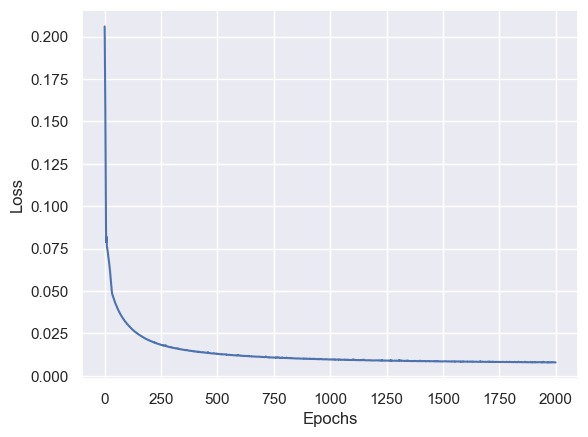

In [51]:
# Verify if is training correctly
plt.plot(historyTEFF.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

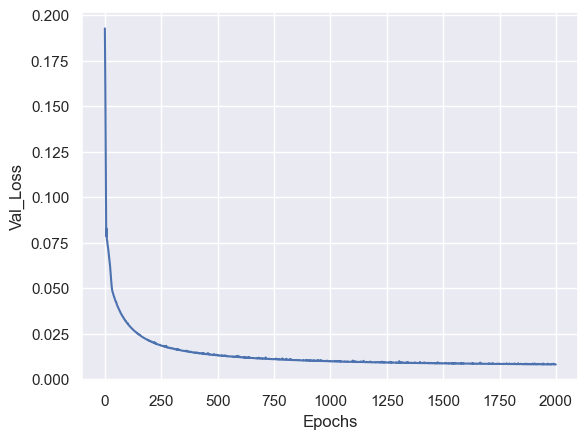

In [52]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyTEFF.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [79]:
#modelTEFF.save('modelosPosRio\\Lamost-LR\\model_TEFF.h5')

In [53]:
predTeff = modelTEFF.predict(X_test)

107/107 [==============================] - 0s 1ms/step


In [54]:
predaux = encoder.decode_DataFrame(predTeff, 'teffLow')
Y_test['TEFF_PredictDecoded'] = predaux

In [55]:
Y_test

,teff,logg,feh,alpha_m,teffEncoded,TEFF_PredictDecoded
#ID,,,,,,
iDR4_3_STRIPE82-0070_0009849,5717.06,4.212,-1.038,0.256545,0.340027,5881.082520
iDR4_3_SPLUS-n03s20_0044501,5872.05,4.468,-0.463,-9999.000000,0.471137,5721.764160
iDR4_3_SPLUS-n06s41_0014324,6113.78,4.234,-0.179,0.098691,0.675622,6130.913086
iDR4_3_SPLUS-n03n01_0004887,5333.87,4.476,0.011,0.181952,0.015878,5417.048828
iDR4_3_STRIPE82-0073_0017015,6075.81,4.347,-0.357,-0.037054,0.643502,5910.806641
...,...,...,...,...,...,...
iDR4_3_STRIPE82-0154_0037496,5868.33,4.316,-0.139,0.075521,0.467990,5810.848633
iDR4_3_STRIPE82-0054_0007045,5738.34,4.259,-0.541,0.204570,0.358029,5820.756836
iDR4_3_SPLUS-n02s44_0024435,6054.53,4.253,0.094,0.023754,0.625501,6044.159180


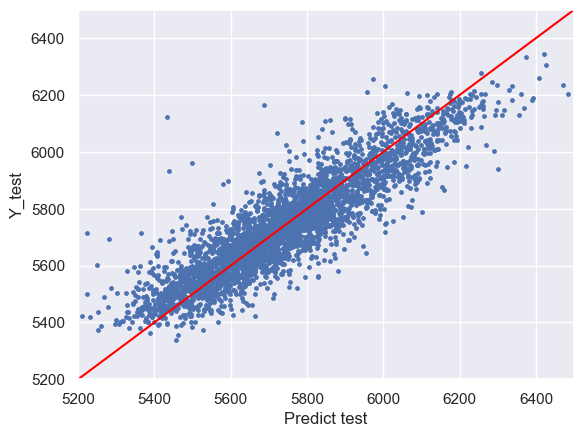

In [56]:
plt.scatter(Y_test['teff'], Y_test['TEFF_PredictDecoded'], s=6)
plt.xlim(5200, 6500)
plt.ylim(5200, 6500)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([5000, 7000], [5000, 7000], c='red')

In [57]:
score = r2_score(Y_test['teff'], Y_test['TEFF_PredictDecoded'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 79.0%


In [58]:
Y_test

,teff,logg,feh,alpha_m,teffEncoded,TEFF_PredictDecoded
#ID,,,,,,
iDR4_3_STRIPE82-0070_0009849,5717.06,4.212,-1.038,0.256545,0.340027,5881.082520
iDR4_3_SPLUS-n03s20_0044501,5872.05,4.468,-0.463,-9999.000000,0.471137,5721.764160
iDR4_3_SPLUS-n06s41_0014324,6113.78,4.234,-0.179,0.098691,0.675622,6130.913086
iDR4_3_SPLUS-n03n01_0004887,5333.87,4.476,0.011,0.181952,0.015878,5417.048828
iDR4_3_STRIPE82-0073_0017015,6075.81,4.347,-0.357,-0.037054,0.643502,5910.806641
...,...,...,...,...,...,...
iDR4_3_STRIPE82-0154_0037496,5868.33,4.316,-0.139,0.075521,0.467990,5810.848633
iDR4_3_STRIPE82-0054_0007045,5738.34,4.259,-0.541,0.204570,0.358029,5820.756836
iDR4_3_SPLUS-n02s44_0024435,6054.53,4.253,0.094,0.023754,0.625501,6044.159180


In [60]:
Y_test.to_csv("E:\\IC\\PredictsTreinos\\LamostLow\\Dwarfs-TeffPredict.csv")

### Logg

In [122]:
modelLOGG = baseline_model_teste()

In [123]:
columnTrain = 'logg'

In [124]:
# Treinando e guardando o modelo
historyLOGG = modelLOGG.fit(X_train, Y_train[[columnTrain]], epochs = 5000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/5000
5/5 - 1s - loss: 18.4142 - val_loss: 18.3157 - 706ms/epoch - 141ms/step
Epoch 2/5000
5/5 - 0s - loss: 18.3337 - val_loss: 18.2694 - 64ms/epoch - 13ms/step
Epoch 3/5000
5/5 - 0s - loss: 18.2831 - val_loss: 18.1966 - 67ms/epoch - 13ms/step
Epoch 4/5000
5/5 - 0s - loss: 18.2017 - val_loss: 18.0957 - 62ms/epoch - 12ms/step
Epoch 5/5000
5/5 - 0s - loss: 18.0885 - val_loss: 17.9546 - 62ms/epoch - 12ms/step
Epoch 6/5000
5/5 - 0s - loss: 17.9335 - val_loss: 17.7591 - 61ms/epoch - 12ms/step
Epoch 7/5000
5/5 - 0s - loss: 17.7094 - val_loss: 17.4622 - 64ms/epoch - 13ms/step
Epoch 8/5000
5/5 - 0s - loss: 17.3706 - val_loss: 17.0132 - 62ms/epoch - 12ms/step
Epoch 9/5000
5/5 - 0s - loss: 16.8556 - val_loss: 16.3280 - 62ms/epoch - 12ms/step
Epoch 10/5000
5/5 - 0s - loss: 16.0714 - val_loss: 15.2857 - 66ms/epoch - 13ms/step
Epoch 11/5000
5/5 - 0s - loss: 14.8787 - val_loss: 13.7149 - 65ms/epoch - 13ms/step
Epoch 12/5000
5/5 - 0s - loss: 13.1023 - val_loss: 11.4430 - 64ms/epoch - 13ms/step

Epoch 101/5000
5/5 - 0s - loss: 0.0634 - val_loss: 0.0611 - 66ms/epoch - 13ms/step
Epoch 102/5000
5/5 - 0s - loss: 0.0633 - val_loss: 0.0610 - 68ms/epoch - 14ms/step
Epoch 103/5000
5/5 - 0s - loss: 0.0632 - val_loss: 0.0609 - 76ms/epoch - 15ms/step
Epoch 104/5000
5/5 - 0s - loss: 0.0631 - val_loss: 0.0608 - 66ms/epoch - 13ms/step
Epoch 105/5000
5/5 - 0s - loss: 0.0630 - val_loss: 0.0607 - 69ms/epoch - 14ms/step
Epoch 106/5000
5/5 - 0s - loss: 0.0629 - val_loss: 0.0606 - 65ms/epoch - 13ms/step
Epoch 107/5000
5/5 - 0s - loss: 0.0628 - val_loss: 0.0605 - 68ms/epoch - 14ms/step
Epoch 108/5000
5/5 - 0s - loss: 0.0627 - val_loss: 0.0605 - 70ms/epoch - 14ms/step
Epoch 109/5000
5/5 - 0s - loss: 0.0627 - val_loss: 0.0604 - 70ms/epoch - 14ms/step
Epoch 110/5000
5/5 - 0s - loss: 0.0625 - val_loss: 0.0602 - 68ms/epoch - 14ms/step
Epoch 111/5000
5/5 - 0s - loss: 0.0625 - val_loss: 0.0601 - 69ms/epoch - 14ms/step
Epoch 112/5000
5/5 - 0s - loss: 0.0624 - val_loss: 0.0601 - 66ms/epoch - 13ms/step
Epoc

Epoch 200/5000
5/5 - 0s - loss: 0.0552 - val_loss: 0.0536 - 64ms/epoch - 13ms/step
Epoch 201/5000
5/5 - 0s - loss: 0.0552 - val_loss: 0.0535 - 68ms/epoch - 14ms/step
Epoch 202/5000
5/5 - 0s - loss: 0.0551 - val_loss: 0.0535 - 65ms/epoch - 13ms/step
Epoch 203/5000
5/5 - 0s - loss: 0.0550 - val_loss: 0.0535 - 62ms/epoch - 12ms/step
Epoch 204/5000
5/5 - 0s - loss: 0.0550 - val_loss: 0.0534 - 63ms/epoch - 13ms/step
Epoch 205/5000
5/5 - 0s - loss: 0.0549 - val_loss: 0.0533 - 57ms/epoch - 11ms/step
Epoch 206/5000
5/5 - 0s - loss: 0.0548 - val_loss: 0.0532 - 58ms/epoch - 12ms/step
Epoch 207/5000
5/5 - 0s - loss: 0.0548 - val_loss: 0.0531 - 56ms/epoch - 11ms/step
Epoch 208/5000
5/5 - 0s - loss: 0.0547 - val_loss: 0.0531 - 59ms/epoch - 12ms/step
Epoch 209/5000
5/5 - 0s - loss: 0.0546 - val_loss: 0.0531 - 59ms/epoch - 12ms/step
Epoch 210/5000
5/5 - 0s - loss: 0.0546 - val_loss: 0.0529 - 58ms/epoch - 12ms/step
Epoch 211/5000
5/5 - 0s - loss: 0.0545 - val_loss: 0.0529 - 56ms/epoch - 11ms/step
Epoc

Epoch 299/5000
5/5 - 0s - loss: 0.0493 - val_loss: 0.0487 - 65ms/epoch - 13ms/step
Epoch 300/5000
5/5 - 0s - loss: 0.0492 - val_loss: 0.0487 - 64ms/epoch - 13ms/step
Epoch 301/5000
5/5 - 0s - loss: 0.0492 - val_loss: 0.0486 - 68ms/epoch - 14ms/step
Epoch 302/5000
5/5 - 0s - loss: 0.0491 - val_loss: 0.0486 - 74ms/epoch - 15ms/step
Epoch 303/5000
5/5 - 0s - loss: 0.0491 - val_loss: 0.0486 - 75ms/epoch - 15ms/step
Epoch 304/5000
5/5 - 0s - loss: 0.0491 - val_loss: 0.0485 - 71ms/epoch - 14ms/step
Epoch 305/5000
5/5 - 0s - loss: 0.0490 - val_loss: 0.0484 - 64ms/epoch - 13ms/step
Epoch 306/5000
5/5 - 0s - loss: 0.0490 - val_loss: 0.0484 - 65ms/epoch - 13ms/step
Epoch 307/5000
5/5 - 0s - loss: 0.0490 - val_loss: 0.0483 - 74ms/epoch - 15ms/step
Epoch 308/5000
5/5 - 0s - loss: 0.0489 - val_loss: 0.0483 - 74ms/epoch - 15ms/step
Epoch 309/5000
5/5 - 0s - loss: 0.0489 - val_loss: 0.0482 - 73ms/epoch - 15ms/step
Epoch 310/5000
5/5 - 0s - loss: 0.0488 - val_loss: 0.0484 - 67ms/epoch - 13ms/step
Epoc

Epoch 398/5000
5/5 - 0s - loss: 0.0456 - val_loss: 0.0451 - 69ms/epoch - 14ms/step
Epoch 399/5000
5/5 - 0s - loss: 0.0456 - val_loss: 0.0451 - 69ms/epoch - 14ms/step
Epoch 400/5000
5/5 - 0s - loss: 0.0456 - val_loss: 0.0450 - 69ms/epoch - 14ms/step
Epoch 401/5000
5/5 - 0s - loss: 0.0455 - val_loss: 0.0451 - 68ms/epoch - 14ms/step
Epoch 402/5000
5/5 - 0s - loss: 0.0455 - val_loss: 0.0450 - 70ms/epoch - 14ms/step
Epoch 403/5000
5/5 - 0s - loss: 0.0454 - val_loss: 0.0449 - 67ms/epoch - 13ms/step
Epoch 404/5000
5/5 - 0s - loss: 0.0454 - val_loss: 0.0449 - 70ms/epoch - 14ms/step
Epoch 405/5000
5/5 - 0s - loss: 0.0454 - val_loss: 0.0449 - 70ms/epoch - 14ms/step
Epoch 406/5000
5/5 - 0s - loss: 0.0453 - val_loss: 0.0448 - 67ms/epoch - 13ms/step
Epoch 407/5000
5/5 - 0s - loss: 0.0453 - val_loss: 0.0448 - 68ms/epoch - 14ms/step
Epoch 408/5000
5/5 - 0s - loss: 0.0453 - val_loss: 0.0448 - 69ms/epoch - 14ms/step
Epoch 409/5000
5/5 - 0s - loss: 0.0453 - val_loss: 0.0447 - 68ms/epoch - 14ms/step
Epoc

Epoch 497/5000
5/5 - 0s - loss: 0.0428 - val_loss: 0.0423 - 69ms/epoch - 14ms/step
Epoch 498/5000
5/5 - 0s - loss: 0.0429 - val_loss: 0.0424 - 69ms/epoch - 14ms/step
Epoch 499/5000
5/5 - 0s - loss: 0.0428 - val_loss: 0.0423 - 70ms/epoch - 14ms/step
Epoch 500/5000
5/5 - 0s - loss: 0.0428 - val_loss: 0.0424 - 68ms/epoch - 14ms/step
Epoch 501/5000
5/5 - 0s - loss: 0.0428 - val_loss: 0.0422 - 71ms/epoch - 14ms/step
Epoch 502/5000
5/5 - 0s - loss: 0.0428 - val_loss: 0.0424 - 70ms/epoch - 14ms/step
Epoch 503/5000
5/5 - 0s - loss: 0.0427 - val_loss: 0.0422 - 68ms/epoch - 14ms/step
Epoch 504/5000
5/5 - 0s - loss: 0.0428 - val_loss: 0.0423 - 69ms/epoch - 14ms/step
Epoch 505/5000
5/5 - 0s - loss: 0.0427 - val_loss: 0.0421 - 70ms/epoch - 14ms/step
Epoch 506/5000
5/5 - 0s - loss: 0.0428 - val_loss: 0.0425 - 70ms/epoch - 14ms/step
Epoch 507/5000
5/5 - 0s - loss: 0.0428 - val_loss: 0.0421 - 71ms/epoch - 14ms/step
Epoch 508/5000
5/5 - 0s - loss: 0.0428 - val_loss: 0.0423 - 69ms/epoch - 14ms/step
Epoc

Epoch 596/5000
5/5 - 0s - loss: 0.0409 - val_loss: 0.0405 - 80ms/epoch - 16ms/step
Epoch 597/5000
5/5 - 0s - loss: 0.0408 - val_loss: 0.0402 - 71ms/epoch - 14ms/step
Epoch 598/5000
5/5 - 0s - loss: 0.0407 - val_loss: 0.0404 - 68ms/epoch - 14ms/step
Epoch 599/5000
5/5 - 0s - loss: 0.0407 - val_loss: 0.0402 - 68ms/epoch - 14ms/step
Epoch 600/5000
5/5 - 0s - loss: 0.0407 - val_loss: 0.0404 - 65ms/epoch - 13ms/step
Epoch 601/5000
5/5 - 0s - loss: 0.0407 - val_loss: 0.0402 - 68ms/epoch - 14ms/step
Epoch 602/5000
5/5 - 0s - loss: 0.0406 - val_loss: 0.0403 - 66ms/epoch - 13ms/step
Epoch 603/5000
5/5 - 0s - loss: 0.0406 - val_loss: 0.0401 - 70ms/epoch - 14ms/step
Epoch 604/5000
5/5 - 0s - loss: 0.0406 - val_loss: 0.0405 - 72ms/epoch - 14ms/step
Epoch 605/5000
5/5 - 0s - loss: 0.0407 - val_loss: 0.0402 - 71ms/epoch - 14ms/step
Epoch 606/5000
5/5 - 0s - loss: 0.0407 - val_loss: 0.0407 - 74ms/epoch - 15ms/step
Epoch 607/5000
5/5 - 0s - loss: 0.0407 - val_loss: 0.0401 - 80ms/epoch - 16ms/step
Epoc

Epoch 695/5000
5/5 - 0s - loss: 0.0391 - val_loss: 0.0388 - 65ms/epoch - 13ms/step
Epoch 696/5000
5/5 - 0s - loss: 0.0391 - val_loss: 0.0386 - 66ms/epoch - 13ms/step
Epoch 697/5000
5/5 - 0s - loss: 0.0390 - val_loss: 0.0388 - 65ms/epoch - 13ms/step
Epoch 698/5000
5/5 - 0s - loss: 0.0390 - val_loss: 0.0387 - 66ms/epoch - 13ms/step
Epoch 699/5000
5/5 - 0s - loss: 0.0391 - val_loss: 0.0386 - 65ms/epoch - 13ms/step
Epoch 700/5000
5/5 - 0s - loss: 0.0390 - val_loss: 0.0386 - 66ms/epoch - 13ms/step
Epoch 701/5000
5/5 - 0s - loss: 0.0390 - val_loss: 0.0387 - 68ms/epoch - 14ms/step
Epoch 702/5000
5/5 - 0s - loss: 0.0390 - val_loss: 0.0385 - 69ms/epoch - 14ms/step
Epoch 703/5000
5/5 - 0s - loss: 0.0389 - val_loss: 0.0386 - 67ms/epoch - 13ms/step
Epoch 704/5000
5/5 - 0s - loss: 0.0389 - val_loss: 0.0387 - 68ms/epoch - 14ms/step
Epoch 705/5000
5/5 - 0s - loss: 0.0390 - val_loss: 0.0385 - 68ms/epoch - 14ms/step
Epoch 706/5000
5/5 - 0s - loss: 0.0389 - val_loss: 0.0388 - 70ms/epoch - 14ms/step
Epoc

Epoch 794/5000
5/5 - 0s - loss: 0.0377 - val_loss: 0.0380 - 60ms/epoch - 12ms/step
Epoch 795/5000
5/5 - 0s - loss: 0.0379 - val_loss: 0.0372 - 61ms/epoch - 12ms/step
Epoch 796/5000
5/5 - 0s - loss: 0.0377 - val_loss: 0.0372 - 60ms/epoch - 12ms/step
Epoch 797/5000
5/5 - 0s - loss: 0.0377 - val_loss: 0.0375 - 70ms/epoch - 14ms/step
Epoch 798/5000
5/5 - 0s - loss: 0.0377 - val_loss: 0.0374 - 60ms/epoch - 12ms/step
Epoch 799/5000
5/5 - 0s - loss: 0.0377 - val_loss: 0.0372 - 61ms/epoch - 12ms/step
Epoch 800/5000
5/5 - 0s - loss: 0.0376 - val_loss: 0.0376 - 61ms/epoch - 12ms/step
Epoch 801/5000
5/5 - 0s - loss: 0.0377 - val_loss: 0.0375 - 59ms/epoch - 12ms/step
Epoch 802/5000
5/5 - 0s - loss: 0.0378 - val_loss: 0.0373 - 58ms/epoch - 12ms/step
Epoch 803/5000
5/5 - 0s - loss: 0.0377 - val_loss: 0.0371 - 60ms/epoch - 12ms/step
Epoch 804/5000
5/5 - 0s - loss: 0.0377 - val_loss: 0.0376 - 60ms/epoch - 12ms/step
Epoch 805/5000
5/5 - 0s - loss: 0.0376 - val_loss: 0.0372 - 56ms/epoch - 11ms/step
Epoc

Epoch 893/5000
5/5 - 0s - loss: 0.0366 - val_loss: 0.0361 - 69ms/epoch - 14ms/step
Epoch 894/5000
5/5 - 0s - loss: 0.0366 - val_loss: 0.0361 - 71ms/epoch - 14ms/step
Epoch 895/5000
5/5 - 0s - loss: 0.0366 - val_loss: 0.0366 - 63ms/epoch - 13ms/step
Epoch 896/5000
5/5 - 0s - loss: 0.0367 - val_loss: 0.0364 - 65ms/epoch - 13ms/step
Epoch 897/5000
5/5 - 0s - loss: 0.0366 - val_loss: 0.0361 - 65ms/epoch - 13ms/step
Epoch 898/5000
5/5 - 0s - loss: 0.0365 - val_loss: 0.0361 - 62ms/epoch - 12ms/step
Epoch 899/5000
5/5 - 0s - loss: 0.0366 - val_loss: 0.0364 - 67ms/epoch - 13ms/step
Epoch 900/5000
5/5 - 0s - loss: 0.0365 - val_loss: 0.0361 - 64ms/epoch - 13ms/step
Epoch 901/5000
5/5 - 0s - loss: 0.0364 - val_loss: 0.0362 - 63ms/epoch - 13ms/step
Epoch 902/5000
5/5 - 0s - loss: 0.0365 - val_loss: 0.0362 - 64ms/epoch - 13ms/step
Epoch 903/5000
5/5 - 0s - loss: 0.0364 - val_loss: 0.0361 - 63ms/epoch - 13ms/step
Epoch 904/5000
5/5 - 0s - loss: 0.0366 - val_loss: 0.0360 - 63ms/epoch - 13ms/step
Epoc

Epoch 992/5000
5/5 - 0s - loss: 0.0357 - val_loss: 0.0353 - 62ms/epoch - 12ms/step
Epoch 993/5000
5/5 - 0s - loss: 0.0356 - val_loss: 0.0356 - 61ms/epoch - 12ms/step
Epoch 994/5000
5/5 - 0s - loss: 0.0356 - val_loss: 0.0355 - 60ms/epoch - 12ms/step
Epoch 995/5000
5/5 - 0s - loss: 0.0357 - val_loss: 0.0351 - 60ms/epoch - 12ms/step
Epoch 996/5000
5/5 - 0s - loss: 0.0356 - val_loss: 0.0353 - 59ms/epoch - 12ms/step
Epoch 997/5000
5/5 - 0s - loss: 0.0356 - val_loss: 0.0351 - 61ms/epoch - 12ms/step
Epoch 998/5000
5/5 - 0s - loss: 0.0355 - val_loss: 0.0351 - 61ms/epoch - 12ms/step
Epoch 999/5000
5/5 - 0s - loss: 0.0355 - val_loss: 0.0351 - 60ms/epoch - 12ms/step
Epoch 1000/5000
5/5 - 0s - loss: 0.0355 - val_loss: 0.0350 - 58ms/epoch - 12ms/step
Epoch 1001/5000
5/5 - 0s - loss: 0.0355 - val_loss: 0.0351 - 60ms/epoch - 12ms/step
Epoch 1002/5000
5/5 - 0s - loss: 0.0356 - val_loss: 0.0350 - 62ms/epoch - 12ms/step
Epoch 1003/5000
5/5 - 0s - loss: 0.0355 - val_loss: 0.0355 - 62ms/epoch - 12ms/step


Epoch 1090/5000
5/5 - 0s - loss: 0.0349 - val_loss: 0.0342 - 64ms/epoch - 13ms/step
Epoch 1091/5000
5/5 - 0s - loss: 0.0347 - val_loss: 0.0346 - 64ms/epoch - 13ms/step
Epoch 1092/5000
5/5 - 0s - loss: 0.0347 - val_loss: 0.0346 - 64ms/epoch - 13ms/step
Epoch 1093/5000
5/5 - 0s - loss: 0.0347 - val_loss: 0.0343 - 64ms/epoch - 13ms/step
Epoch 1094/5000
5/5 - 0s - loss: 0.0346 - val_loss: 0.0342 - 65ms/epoch - 13ms/step
Epoch 1095/5000
5/5 - 0s - loss: 0.0346 - val_loss: 0.0342 - 63ms/epoch - 13ms/step
Epoch 1096/5000
5/5 - 0s - loss: 0.0346 - val_loss: 0.0342 - 63ms/epoch - 13ms/step
Epoch 1097/5000
5/5 - 0s - loss: 0.0346 - val_loss: 0.0342 - 64ms/epoch - 13ms/step
Epoch 1098/5000
5/5 - 0s - loss: 0.0346 - val_loss: 0.0343 - 61ms/epoch - 12ms/step
Epoch 1099/5000
5/5 - 0s - loss: 0.0346 - val_loss: 0.0343 - 64ms/epoch - 13ms/step
Epoch 1100/5000
5/5 - 0s - loss: 0.0346 - val_loss: 0.0345 - 64ms/epoch - 13ms/step
Epoch 1101/5000
5/5 - 0s - loss: 0.0346 - val_loss: 0.0342 - 63ms/epoch - 13

Epoch 1188/5000
5/5 - 0s - loss: 0.0339 - val_loss: 0.0339 - 70ms/epoch - 14ms/step
Epoch 1189/5000
5/5 - 0s - loss: 0.0340 - val_loss: 0.0345 - 66ms/epoch - 13ms/step
Epoch 1190/5000
5/5 - 0s - loss: 0.0343 - val_loss: 0.0341 - 68ms/epoch - 14ms/step
Epoch 1191/5000
5/5 - 0s - loss: 0.0343 - val_loss: 0.0335 - 67ms/epoch - 13ms/step
Epoch 1192/5000
5/5 - 0s - loss: 0.0339 - val_loss: 0.0337 - 69ms/epoch - 14ms/step
Epoch 1193/5000
5/5 - 0s - loss: 0.0341 - val_loss: 0.0335 - 66ms/epoch - 13ms/step
Epoch 1194/5000
5/5 - 0s - loss: 0.0339 - val_loss: 0.0336 - 67ms/epoch - 13ms/step
Epoch 1195/5000
5/5 - 0s - loss: 0.0339 - val_loss: 0.0334 - 66ms/epoch - 13ms/step
Epoch 1196/5000
5/5 - 0s - loss: 0.0338 - val_loss: 0.0335 - 65ms/epoch - 13ms/step
Epoch 1197/5000
5/5 - 0s - loss: 0.0339 - val_loss: 0.0353 - 67ms/epoch - 13ms/step
Epoch 1198/5000
5/5 - 0s - loss: 0.0346 - val_loss: 0.0356 - 67ms/epoch - 13ms/step
Epoch 1199/5000
5/5 - 0s - loss: 0.0345 - val_loss: 0.0334 - 66ms/epoch - 13

Epoch 1286/5000
5/5 - 0s - loss: 0.0332 - val_loss: 0.0328 - 69ms/epoch - 14ms/step
Epoch 1287/5000
5/5 - 0s - loss: 0.0333 - val_loss: 0.0329 - 74ms/epoch - 15ms/step
Epoch 1288/5000
5/5 - 0s - loss: 0.0334 - val_loss: 0.0328 - 71ms/epoch - 14ms/step
Epoch 1289/5000
5/5 - 0s - loss: 0.0333 - val_loss: 0.0327 - 68ms/epoch - 14ms/step
Epoch 1290/5000
5/5 - 0s - loss: 0.0332 - val_loss: 0.0328 - 68ms/epoch - 14ms/step
Epoch 1291/5000
5/5 - 0s - loss: 0.0332 - val_loss: 0.0327 - 68ms/epoch - 14ms/step
Epoch 1292/5000
5/5 - 0s - loss: 0.0332 - val_loss: 0.0328 - 70ms/epoch - 14ms/step
Epoch 1293/5000
5/5 - 0s - loss: 0.0335 - val_loss: 0.0327 - 68ms/epoch - 14ms/step
Epoch 1294/5000
5/5 - 0s - loss: 0.0334 - val_loss: 0.0328 - 66ms/epoch - 13ms/step
Epoch 1295/5000
5/5 - 0s - loss: 0.0334 - val_loss: 0.0330 - 66ms/epoch - 13ms/step
Epoch 1296/5000
5/5 - 0s - loss: 0.0336 - val_loss: 0.0327 - 69ms/epoch - 14ms/step
Epoch 1297/5000
5/5 - 0s - loss: 0.0333 - val_loss: 0.0328 - 73ms/epoch - 15

Epoch 1384/5000
5/5 - 0s - loss: 0.0326 - val_loss: 0.0323 - 68ms/epoch - 14ms/step
Epoch 1385/5000
5/5 - 0s - loss: 0.0327 - val_loss: 0.0322 - 67ms/epoch - 13ms/step
Epoch 1386/5000
5/5 - 0s - loss: 0.0327 - val_loss: 0.0322 - 63ms/epoch - 13ms/step
Epoch 1387/5000
5/5 - 0s - loss: 0.0328 - val_loss: 0.0324 - 67ms/epoch - 13ms/step
Epoch 1388/5000
5/5 - 0s - loss: 0.0328 - val_loss: 0.0322 - 65ms/epoch - 13ms/step
Epoch 1389/5000
5/5 - 0s - loss: 0.0327 - val_loss: 0.0327 - 67ms/epoch - 13ms/step
Epoch 1390/5000
5/5 - 0s - loss: 0.0333 - val_loss: 0.0321 - 66ms/epoch - 13ms/step
Epoch 1391/5000
5/5 - 0s - loss: 0.0327 - val_loss: 0.0321 - 65ms/epoch - 13ms/step
Epoch 1392/5000
5/5 - 0s - loss: 0.0325 - val_loss: 0.0321 - 72ms/epoch - 14ms/step
Epoch 1393/5000
5/5 - 0s - loss: 0.0326 - val_loss: 0.0322 - 85ms/epoch - 17ms/step
Epoch 1394/5000
5/5 - 0s - loss: 0.0325 - val_loss: 0.0321 - 78ms/epoch - 16ms/step
Epoch 1395/5000
5/5 - 0s - loss: 0.0325 - val_loss: 0.0321 - 67ms/epoch - 13

Epoch 1482/5000
5/5 - 0s - loss: 0.0320 - val_loss: 0.0318 - 67ms/epoch - 13ms/step
Epoch 1483/5000
5/5 - 0s - loss: 0.0320 - val_loss: 0.0317 - 64ms/epoch - 13ms/step
Epoch 1484/5000
5/5 - 0s - loss: 0.0320 - val_loss: 0.0317 - 62ms/epoch - 12ms/step
Epoch 1485/5000
5/5 - 0s - loss: 0.0322 - val_loss: 0.0316 - 71ms/epoch - 14ms/step
Epoch 1486/5000
5/5 - 0s - loss: 0.0321 - val_loss: 0.0317 - 69ms/epoch - 14ms/step
Epoch 1487/5000
5/5 - 0s - loss: 0.0320 - val_loss: 0.0320 - 72ms/epoch - 14ms/step
Epoch 1488/5000
5/5 - 0s - loss: 0.0321 - val_loss: 0.0322 - 64ms/epoch - 13ms/step
Epoch 1489/5000
5/5 - 0s - loss: 0.0321 - val_loss: 0.0320 - 61ms/epoch - 12ms/step
Epoch 1490/5000
5/5 - 0s - loss: 0.0321 - val_loss: 0.0320 - 62ms/epoch - 12ms/step
Epoch 1491/5000
5/5 - 0s - loss: 0.0322 - val_loss: 0.0325 - 59ms/epoch - 12ms/step
Epoch 1492/5000
5/5 - 0s - loss: 0.0323 - val_loss: 0.0327 - 60ms/epoch - 12ms/step
Epoch 1493/5000
5/5 - 0s - loss: 0.0324 - val_loss: 0.0326 - 61ms/epoch - 12

Epoch 1580/5000
5/5 - 0s - loss: 0.0317 - val_loss: 0.0312 - 84ms/epoch - 17ms/step
Epoch 1581/5000
5/5 - 0s - loss: 0.0316 - val_loss: 0.0312 - 76ms/epoch - 15ms/step
Epoch 1582/5000
5/5 - 0s - loss: 0.0317 - val_loss: 0.0315 - 67ms/epoch - 13ms/step
Epoch 1583/5000
5/5 - 0s - loss: 0.0319 - val_loss: 0.0311 - 70ms/epoch - 14ms/step
Epoch 1584/5000
5/5 - 0s - loss: 0.0316 - val_loss: 0.0313 - 68ms/epoch - 14ms/step
Epoch 1585/5000
5/5 - 0s - loss: 0.0315 - val_loss: 0.0315 - 65ms/epoch - 13ms/step
Epoch 1586/5000
5/5 - 0s - loss: 0.0316 - val_loss: 0.0314 - 65ms/epoch - 13ms/step
Epoch 1587/5000
5/5 - 0s - loss: 0.0316 - val_loss: 0.0312 - 68ms/epoch - 14ms/step
Epoch 1588/5000
5/5 - 0s - loss: 0.0316 - val_loss: 0.0311 - 67ms/epoch - 13ms/step
Epoch 1589/5000
5/5 - 0s - loss: 0.0316 - val_loss: 0.0311 - 64ms/epoch - 13ms/step
Epoch 1590/5000
5/5 - 0s - loss: 0.0315 - val_loss: 0.0321 - 66ms/epoch - 13ms/step
Epoch 1591/5000
5/5 - 0s - loss: 0.0319 - val_loss: 0.0323 - 73ms/epoch - 15

Epoch 1678/5000
5/5 - 0s - loss: 0.0312 - val_loss: 0.0313 - 94ms/epoch - 19ms/step
Epoch 1679/5000
5/5 - 0s - loss: 0.0313 - val_loss: 0.0307 - 75ms/epoch - 15ms/step
Epoch 1680/5000
5/5 - 0s - loss: 0.0311 - val_loss: 0.0311 - 70ms/epoch - 14ms/step
Epoch 1681/5000
5/5 - 0s - loss: 0.0313 - val_loss: 0.0315 - 71ms/epoch - 14ms/step
Epoch 1682/5000
5/5 - 0s - loss: 0.0314 - val_loss: 0.0307 - 72ms/epoch - 14ms/step
Epoch 1683/5000
5/5 - 0s - loss: 0.0311 - val_loss: 0.0313 - 70ms/epoch - 14ms/step
Epoch 1684/5000
5/5 - 0s - loss: 0.0312 - val_loss: 0.0307 - 69ms/epoch - 14ms/step
Epoch 1685/5000
5/5 - 0s - loss: 0.0312 - val_loss: 0.0309 - 67ms/epoch - 13ms/step
Epoch 1686/5000
5/5 - 0s - loss: 0.0313 - val_loss: 0.0308 - 69ms/epoch - 14ms/step
Epoch 1687/5000
5/5 - 0s - loss: 0.0311 - val_loss: 0.0307 - 69ms/epoch - 14ms/step
Epoch 1688/5000
5/5 - 0s - loss: 0.0311 - val_loss: 0.0307 - 69ms/epoch - 14ms/step
Epoch 1689/5000
5/5 - 0s - loss: 0.0312 - val_loss: 0.0307 - 68ms/epoch - 14

Epoch 1776/5000
5/5 - 0s - loss: 0.0307 - val_loss: 0.0304 - 71ms/epoch - 14ms/step
Epoch 1777/5000
5/5 - 0s - loss: 0.0308 - val_loss: 0.0305 - 67ms/epoch - 13ms/step
Epoch 1778/5000
5/5 - 0s - loss: 0.0310 - val_loss: 0.0305 - 68ms/epoch - 14ms/step
Epoch 1779/5000
5/5 - 0s - loss: 0.0309 - val_loss: 0.0305 - 67ms/epoch - 13ms/step
Epoch 1780/5000
5/5 - 0s - loss: 0.0312 - val_loss: 0.0304 - 71ms/epoch - 14ms/step
Epoch 1781/5000
5/5 - 0s - loss: 0.0309 - val_loss: 0.0309 - 68ms/epoch - 14ms/step
Epoch 1782/5000
5/5 - 0s - loss: 0.0309 - val_loss: 0.0303 - 69ms/epoch - 14ms/step
Epoch 1783/5000
5/5 - 0s - loss: 0.0308 - val_loss: 0.0303 - 65ms/epoch - 13ms/step
Epoch 1784/5000
5/5 - 0s - loss: 0.0307 - val_loss: 0.0304 - 65ms/epoch - 13ms/step
Epoch 1785/5000
5/5 - 0s - loss: 0.0307 - val_loss: 0.0303 - 67ms/epoch - 13ms/step
Epoch 1786/5000
5/5 - 0s - loss: 0.0307 - val_loss: 0.0304 - 70ms/epoch - 14ms/step
Epoch 1787/5000
5/5 - 0s - loss: 0.0308 - val_loss: 0.0303 - 66ms/epoch - 13

Epoch 1874/5000
5/5 - 0s - loss: 0.0306 - val_loss: 0.0302 - 65ms/epoch - 13ms/step
Epoch 1875/5000
5/5 - 0s - loss: 0.0307 - val_loss: 0.0300 - 65ms/epoch - 13ms/step
Epoch 1876/5000
5/5 - 0s - loss: 0.0304 - val_loss: 0.0300 - 66ms/epoch - 13ms/step
Epoch 1877/5000
5/5 - 0s - loss: 0.0305 - val_loss: 0.0301 - 64ms/epoch - 13ms/step
Epoch 1878/5000
5/5 - 0s - loss: 0.0304 - val_loss: 0.0307 - 65ms/epoch - 13ms/step
Epoch 1879/5000
5/5 - 0s - loss: 0.0311 - val_loss: 0.0303 - 65ms/epoch - 13ms/step
Epoch 1880/5000
5/5 - 0s - loss: 0.0311 - val_loss: 0.0300 - 68ms/epoch - 14ms/step
Epoch 1881/5000
5/5 - 0s - loss: 0.0306 - val_loss: 0.0300 - 68ms/epoch - 14ms/step
Epoch 1882/5000
5/5 - 0s - loss: 0.0304 - val_loss: 0.0305 - 66ms/epoch - 13ms/step
Epoch 1883/5000
5/5 - 0s - loss: 0.0305 - val_loss: 0.0303 - 70ms/epoch - 14ms/step
Epoch 1884/5000
5/5 - 0s - loss: 0.0305 - val_loss: 0.0305 - 68ms/epoch - 14ms/step
Epoch 1885/5000
5/5 - 0s - loss: 0.0305 - val_loss: 0.0302 - 69ms/epoch - 14

Epoch 1972/5000
5/5 - 0s - loss: 0.0301 - val_loss: 0.0303 - 66ms/epoch - 13ms/step
Epoch 1973/5000
5/5 - 0s - loss: 0.0302 - val_loss: 0.0305 - 64ms/epoch - 13ms/step
Epoch 1974/5000
5/5 - 0s - loss: 0.0302 - val_loss: 0.0314 - 66ms/epoch - 13ms/step
Epoch 1975/5000
5/5 - 0s - loss: 0.0307 - val_loss: 0.0310 - 66ms/epoch - 13ms/step
Epoch 1976/5000
5/5 - 0s - loss: 0.0305 - val_loss: 0.0307 - 66ms/epoch - 13ms/step
Epoch 1977/5000
5/5 - 0s - loss: 0.0303 - val_loss: 0.0304 - 71ms/epoch - 14ms/step
Epoch 1978/5000
5/5 - 0s - loss: 0.0303 - val_loss: 0.0310 - 75ms/epoch - 15ms/step
Epoch 1979/5000
5/5 - 0s - loss: 0.0304 - val_loss: 0.0311 - 75ms/epoch - 15ms/step
Epoch 1980/5000
5/5 - 0s - loss: 0.0305 - val_loss: 0.0298 - 63ms/epoch - 13ms/step
Epoch 1981/5000
5/5 - 0s - loss: 0.0301 - val_loss: 0.0304 - 59ms/epoch - 12ms/step
Epoch 1982/5000
5/5 - 0s - loss: 0.0303 - val_loss: 0.0300 - 61ms/epoch - 12ms/step
Epoch 1983/5000
5/5 - 0s - loss: 0.0301 - val_loss: 0.0297 - 71ms/epoch - 14

Epoch 2070/5000
5/5 - 0s - loss: 0.0299 - val_loss: 0.0296 - 76ms/epoch - 15ms/step
Epoch 2071/5000
5/5 - 0s - loss: 0.0299 - val_loss: 0.0294 - 75ms/epoch - 15ms/step
Epoch 2072/5000
5/5 - 0s - loss: 0.0298 - val_loss: 0.0294 - 66ms/epoch - 13ms/step
Epoch 2073/5000
5/5 - 0s - loss: 0.0298 - val_loss: 0.0300 - 65ms/epoch - 13ms/step
Epoch 2074/5000
5/5 - 0s - loss: 0.0300 - val_loss: 0.0318 - 73ms/epoch - 15ms/step
Epoch 2075/5000
5/5 - 0s - loss: 0.0307 - val_loss: 0.0328 - 72ms/epoch - 14ms/step
Epoch 2076/5000
5/5 - 0s - loss: 0.0310 - val_loss: 0.0305 - 74ms/epoch - 15ms/step
Epoch 2077/5000
5/5 - 0s - loss: 0.0301 - val_loss: 0.0298 - 65ms/epoch - 13ms/step
Epoch 2078/5000
5/5 - 0s - loss: 0.0304 - val_loss: 0.0299 - 65ms/epoch - 13ms/step
Epoch 2079/5000
5/5 - 0s - loss: 0.0303 - val_loss: 0.0299 - 65ms/epoch - 13ms/step
Epoch 2080/5000
5/5 - 0s - loss: 0.0305 - val_loss: 0.0304 - 64ms/epoch - 13ms/step
Epoch 2081/5000
5/5 - 0s - loss: 0.0309 - val_loss: 0.0302 - 64ms/epoch - 13

Epoch 2168/5000
5/5 - 0s - loss: 0.0295 - val_loss: 0.0293 - 102ms/epoch - 20ms/step
Epoch 2169/5000
5/5 - 0s - loss: 0.0295 - val_loss: 0.0292 - 91ms/epoch - 18ms/step
Epoch 2170/5000
5/5 - 0s - loss: 0.0294 - val_loss: 0.0291 - 81ms/epoch - 16ms/step
Epoch 2171/5000
5/5 - 0s - loss: 0.0295 - val_loss: 0.0291 - 95ms/epoch - 19ms/step
Epoch 2172/5000
5/5 - 0s - loss: 0.0295 - val_loss: 0.0293 - 74ms/epoch - 15ms/step
Epoch 2173/5000
5/5 - 0s - loss: 0.0297 - val_loss: 0.0293 - 72ms/epoch - 14ms/step
Epoch 2174/5000
5/5 - 0s - loss: 0.0297 - val_loss: 0.0291 - 101ms/epoch - 20ms/step
Epoch 2175/5000
5/5 - 0s - loss: 0.0295 - val_loss: 0.0291 - 73ms/epoch - 15ms/step
Epoch 2176/5000
5/5 - 0s - loss: 0.0295 - val_loss: 0.0292 - 79ms/epoch - 16ms/step
Epoch 2177/5000
5/5 - 0s - loss: 0.0295 - val_loss: 0.0292 - 70ms/epoch - 14ms/step
Epoch 2178/5000
5/5 - 0s - loss: 0.0295 - val_loss: 0.0291 - 68ms/epoch - 14ms/step
Epoch 2179/5000
5/5 - 0s - loss: 0.0295 - val_loss: 0.0292 - 66ms/epoch - 

Epoch 2266/5000
5/5 - 0s - loss: 0.0292 - val_loss: 0.0293 - 71ms/epoch - 14ms/step
Epoch 2267/5000
5/5 - 0s - loss: 0.0293 - val_loss: 0.0301 - 69ms/epoch - 14ms/step
Epoch 2268/5000
5/5 - 0s - loss: 0.0297 - val_loss: 0.0305 - 68ms/epoch - 14ms/step
Epoch 2269/5000
5/5 - 0s - loss: 0.0297 - val_loss: 0.0289 - 71ms/epoch - 14ms/step
Epoch 2270/5000
5/5 - 0s - loss: 0.0292 - val_loss: 0.0300 - 74ms/epoch - 15ms/step
Epoch 2271/5000
5/5 - 0s - loss: 0.0298 - val_loss: 0.0310 - 66ms/epoch - 13ms/step
Epoch 2272/5000
5/5 - 0s - loss: 0.0301 - val_loss: 0.0305 - 69ms/epoch - 14ms/step
Epoch 2273/5000
5/5 - 0s - loss: 0.0298 - val_loss: 0.0301 - 72ms/epoch - 14ms/step
Epoch 2274/5000
5/5 - 0s - loss: 0.0298 - val_loss: 0.0303 - 72ms/epoch - 14ms/step
Epoch 2275/5000
5/5 - 0s - loss: 0.0296 - val_loss: 0.0293 - 69ms/epoch - 14ms/step
Epoch 2276/5000
5/5 - 0s - loss: 0.0293 - val_loss: 0.0288 - 68ms/epoch - 14ms/step
Epoch 2277/5000
5/5 - 0s - loss: 0.0292 - val_loss: 0.0288 - 67ms/epoch - 13

Epoch 2364/5000
5/5 - 0s - loss: 0.0290 - val_loss: 0.0293 - 68ms/epoch - 14ms/step
Epoch 2365/5000
5/5 - 0s - loss: 0.0291 - val_loss: 0.0286 - 69ms/epoch - 14ms/step
Epoch 2366/5000
5/5 - 0s - loss: 0.0290 - val_loss: 0.0286 - 70ms/epoch - 14ms/step
Epoch 2367/5000
5/5 - 0s - loss: 0.0289 - val_loss: 0.0287 - 74ms/epoch - 15ms/step
Epoch 2368/5000
5/5 - 0s - loss: 0.0292 - val_loss: 0.0289 - 71ms/epoch - 14ms/step
Epoch 2369/5000
5/5 - 0s - loss: 0.0292 - val_loss: 0.0286 - 70ms/epoch - 14ms/step
Epoch 2370/5000
5/5 - 0s - loss: 0.0290 - val_loss: 0.0295 - 66ms/epoch - 13ms/step
Epoch 2371/5000
5/5 - 0s - loss: 0.0296 - val_loss: 0.0286 - 67ms/epoch - 13ms/step
Epoch 2372/5000
5/5 - 0s - loss: 0.0290 - val_loss: 0.0294 - 66ms/epoch - 13ms/step
Epoch 2373/5000
5/5 - 0s - loss: 0.0297 - val_loss: 0.0302 - 65ms/epoch - 13ms/step
Epoch 2374/5000
5/5 - 0s - loss: 0.0300 - val_loss: 0.0295 - 70ms/epoch - 14ms/step
Epoch 2375/5000
5/5 - 0s - loss: 0.0297 - val_loss: 0.0296 - 69ms/epoch - 14

Epoch 2462/5000
5/5 - 0s - loss: 0.0305 - val_loss: 0.0287 - 73ms/epoch - 15ms/step
Epoch 2463/5000
5/5 - 0s - loss: 0.0297 - val_loss: 0.0284 - 67ms/epoch - 13ms/step
Epoch 2464/5000
5/5 - 0s - loss: 0.0294 - val_loss: 0.0284 - 62ms/epoch - 12ms/step
Epoch 2465/5000
5/5 - 0s - loss: 0.0291 - val_loss: 0.0284 - 56ms/epoch - 11ms/step
Epoch 2466/5000
5/5 - 0s - loss: 0.0289 - val_loss: 0.0291 - 57ms/epoch - 11ms/step
Epoch 2467/5000
5/5 - 0s - loss: 0.0289 - val_loss: 0.0287 - 58ms/epoch - 12ms/step
Epoch 2468/5000
5/5 - 0s - loss: 0.0288 - val_loss: 0.0291 - 59ms/epoch - 12ms/step
Epoch 2469/5000
5/5 - 0s - loss: 0.0289 - val_loss: 0.0284 - 58ms/epoch - 12ms/step
Epoch 2470/5000
5/5 - 0s - loss: 0.0287 - val_loss: 0.0283 - 56ms/epoch - 11ms/step
Epoch 2471/5000
5/5 - 0s - loss: 0.0287 - val_loss: 0.0284 - 58ms/epoch - 12ms/step
Epoch 2472/5000
5/5 - 0s - loss: 0.0287 - val_loss: 0.0284 - 59ms/epoch - 12ms/step
Epoch 2473/5000
5/5 - 0s - loss: 0.0287 - val_loss: 0.0284 - 57ms/epoch - 11

Epoch 2560/5000
5/5 - 0s - loss: 0.0286 - val_loss: 0.0282 - 68ms/epoch - 14ms/step
Epoch 2561/5000
5/5 - 0s - loss: 0.0286 - val_loss: 0.0282 - 68ms/epoch - 14ms/step
Epoch 2562/5000
5/5 - 0s - loss: 0.0285 - val_loss: 0.0283 - 72ms/epoch - 14ms/step
Epoch 2563/5000
5/5 - 0s - loss: 0.0285 - val_loss: 0.0284 - 67ms/epoch - 13ms/step
Epoch 2564/5000
5/5 - 0s - loss: 0.0285 - val_loss: 0.0283 - 68ms/epoch - 14ms/step
Epoch 2565/5000
5/5 - 0s - loss: 0.0285 - val_loss: 0.0285 - 69ms/epoch - 14ms/step
Epoch 2566/5000
5/5 - 0s - loss: 0.0286 - val_loss: 0.0284 - 71ms/epoch - 14ms/step
Epoch 2567/5000
5/5 - 0s - loss: 0.0285 - val_loss: 0.0282 - 68ms/epoch - 14ms/step
Epoch 2568/5000
5/5 - 0s - loss: 0.0285 - val_loss: 0.0286 - 66ms/epoch - 13ms/step
Epoch 2569/5000
5/5 - 0s - loss: 0.0287 - val_loss: 0.0301 - 68ms/epoch - 14ms/step
Epoch 2570/5000
5/5 - 0s - loss: 0.0293 - val_loss: 0.0300 - 65ms/epoch - 13ms/step
Epoch 2571/5000
5/5 - 0s - loss: 0.0294 - val_loss: 0.0287 - 59ms/epoch - 12

Epoch 2658/5000
5/5 - 0s - loss: 0.0288 - val_loss: 0.0280 - 68ms/epoch - 14ms/step
Epoch 2659/5000
5/5 - 0s - loss: 0.0283 - val_loss: 0.0279 - 68ms/epoch - 14ms/step
Epoch 2660/5000
5/5 - 0s - loss: 0.0283 - val_loss: 0.0283 - 68ms/epoch - 14ms/step
Epoch 2661/5000
5/5 - 0s - loss: 0.0287 - val_loss: 0.0286 - 66ms/epoch - 13ms/step
Epoch 2662/5000
5/5 - 0s - loss: 0.0289 - val_loss: 0.0290 - 63ms/epoch - 13ms/step
Epoch 2663/5000
5/5 - 0s - loss: 0.0294 - val_loss: 0.0281 - 66ms/epoch - 13ms/step
Epoch 2664/5000
5/5 - 0s - loss: 0.0288 - val_loss: 0.0287 - 65ms/epoch - 13ms/step
Epoch 2665/5000
5/5 - 0s - loss: 0.0291 - val_loss: 0.0280 - 67ms/epoch - 13ms/step
Epoch 2666/5000
5/5 - 0s - loss: 0.0286 - val_loss: 0.0280 - 66ms/epoch - 13ms/step
Epoch 2667/5000
5/5 - 0s - loss: 0.0285 - val_loss: 0.0287 - 68ms/epoch - 14ms/step
Epoch 2668/5000
5/5 - 0s - loss: 0.0286 - val_loss: 0.0295 - 69ms/epoch - 14ms/step
Epoch 2669/5000
5/5 - 0s - loss: 0.0288 - val_loss: 0.0296 - 66ms/epoch - 13

Epoch 2756/5000
5/5 - 0s - loss: 0.0281 - val_loss: 0.0278 - 64ms/epoch - 13ms/step
Epoch 2757/5000
5/5 - 0s - loss: 0.0282 - val_loss: 0.0278 - 64ms/epoch - 13ms/step
Epoch 2758/5000
5/5 - 0s - loss: 0.0282 - val_loss: 0.0278 - 63ms/epoch - 13ms/step
Epoch 2759/5000
5/5 - 0s - loss: 0.0282 - val_loss: 0.0278 - 68ms/epoch - 14ms/step
Epoch 2760/5000
5/5 - 0s - loss: 0.0283 - val_loss: 0.0283 - 74ms/epoch - 15ms/step
Epoch 2761/5000
5/5 - 0s - loss: 0.0286 - val_loss: 0.0280 - 65ms/epoch - 13ms/step
Epoch 2762/5000
5/5 - 0s - loss: 0.0285 - val_loss: 0.0278 - 65ms/epoch - 13ms/step
Epoch 2763/5000
5/5 - 0s - loss: 0.0282 - val_loss: 0.0277 - 64ms/epoch - 13ms/step
Epoch 2764/5000
5/5 - 0s - loss: 0.0282 - val_loss: 0.0278 - 125ms/epoch - 25ms/step
Epoch 2765/5000
5/5 - 0s - loss: 0.0282 - val_loss: 0.0279 - 74ms/epoch - 15ms/step
Epoch 2766/5000
5/5 - 0s - loss: 0.0281 - val_loss: 0.0283 - 69ms/epoch - 14ms/step
Epoch 2767/5000
5/5 - 0s - loss: 0.0281 - val_loss: 0.0277 - 68ms/epoch - 1

Epoch 2854/5000
5/5 - 0s - loss: 0.0281 - val_loss: 0.0277 - 75ms/epoch - 15ms/step
Epoch 2855/5000
5/5 - 0s - loss: 0.0281 - val_loss: 0.0276 - 67ms/epoch - 13ms/step
Epoch 2856/5000
5/5 - 0s - loss: 0.0280 - val_loss: 0.0285 - 67ms/epoch - 13ms/step
Epoch 2857/5000
5/5 - 0s - loss: 0.0287 - val_loss: 0.0285 - 67ms/epoch - 13ms/step
Epoch 2858/5000
5/5 - 0s - loss: 0.0286 - val_loss: 0.0281 - 66ms/epoch - 13ms/step
Epoch 2859/5000
5/5 - 0s - loss: 0.0284 - val_loss: 0.0293 - 68ms/epoch - 14ms/step
Epoch 2860/5000
5/5 - 0s - loss: 0.0294 - val_loss: 0.0282 - 74ms/epoch - 15ms/step
Epoch 2861/5000
5/5 - 0s - loss: 0.0287 - val_loss: 0.0275 - 71ms/epoch - 14ms/step
Epoch 2862/5000
5/5 - 0s - loss: 0.0282 - val_loss: 0.0278 - 66ms/epoch - 13ms/step
Epoch 2863/5000
5/5 - 0s - loss: 0.0282 - val_loss: 0.0277 - 64ms/epoch - 13ms/step
Epoch 2864/5000
5/5 - 0s - loss: 0.0281 - val_loss: 0.0277 - 63ms/epoch - 13ms/step
Epoch 2865/5000
5/5 - 0s - loss: 0.0279 - val_loss: 0.0277 - 65ms/epoch - 13

Epoch 2952/5000
5/5 - 0s - loss: 0.0279 - val_loss: 0.0274 - 76ms/epoch - 15ms/step
Epoch 2953/5000
5/5 - 0s - loss: 0.0279 - val_loss: 0.0275 - 71ms/epoch - 14ms/step
Epoch 2954/5000
5/5 - 0s - loss: 0.0279 - val_loss: 0.0275 - 70ms/epoch - 14ms/step
Epoch 2955/5000
5/5 - 0s - loss: 0.0279 - val_loss: 0.0277 - 68ms/epoch - 14ms/step
Epoch 2956/5000
5/5 - 0s - loss: 0.0279 - val_loss: 0.0274 - 68ms/epoch - 14ms/step
Epoch 2957/5000
5/5 - 0s - loss: 0.0278 - val_loss: 0.0281 - 64ms/epoch - 13ms/step
Epoch 2958/5000
5/5 - 0s - loss: 0.0279 - val_loss: 0.0289 - 65ms/epoch - 13ms/step
Epoch 2959/5000
5/5 - 0s - loss: 0.0282 - val_loss: 0.0275 - 69ms/epoch - 14ms/step
Epoch 2960/5000
5/5 - 0s - loss: 0.0277 - val_loss: 0.0280 - 65ms/epoch - 13ms/step
Epoch 2961/5000
5/5 - 0s - loss: 0.0278 - val_loss: 0.0280 - 66ms/epoch - 13ms/step
Epoch 2962/5000
5/5 - 0s - loss: 0.0281 - val_loss: 0.0274 - 69ms/epoch - 14ms/step
Epoch 2963/5000
5/5 - 0s - loss: 0.0278 - val_loss: 0.0275 - 66ms/epoch - 13

Epoch 3050/5000
5/5 - 0s - loss: 0.0279 - val_loss: 0.0273 - 64ms/epoch - 13ms/step
Epoch 3051/5000
5/5 - 0s - loss: 0.0276 - val_loss: 0.0279 - 65ms/epoch - 13ms/step
Epoch 3052/5000
5/5 - 0s - loss: 0.0280 - val_loss: 0.0274 - 67ms/epoch - 13ms/step
Epoch 3053/5000
5/5 - 0s - loss: 0.0279 - val_loss: 0.0276 - 84ms/epoch - 17ms/step
Epoch 3054/5000
5/5 - 0s - loss: 0.0278 - val_loss: 0.0273 - 83ms/epoch - 17ms/step
Epoch 3055/5000
5/5 - 0s - loss: 0.0278 - val_loss: 0.0276 - 76ms/epoch - 15ms/step
Epoch 3056/5000
5/5 - 0s - loss: 0.0276 - val_loss: 0.0272 - 67ms/epoch - 13ms/step
Epoch 3057/5000
5/5 - 0s - loss: 0.0277 - val_loss: 0.0273 - 67ms/epoch - 13ms/step
Epoch 3058/5000
5/5 - 0s - loss: 0.0279 - val_loss: 0.0275 - 74ms/epoch - 15ms/step
Epoch 3059/5000
5/5 - 0s - loss: 0.0276 - val_loss: 0.0274 - 72ms/epoch - 14ms/step
Epoch 3060/5000
5/5 - 0s - loss: 0.0276 - val_loss: 0.0275 - 70ms/epoch - 14ms/step
Epoch 3061/5000
5/5 - 0s - loss: 0.0280 - val_loss: 0.0273 - 69ms/epoch - 14

Epoch 3148/5000
5/5 - 0s - loss: 0.0277 - val_loss: 0.0271 - 62ms/epoch - 12ms/step
Epoch 3149/5000
5/5 - 0s - loss: 0.0276 - val_loss: 0.0270 - 60ms/epoch - 12ms/step
Epoch 3150/5000
5/5 - 0s - loss: 0.0274 - val_loss: 0.0270 - 62ms/epoch - 12ms/step
Epoch 3151/5000
5/5 - 0s - loss: 0.0273 - val_loss: 0.0270 - 63ms/epoch - 13ms/step
Epoch 3152/5000
5/5 - 0s - loss: 0.0273 - val_loss: 0.0273 - 65ms/epoch - 13ms/step
Epoch 3153/5000
5/5 - 0s - loss: 0.0274 - val_loss: 0.0270 - 64ms/epoch - 13ms/step
Epoch 3154/5000
5/5 - 0s - loss: 0.0273 - val_loss: 0.0270 - 64ms/epoch - 13ms/step
Epoch 3155/5000
5/5 - 0s - loss: 0.0273 - val_loss: 0.0270 - 65ms/epoch - 13ms/step
Epoch 3156/5000
5/5 - 0s - loss: 0.0273 - val_loss: 0.0271 - 62ms/epoch - 12ms/step
Epoch 3157/5000
5/5 - 0s - loss: 0.0273 - val_loss: 0.0275 - 65ms/epoch - 13ms/step
Epoch 3158/5000
5/5 - 0s - loss: 0.0274 - val_loss: 0.0271 - 65ms/epoch - 13ms/step
Epoch 3159/5000
5/5 - 0s - loss: 0.0273 - val_loss: 0.0270 - 64ms/epoch - 13

Epoch 3246/5000
5/5 - 0s - loss: 0.0275 - val_loss: 0.0272 - 63ms/epoch - 13ms/step
Epoch 3247/5000
5/5 - 0s - loss: 0.0275 - val_loss: 0.0269 - 61ms/epoch - 12ms/step
Epoch 3248/5000
5/5 - 0s - loss: 0.0273 - val_loss: 0.0270 - 60ms/epoch - 12ms/step
Epoch 3249/5000
5/5 - 0s - loss: 0.0273 - val_loss: 0.0270 - 60ms/epoch - 12ms/step
Epoch 3250/5000
5/5 - 0s - loss: 0.0273 - val_loss: 0.0269 - 63ms/epoch - 13ms/step
Epoch 3251/5000
5/5 - 0s - loss: 0.0272 - val_loss: 0.0271 - 61ms/epoch - 12ms/step
Epoch 3252/5000
5/5 - 0s - loss: 0.0274 - val_loss: 0.0273 - 62ms/epoch - 12ms/step
Epoch 3253/5000
5/5 - 0s - loss: 0.0276 - val_loss: 0.0273 - 63ms/epoch - 13ms/step
Epoch 3254/5000
5/5 - 0s - loss: 0.0276 - val_loss: 0.0272 - 65ms/epoch - 13ms/step
Epoch 3255/5000
5/5 - 0s - loss: 0.0275 - val_loss: 0.0269 - 68ms/epoch - 14ms/step
Epoch 3256/5000
5/5 - 0s - loss: 0.0273 - val_loss: 0.0269 - 63ms/epoch - 13ms/step
Epoch 3257/5000
5/5 - 0s - loss: 0.0272 - val_loss: 0.0269 - 66ms/epoch - 13

Epoch 3344/5000
5/5 - 0s - loss: 0.0285 - val_loss: 0.0285 - 66ms/epoch - 13ms/step
Epoch 3345/5000
5/5 - 0s - loss: 0.0277 - val_loss: 0.0286 - 66ms/epoch - 13ms/step
Epoch 3346/5000
5/5 - 0s - loss: 0.0277 - val_loss: 0.0274 - 67ms/epoch - 13ms/step
Epoch 3347/5000
5/5 - 0s - loss: 0.0273 - val_loss: 0.0273 - 66ms/epoch - 13ms/step
Epoch 3348/5000
5/5 - 0s - loss: 0.0273 - val_loss: 0.0268 - 68ms/epoch - 14ms/step
Epoch 3349/5000
5/5 - 0s - loss: 0.0270 - val_loss: 0.0268 - 70ms/epoch - 14ms/step
Epoch 3350/5000
5/5 - 0s - loss: 0.0270 - val_loss: 0.0267 - 72ms/epoch - 14ms/step
Epoch 3351/5000
5/5 - 0s - loss: 0.0270 - val_loss: 0.0269 - 69ms/epoch - 14ms/step
Epoch 3352/5000
5/5 - 0s - loss: 0.0270 - val_loss: 0.0271 - 67ms/epoch - 13ms/step
Epoch 3353/5000
5/5 - 0s - loss: 0.0270 - val_loss: 0.0270 - 68ms/epoch - 14ms/step
Epoch 3354/5000
5/5 - 0s - loss: 0.0271 - val_loss: 0.0269 - 74ms/epoch - 15ms/step
Epoch 3355/5000
5/5 - 0s - loss: 0.0270 - val_loss: 0.0271 - 75ms/epoch - 15

Epoch 3442/5000
5/5 - 0s - loss: 0.0268 - val_loss: 0.0267 - 66ms/epoch - 13ms/step
Epoch 3443/5000
5/5 - 0s - loss: 0.0268 - val_loss: 0.0274 - 64ms/epoch - 13ms/step
Epoch 3444/5000
5/5 - 0s - loss: 0.0271 - val_loss: 0.0287 - 66ms/epoch - 13ms/step
Epoch 3445/5000
5/5 - 0s - loss: 0.0276 - val_loss: 0.0272 - 66ms/epoch - 13ms/step
Epoch 3446/5000
5/5 - 0s - loss: 0.0271 - val_loss: 0.0266 - 64ms/epoch - 13ms/step
Epoch 3447/5000
5/5 - 0s - loss: 0.0269 - val_loss: 0.0265 - 63ms/epoch - 13ms/step
Epoch 3448/5000
5/5 - 0s - loss: 0.0268 - val_loss: 0.0268 - 67ms/epoch - 13ms/step
Epoch 3449/5000
5/5 - 0s - loss: 0.0268 - val_loss: 0.0265 - 63ms/epoch - 13ms/step
Epoch 3450/5000
5/5 - 0s - loss: 0.0269 - val_loss: 0.0266 - 67ms/epoch - 13ms/step
Epoch 3451/5000
5/5 - 0s - loss: 0.0269 - val_loss: 0.0265 - 67ms/epoch - 13ms/step
Epoch 3452/5000
5/5 - 0s - loss: 0.0268 - val_loss: 0.0265 - 68ms/epoch - 14ms/step
Epoch 3453/5000
5/5 - 0s - loss: 0.0268 - val_loss: 0.0267 - 67ms/epoch - 13

Epoch 3540/5000
5/5 - 0s - loss: 0.0268 - val_loss: 0.0267 - 67ms/epoch - 13ms/step
Epoch 3541/5000
5/5 - 0s - loss: 0.0267 - val_loss: 0.0264 - 69ms/epoch - 14ms/step
Epoch 3542/5000
5/5 - 0s - loss: 0.0267 - val_loss: 0.0266 - 70ms/epoch - 14ms/step
Epoch 3543/5000
5/5 - 0s - loss: 0.0270 - val_loss: 0.0265 - 66ms/epoch - 13ms/step
Epoch 3544/5000
5/5 - 0s - loss: 0.0268 - val_loss: 0.0269 - 67ms/epoch - 13ms/step
Epoch 3545/5000
5/5 - 0s - loss: 0.0270 - val_loss: 0.0267 - 69ms/epoch - 14ms/step
Epoch 3546/5000
5/5 - 0s - loss: 0.0269 - val_loss: 0.0264 - 66ms/epoch - 13ms/step
Epoch 3547/5000
5/5 - 0s - loss: 0.0267 - val_loss: 0.0264 - 66ms/epoch - 13ms/step
Epoch 3548/5000
5/5 - 0s - loss: 0.0267 - val_loss: 0.0264 - 66ms/epoch - 13ms/step
Epoch 3549/5000
5/5 - 0s - loss: 0.0266 - val_loss: 0.0265 - 67ms/epoch - 13ms/step
Epoch 3550/5000
5/5 - 0s - loss: 0.0268 - val_loss: 0.0275 - 64ms/epoch - 13ms/step
Epoch 3551/5000
5/5 - 0s - loss: 0.0275 - val_loss: 0.0279 - 70ms/epoch - 14

Epoch 3638/5000
5/5 - 0s - loss: 0.0265 - val_loss: 0.0266 - 68ms/epoch - 14ms/step
Epoch 3639/5000
5/5 - 0s - loss: 0.0269 - val_loss: 0.0267 - 70ms/epoch - 14ms/step
Epoch 3640/5000
5/5 - 0s - loss: 0.0269 - val_loss: 0.0263 - 71ms/epoch - 14ms/step
Epoch 3641/5000
5/5 - 0s - loss: 0.0265 - val_loss: 0.0264 - 70ms/epoch - 14ms/step
Epoch 3642/5000
5/5 - 0s - loss: 0.0265 - val_loss: 0.0263 - 67ms/epoch - 13ms/step
Epoch 3643/5000
5/5 - 0s - loss: 0.0266 - val_loss: 0.0264 - 67ms/epoch - 13ms/step
Epoch 3644/5000
5/5 - 0s - loss: 0.0267 - val_loss: 0.0263 - 72ms/epoch - 14ms/step
Epoch 3645/5000
5/5 - 0s - loss: 0.0266 - val_loss: 0.0263 - 68ms/epoch - 14ms/step
Epoch 3646/5000
5/5 - 0s - loss: 0.0266 - val_loss: 0.0265 - 66ms/epoch - 13ms/step
Epoch 3647/5000
5/5 - 0s - loss: 0.0267 - val_loss: 0.0265 - 66ms/epoch - 13ms/step
Epoch 3648/5000
5/5 - 0s - loss: 0.0265 - val_loss: 0.0263 - 68ms/epoch - 14ms/step
Epoch 3649/5000
5/5 - 0s - loss: 0.0265 - val_loss: 0.0264 - 66ms/epoch - 13

Epoch 3736/5000
5/5 - 0s - loss: 0.0264 - val_loss: 0.0263 - 68ms/epoch - 14ms/step
Epoch 3737/5000
5/5 - 0s - loss: 0.0264 - val_loss: 0.0263 - 67ms/epoch - 13ms/step
Epoch 3738/5000
5/5 - 0s - loss: 0.0264 - val_loss: 0.0281 - 70ms/epoch - 14ms/step
Epoch 3739/5000
5/5 - 0s - loss: 0.0272 - val_loss: 0.0262 - 66ms/epoch - 13ms/step
Epoch 3740/5000
5/5 - 0s - loss: 0.0264 - val_loss: 0.0263 - 67ms/epoch - 13ms/step
Epoch 3741/5000
5/5 - 0s - loss: 0.0264 - val_loss: 0.0270 - 67ms/epoch - 13ms/step
Epoch 3742/5000
5/5 - 0s - loss: 0.0267 - val_loss: 0.0271 - 66ms/epoch - 13ms/step
Epoch 3743/5000
5/5 - 0s - loss: 0.0268 - val_loss: 0.0265 - 67ms/epoch - 13ms/step
Epoch 3744/5000
5/5 - 0s - loss: 0.0265 - val_loss: 0.0273 - 67ms/epoch - 13ms/step
Epoch 3745/5000
5/5 - 0s - loss: 0.0270 - val_loss: 0.0265 - 69ms/epoch - 14ms/step
Epoch 3746/5000
5/5 - 0s - loss: 0.0264 - val_loss: 0.0261 - 69ms/epoch - 14ms/step
Epoch 3747/5000
5/5 - 0s - loss: 0.0264 - val_loss: 0.0265 - 69ms/epoch - 14

Epoch 3834/5000
5/5 - 0s - loss: 0.0269 - val_loss: 0.0264 - 70ms/epoch - 14ms/step
Epoch 3835/5000
5/5 - 0s - loss: 0.0266 - val_loss: 0.0261 - 69ms/epoch - 14ms/step
Epoch 3836/5000
5/5 - 0s - loss: 0.0263 - val_loss: 0.0263 - 70ms/epoch - 14ms/step
Epoch 3837/5000
5/5 - 0s - loss: 0.0263 - val_loss: 0.0263 - 66ms/epoch - 13ms/step
Epoch 3838/5000
5/5 - 0s - loss: 0.0263 - val_loss: 0.0262 - 68ms/epoch - 14ms/step
Epoch 3839/5000
5/5 - 0s - loss: 0.0263 - val_loss: 0.0261 - 68ms/epoch - 14ms/step
Epoch 3840/5000
5/5 - 0s - loss: 0.0265 - val_loss: 0.0268 - 67ms/epoch - 13ms/step
Epoch 3841/5000
5/5 - 0s - loss: 0.0268 - val_loss: 0.0268 - 68ms/epoch - 14ms/step
Epoch 3842/5000
5/5 - 0s - loss: 0.0266 - val_loss: 0.0262 - 66ms/epoch - 13ms/step
Epoch 3843/5000
5/5 - 0s - loss: 0.0263 - val_loss: 0.0260 - 67ms/epoch - 13ms/step
Epoch 3844/5000
5/5 - 0s - loss: 0.0262 - val_loss: 0.0260 - 68ms/epoch - 14ms/step
Epoch 3845/5000
5/5 - 0s - loss: 0.0262 - val_loss: 0.0264 - 65ms/epoch - 13

Epoch 3932/5000
5/5 - 0s - loss: 0.0261 - val_loss: 0.0259 - 65ms/epoch - 13ms/step
Epoch 3933/5000
5/5 - 0s - loss: 0.0262 - val_loss: 0.0264 - 60ms/epoch - 12ms/step
Epoch 3934/5000
5/5 - 0s - loss: 0.0266 - val_loss: 0.0262 - 58ms/epoch - 12ms/step
Epoch 3935/5000
5/5 - 0s - loss: 0.0264 - val_loss: 0.0259 - 60ms/epoch - 12ms/step
Epoch 3936/5000
5/5 - 0s - loss: 0.0264 - val_loss: 0.0259 - 61ms/epoch - 12ms/step
Epoch 3937/5000
5/5 - 0s - loss: 0.0261 - val_loss: 0.0260 - 63ms/epoch - 13ms/step
Epoch 3938/5000
5/5 - 0s - loss: 0.0261 - val_loss: 0.0261 - 62ms/epoch - 12ms/step
Epoch 3939/5000
5/5 - 0s - loss: 0.0261 - val_loss: 0.0259 - 60ms/epoch - 12ms/step
Epoch 3940/5000
5/5 - 0s - loss: 0.0261 - val_loss: 0.0263 - 60ms/epoch - 12ms/step
Epoch 3941/5000
5/5 - 0s - loss: 0.0262 - val_loss: 0.0259 - 59ms/epoch - 12ms/step
Epoch 3942/5000
5/5 - 0s - loss: 0.0261 - val_loss: 0.0263 - 61ms/epoch - 12ms/step
Epoch 3943/5000
5/5 - 0s - loss: 0.0266 - val_loss: 0.0260 - 61ms/epoch - 12

Epoch 4030/5000
5/5 - 0s - loss: 0.0260 - val_loss: 0.0258 - 65ms/epoch - 13ms/step
Epoch 4031/5000
5/5 - 0s - loss: 0.0260 - val_loss: 0.0261 - 64ms/epoch - 13ms/step
Epoch 4032/5000
5/5 - 0s - loss: 0.0260 - val_loss: 0.0258 - 67ms/epoch - 13ms/step
Epoch 4033/5000
5/5 - 0s - loss: 0.0260 - val_loss: 0.0258 - 68ms/epoch - 14ms/step
Epoch 4034/5000
5/5 - 0s - loss: 0.0260 - val_loss: 0.0266 - 71ms/epoch - 14ms/step
Epoch 4035/5000
5/5 - 0s - loss: 0.0262 - val_loss: 0.0264 - 73ms/epoch - 15ms/step
Epoch 4036/5000
5/5 - 0s - loss: 0.0262 - val_loss: 0.0258 - 71ms/epoch - 14ms/step
Epoch 4037/5000
5/5 - 0s - loss: 0.0260 - val_loss: 0.0259 - 69ms/epoch - 14ms/step
Epoch 4038/5000
5/5 - 0s - loss: 0.0261 - val_loss: 0.0259 - 66ms/epoch - 13ms/step
Epoch 4039/5000
5/5 - 0s - loss: 0.0261 - val_loss: 0.0258 - 69ms/epoch - 14ms/step
Epoch 4040/5000
5/5 - 0s - loss: 0.0261 - val_loss: 0.0259 - 69ms/epoch - 14ms/step
Epoch 4041/5000
5/5 - 0s - loss: 0.0261 - val_loss: 0.0262 - 68ms/epoch - 14

Epoch 4128/5000
5/5 - 0s - loss: 0.0262 - val_loss: 0.0259 - 65ms/epoch - 13ms/step
Epoch 4129/5000
5/5 - 0s - loss: 0.0262 - val_loss: 0.0258 - 66ms/epoch - 13ms/step
Epoch 4130/5000
5/5 - 0s - loss: 0.0262 - val_loss: 0.0261 - 66ms/epoch - 13ms/step
Epoch 4131/5000
5/5 - 0s - loss: 0.0262 - val_loss: 0.0261 - 67ms/epoch - 13ms/step
Epoch 4132/5000
5/5 - 0s - loss: 0.0261 - val_loss: 0.0257 - 71ms/epoch - 14ms/step
Epoch 4133/5000
5/5 - 0s - loss: 0.0259 - val_loss: 0.0264 - 81ms/epoch - 16ms/step
Epoch 4134/5000
5/5 - 0s - loss: 0.0267 - val_loss: 0.0261 - 82ms/epoch - 16ms/step
Epoch 4135/5000
5/5 - 0s - loss: 0.0264 - val_loss: 0.0257 - 82ms/epoch - 16ms/step
Epoch 4136/5000
5/5 - 0s - loss: 0.0259 - val_loss: 0.0257 - 77ms/epoch - 15ms/step
Epoch 4137/5000
5/5 - 0s - loss: 0.0259 - val_loss: 0.0257 - 75ms/epoch - 15ms/step
Epoch 4138/5000
5/5 - 0s - loss: 0.0258 - val_loss: 0.0257 - 60ms/epoch - 12ms/step
Epoch 4139/5000
5/5 - 0s - loss: 0.0258 - val_loss: 0.0257 - 61ms/epoch - 12

Epoch 4226/5000
5/5 - 0s - loss: 0.0264 - val_loss: 0.0258 - 59ms/epoch - 12ms/step
Epoch 4227/5000
5/5 - 0s - loss: 0.0260 - val_loss: 0.0260 - 58ms/epoch - 12ms/step
Epoch 4228/5000
5/5 - 0s - loss: 0.0263 - val_loss: 0.0259 - 70ms/epoch - 14ms/step
Epoch 4229/5000
5/5 - 0s - loss: 0.0261 - val_loss: 0.0256 - 58ms/epoch - 12ms/step
Epoch 4230/5000
5/5 - 0s - loss: 0.0258 - val_loss: 0.0256 - 71ms/epoch - 14ms/step
Epoch 4231/5000
5/5 - 0s - loss: 0.0257 - val_loss: 0.0261 - 62ms/epoch - 12ms/step
Epoch 4232/5000
5/5 - 0s - loss: 0.0258 - val_loss: 0.0262 - 67ms/epoch - 13ms/step
Epoch 4233/5000
5/5 - 0s - loss: 0.0260 - val_loss: 0.0260 - 59ms/epoch - 12ms/step
Epoch 4234/5000
5/5 - 0s - loss: 0.0258 - val_loss: 0.0257 - 58ms/epoch - 12ms/step
Epoch 4235/5000
5/5 - 0s - loss: 0.0257 - val_loss: 0.0256 - 61ms/epoch - 12ms/step
Epoch 4236/5000
5/5 - 0s - loss: 0.0257 - val_loss: 0.0257 - 68ms/epoch - 14ms/step
Epoch 4237/5000
5/5 - 0s - loss: 0.0258 - val_loss: 0.0256 - 65ms/epoch - 13

Epoch 4324/5000
5/5 - 0s - loss: 0.0262 - val_loss: 0.0267 - 63ms/epoch - 13ms/step
Epoch 4325/5000
5/5 - 0s - loss: 0.0269 - val_loss: 0.0257 - 60ms/epoch - 12ms/step
Epoch 4326/5000
5/5 - 0s - loss: 0.0262 - val_loss: 0.0260 - 59ms/epoch - 12ms/step
Epoch 4327/5000
5/5 - 0s - loss: 0.0266 - val_loss: 0.0260 - 61ms/epoch - 12ms/step
Epoch 4328/5000
5/5 - 0s - loss: 0.0265 - val_loss: 0.0255 - 57ms/epoch - 11ms/step
Epoch 4329/5000
5/5 - 0s - loss: 0.0259 - val_loss: 0.0255 - 63ms/epoch - 13ms/step
Epoch 4330/5000
5/5 - 0s - loss: 0.0259 - val_loss: 0.0254 - 64ms/epoch - 13ms/step
Epoch 4331/5000
5/5 - 0s - loss: 0.0259 - val_loss: 0.0255 - 59ms/epoch - 12ms/step
Epoch 4332/5000
5/5 - 0s - loss: 0.0259 - val_loss: 0.0256 - 65ms/epoch - 13ms/step
Epoch 4333/5000
5/5 - 0s - loss: 0.0257 - val_loss: 0.0258 - 63ms/epoch - 13ms/step
Epoch 4334/5000
5/5 - 0s - loss: 0.0257 - val_loss: 0.0258 - 65ms/epoch - 13ms/step
Epoch 4335/5000
5/5 - 0s - loss: 0.0257 - val_loss: 0.0263 - 62ms/epoch - 12

Epoch 4422/5000
5/5 - 0s - loss: 0.0256 - val_loss: 0.0254 - 76ms/epoch - 15ms/step
Epoch 4423/5000
5/5 - 0s - loss: 0.0255 - val_loss: 0.0263 - 69ms/epoch - 14ms/step
Epoch 4424/5000
5/5 - 0s - loss: 0.0259 - val_loss: 0.0262 - 58ms/epoch - 12ms/step
Epoch 4425/5000
5/5 - 0s - loss: 0.0258 - val_loss: 0.0257 - 107ms/epoch - 21ms/step
Epoch 4426/5000
5/5 - 0s - loss: 0.0256 - val_loss: 0.0254 - 58ms/epoch - 12ms/step
Epoch 4427/5000
5/5 - 0s - loss: 0.0256 - val_loss: 0.0260 - 76ms/epoch - 15ms/step
Epoch 4428/5000
5/5 - 0s - loss: 0.0259 - val_loss: 0.0260 - 66ms/epoch - 13ms/step
Epoch 4429/5000
5/5 - 0s - loss: 0.0259 - val_loss: 0.0257 - 70ms/epoch - 14ms/step
Epoch 4430/5000
5/5 - 0s - loss: 0.0260 - val_loss: 0.0256 - 64ms/epoch - 13ms/step
Epoch 4431/5000
5/5 - 0s - loss: 0.0258 - val_loss: 0.0254 - 69ms/epoch - 14ms/step
Epoch 4432/5000
5/5 - 0s - loss: 0.0257 - val_loss: 0.0257 - 143ms/epoch - 29ms/step
Epoch 4433/5000
5/5 - 0s - loss: 0.0261 - val_loss: 0.0254 - 71ms/epoch - 

Epoch 4520/5000
5/5 - 0s - loss: 0.0257 - val_loss: 0.0253 - 63ms/epoch - 13ms/step
Epoch 4521/5000
5/5 - 0s - loss: 0.0255 - val_loss: 0.0253 - 69ms/epoch - 14ms/step
Epoch 4522/5000
5/5 - 0s - loss: 0.0255 - val_loss: 0.0253 - 74ms/epoch - 15ms/step
Epoch 4523/5000
5/5 - 0s - loss: 0.0255 - val_loss: 0.0256 - 72ms/epoch - 14ms/step
Epoch 4524/5000
5/5 - 0s - loss: 0.0255 - val_loss: 0.0253 - 72ms/epoch - 14ms/step
Epoch 4525/5000
5/5 - 0s - loss: 0.0254 - val_loss: 0.0253 - 72ms/epoch - 14ms/step
Epoch 4526/5000
5/5 - 0s - loss: 0.0255 - val_loss: 0.0253 - 71ms/epoch - 14ms/step
Epoch 4527/5000
5/5 - 0s - loss: 0.0254 - val_loss: 0.0253 - 71ms/epoch - 14ms/step
Epoch 4528/5000
5/5 - 0s - loss: 0.0254 - val_loss: 0.0253 - 69ms/epoch - 14ms/step
Epoch 4529/5000
5/5 - 0s - loss: 0.0254 - val_loss: 0.0261 - 61ms/epoch - 12ms/step
Epoch 4530/5000
5/5 - 0s - loss: 0.0260 - val_loss: 0.0258 - 59ms/epoch - 12ms/step
Epoch 4531/5000
5/5 - 0s - loss: 0.0260 - val_loss: 0.0255 - 63ms/epoch - 13

Epoch 4618/5000
5/5 - 0s - loss: 0.0255 - val_loss: 0.0252 - 71ms/epoch - 14ms/step
Epoch 4619/5000
5/5 - 0s - loss: 0.0254 - val_loss: 0.0252 - 73ms/epoch - 15ms/step
Epoch 4620/5000
5/5 - 0s - loss: 0.0253 - val_loss: 0.0252 - 68ms/epoch - 14ms/step
Epoch 4621/5000
5/5 - 0s - loss: 0.0253 - val_loss: 0.0252 - 73ms/epoch - 15ms/step
Epoch 4622/5000
5/5 - 0s - loss: 0.0253 - val_loss: 0.0253 - 68ms/epoch - 14ms/step
Epoch 4623/5000
5/5 - 0s - loss: 0.0255 - val_loss: 0.0252 - 65ms/epoch - 13ms/step
Epoch 4624/5000
5/5 - 0s - loss: 0.0253 - val_loss: 0.0253 - 66ms/epoch - 13ms/step
Epoch 4625/5000
5/5 - 0s - loss: 0.0255 - val_loss: 0.0253 - 85ms/epoch - 17ms/step
Epoch 4626/5000
5/5 - 0s - loss: 0.0254 - val_loss: 0.0253 - 79ms/epoch - 16ms/step
Epoch 4627/5000
5/5 - 0s - loss: 0.0253 - val_loss: 0.0252 - 116ms/epoch - 23ms/step
Epoch 4628/5000
5/5 - 0s - loss: 0.0253 - val_loss: 0.0252 - 122ms/epoch - 24ms/step
Epoch 4629/5000
5/5 - 0s - loss: 0.0253 - val_loss: 0.0252 - 113ms/epoch -

Epoch 4716/5000
5/5 - 0s - loss: 0.0253 - val_loss: 0.0251 - 66ms/epoch - 13ms/step
Epoch 4717/5000
5/5 - 0s - loss: 0.0252 - val_loss: 0.0251 - 65ms/epoch - 13ms/step
Epoch 4718/5000
5/5 - 0s - loss: 0.0252 - val_loss: 0.0251 - 65ms/epoch - 13ms/step
Epoch 4719/5000
5/5 - 0s - loss: 0.0252 - val_loss: 0.0254 - 66ms/epoch - 13ms/step
Epoch 4720/5000
5/5 - 0s - loss: 0.0253 - val_loss: 0.0255 - 68ms/epoch - 14ms/step
Epoch 4721/5000
5/5 - 0s - loss: 0.0253 - val_loss: 0.0254 - 67ms/epoch - 13ms/step
Epoch 4722/5000
5/5 - 0s - loss: 0.0253 - val_loss: 0.0252 - 69ms/epoch - 14ms/step
Epoch 4723/5000
5/5 - 0s - loss: 0.0252 - val_loss: 0.0251 - 71ms/epoch - 14ms/step
Epoch 4724/5000
5/5 - 0s - loss: 0.0253 - val_loss: 0.0252 - 69ms/epoch - 14ms/step
Epoch 4725/5000
5/5 - 0s - loss: 0.0252 - val_loss: 0.0251 - 68ms/epoch - 14ms/step
Epoch 4726/5000
5/5 - 0s - loss: 0.0252 - val_loss: 0.0254 - 69ms/epoch - 14ms/step
Epoch 4727/5000
5/5 - 0s - loss: 0.0252 - val_loss: 0.0251 - 66ms/epoch - 13

Epoch 4814/5000
5/5 - 0s - loss: 0.0251 - val_loss: 0.0252 - 68ms/epoch - 14ms/step
Epoch 4815/5000
5/5 - 0s - loss: 0.0253 - val_loss: 0.0251 - 67ms/epoch - 13ms/step
Epoch 4816/5000
5/5 - 0s - loss: 0.0253 - val_loss: 0.0250 - 67ms/epoch - 13ms/step
Epoch 4817/5000
5/5 - 0s - loss: 0.0252 - val_loss: 0.0251 - 67ms/epoch - 13ms/step
Epoch 4818/5000
5/5 - 0s - loss: 0.0252 - val_loss: 0.0256 - 66ms/epoch - 13ms/step
Epoch 4819/5000
5/5 - 0s - loss: 0.0255 - val_loss: 0.0254 - 74ms/epoch - 15ms/step
Epoch 4820/5000
5/5 - 0s - loss: 0.0255 - val_loss: 0.0250 - 68ms/epoch - 14ms/step
Epoch 4821/5000
5/5 - 0s - loss: 0.0251 - val_loss: 0.0254 - 66ms/epoch - 13ms/step
Epoch 4822/5000
5/5 - 0s - loss: 0.0254 - val_loss: 0.0257 - 70ms/epoch - 14ms/step
Epoch 4823/5000
5/5 - 0s - loss: 0.0255 - val_loss: 0.0267 - 65ms/epoch - 13ms/step
Epoch 4824/5000
5/5 - 0s - loss: 0.0265 - val_loss: 0.0289 - 70ms/epoch - 14ms/step
Epoch 4825/5000
5/5 - 0s - loss: 0.0275 - val_loss: 0.0280 - 72ms/epoch - 14

Epoch 4912/5000
5/5 - 0s - loss: 0.0251 - val_loss: 0.0249 - 70ms/epoch - 14ms/step
Epoch 4913/5000
5/5 - 0s - loss: 0.0250 - val_loss: 0.0251 - 69ms/epoch - 14ms/step
Epoch 4914/5000
5/5 - 0s - loss: 0.0251 - val_loss: 0.0250 - 69ms/epoch - 14ms/step
Epoch 4915/5000
5/5 - 0s - loss: 0.0251 - val_loss: 0.0249 - 70ms/epoch - 14ms/step
Epoch 4916/5000
5/5 - 0s - loss: 0.0252 - val_loss: 0.0250 - 70ms/epoch - 14ms/step
Epoch 4917/5000
5/5 - 0s - loss: 0.0252 - val_loss: 0.0250 - 68ms/epoch - 14ms/step
Epoch 4918/5000
5/5 - 0s - loss: 0.0253 - val_loss: 0.0256 - 70ms/epoch - 14ms/step
Epoch 4919/5000
5/5 - 0s - loss: 0.0256 - val_loss: 0.0250 - 65ms/epoch - 13ms/step
Epoch 4920/5000
5/5 - 0s - loss: 0.0252 - val_loss: 0.0251 - 68ms/epoch - 14ms/step
Epoch 4921/5000
5/5 - 0s - loss: 0.0253 - val_loss: 0.0249 - 65ms/epoch - 13ms/step
Epoch 4922/5000
5/5 - 0s - loss: 0.0250 - val_loss: 0.0249 - 67ms/epoch - 13ms/step
Epoch 4923/5000
5/5 - 0s - loss: 0.0250 - val_loss: 0.0252 - 67ms/epoch - 13

Text(0, 0.5, 'Loss')

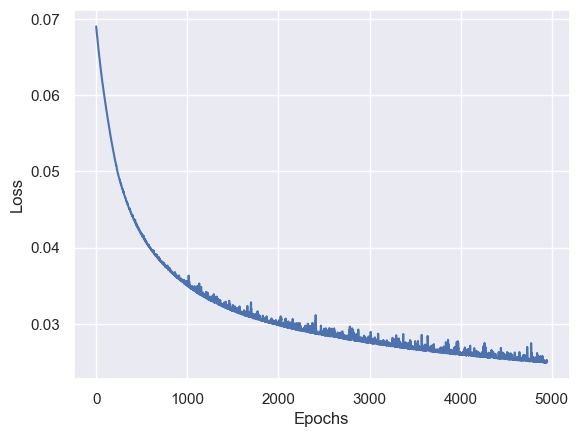

In [126]:
# plota as loss para ver se está treinando
plt.plot(historyLOGG.history['loss'][50:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

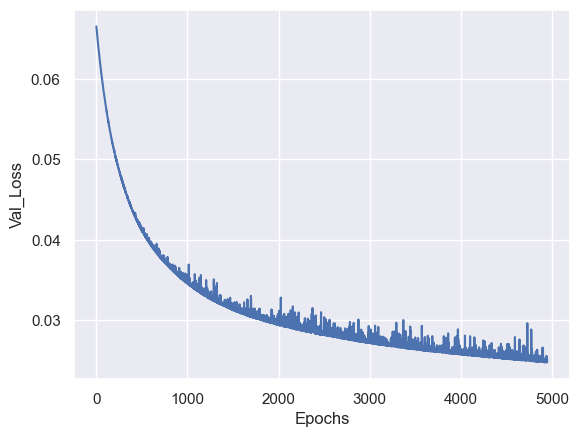

In [127]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyLOGG.history['val_loss'][50:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [135]:
#modelLOGG.save('modelosPosRio\\Lamost-LR\\model_LOGG-Dwarfs.h5')

In [129]:
predlogg = modelLOGG.predict(X_test)

107/107 [==============================] - 0s 3ms/step


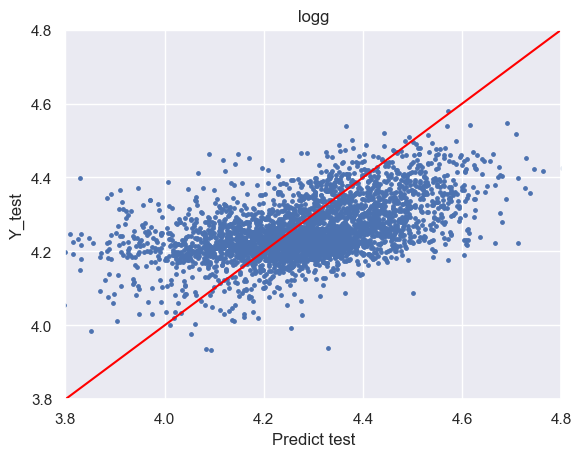

In [130]:
plt.scatter(Y_test[[columnTrain]], predlogg, s=6)
plt.title('logg')
plt.xlim(3.8, 4.8)
plt.ylim(3.8, 4.8)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([3, 5], [3, 5], c='red')

plt.grid(True)

In [131]:
score = r2_score(Y_test['logg'], predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 22.0%


In [132]:
Y_test['LOGG_Predict'] = predlogg

In [133]:
Y_test

,teff,logg,feh,alpha_m,teffEncoded,TEFF_PredictDecoded,LOGG_Predict
#ID,,,,,,,
iDR4_3_STRIPE82-0070_0009849,5717.06,4.212,-1.038,0.256545,0.340027,5881.082520,4.223732
iDR4_3_SPLUS-n03s20_0044501,5872.05,4.468,-0.463,-9999.000000,0.471137,5721.764160,4.270727
iDR4_3_SPLUS-n06s41_0014324,6113.78,4.234,-0.179,0.098691,0.675622,6130.913086,4.261899
iDR4_3_SPLUS-n03n01_0004887,5333.87,4.476,0.011,0.181952,0.015878,5417.048828,4.497847
iDR4_3_STRIPE82-0073_0017015,6075.81,4.347,-0.357,-0.037054,0.643502,5910.806641,4.261551
...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0154_0037496,5868.33,4.316,-0.139,0.075521,0.467990,5810.848633,4.263768
iDR4_3_STRIPE82-0054_0007045,5738.34,4.259,-0.541,0.204570,0.358029,5820.756836,4.259756
iDR4_3_SPLUS-n02s44_0024435,6054.53,4.253,0.094,0.023754,0.625501,6044.159180,4.296822


In [134]:
Y_test.to_csv("E:\\IC\\PredictsTreinos\\LamostLow\\Dwarfs-LoggPredict.csv")

### FEH

In [136]:
modelFEH = baseline_model_teste()

In [137]:
columnTrain = 'feh'

In [138]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyFEH = modelFEH.fit(X_train, Y_train[[columnTrain]], epochs = 1200, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/1200
5/5 - 1s - loss: 0.3690 - val_loss: 0.3466 - 703ms/epoch - 141ms/step
Epoch 2/1200
5/5 - 0s - loss: 0.3559 - val_loss: 0.3330 - 207ms/epoch - 41ms/step
Epoch 3/1200
5/5 - 0s - loss: 0.3413 - val_loss: 0.3172 - 60ms/epoch - 12ms/step
Epoch 4/1200
5/5 - 0s - loss: 0.3239 - val_loss: 0.2975 - 58ms/epoch - 12ms/step
Epoch 5/1200
5/5 - 0s - loss: 0.3020 - val_loss: 0.2727 - 55ms/epoch - 11ms/step
Epoch 6/1200
5/5 - 0s - loss: 0.2745 - val_loss: 0.2436 - 55ms/epoch - 11ms/step
Epoch 7/1200
5/5 - 0s - loss: 0.2434 - val_loss: 0.2156 - 55ms/epoch - 11ms/step
Epoch 8/1200
5/5 - 0s - loss: 0.2162 - val_loss: 0.2017 - 56ms/epoch - 11ms/step
Epoch 9/1200
5/5 - 0s - loss: 0.2068 - val_loss: 0.2067 - 55ms/epoch - 11ms/step
Epoch 10/1200
5/5 - 0s - loss: 0.2100 - val_loss: 0.2043 - 57ms/epoch - 11ms/step
Epoch 11/1200
5/5 - 0s - loss: 0.2055 - val_loss: 0.1979 - 56ms/epoch - 11ms/step
Epoch 12/1200
5/5 - 0s - loss: 0.2013 - val_loss: 0.1956 - 54ms/epoch - 11ms/step
Epoch 13/1200
5/5 - 0s

Epoch 101/1200
5/5 - 0s - loss: 0.0668 - val_loss: 0.0676 - 68ms/epoch - 14ms/step
Epoch 102/1200
5/5 - 0s - loss: 0.0671 - val_loss: 0.0655 - 63ms/epoch - 13ms/step
Epoch 103/1200
5/5 - 0s - loss: 0.0663 - val_loss: 0.0652 - 65ms/epoch - 13ms/step
Epoch 104/1200
5/5 - 0s - loss: 0.0658 - val_loss: 0.0648 - 63ms/epoch - 13ms/step
Epoch 105/1200
5/5 - 0s - loss: 0.0661 - val_loss: 0.0671 - 66ms/epoch - 13ms/step
Epoch 106/1200
5/5 - 0s - loss: 0.0670 - val_loss: 0.0672 - 63ms/epoch - 13ms/step
Epoch 107/1200
5/5 - 0s - loss: 0.0668 - val_loss: 0.0654 - 65ms/epoch - 13ms/step
Epoch 108/1200
5/5 - 0s - loss: 0.0651 - val_loss: 0.0642 - 67ms/epoch - 13ms/step
Epoch 109/1200
5/5 - 0s - loss: 0.0645 - val_loss: 0.0640 - 64ms/epoch - 13ms/step
Epoch 110/1200
5/5 - 0s - loss: 0.0643 - val_loss: 0.0640 - 73ms/epoch - 15ms/step
Epoch 111/1200
5/5 - 0s - loss: 0.0643 - val_loss: 0.0677 - 63ms/epoch - 13ms/step
Epoch 112/1200
5/5 - 0s - loss: 0.0656 - val_loss: 0.0664 - 65ms/epoch - 13ms/step
Epoc

Epoch 200/1200
5/5 - 0s - loss: 0.0533 - val_loss: 0.0558 - 69ms/epoch - 14ms/step
Epoch 201/1200
5/5 - 0s - loss: 0.0541 - val_loss: 0.0523 - 65ms/epoch - 13ms/step
Epoch 202/1200
5/5 - 0s - loss: 0.0524 - val_loss: 0.0520 - 67ms/epoch - 13ms/step
Epoch 203/1200
5/5 - 0s - loss: 0.0522 - val_loss: 0.0520 - 68ms/epoch - 14ms/step
Epoch 204/1200
5/5 - 0s - loss: 0.0519 - val_loss: 0.0518 - 67ms/epoch - 13ms/step
Epoch 205/1200
5/5 - 0s - loss: 0.0519 - val_loss: 0.0517 - 68ms/epoch - 14ms/step
Epoch 206/1200
5/5 - 0s - loss: 0.0517 - val_loss: 0.0520 - 66ms/epoch - 13ms/step
Epoch 207/1200
5/5 - 0s - loss: 0.0520 - val_loss: 0.0517 - 69ms/epoch - 14ms/step
Epoch 208/1200
5/5 - 0s - loss: 0.0516 - val_loss: 0.0519 - 65ms/epoch - 13ms/step
Epoch 209/1200
5/5 - 0s - loss: 0.0520 - val_loss: 0.0513 - 67ms/epoch - 13ms/step
Epoch 210/1200
5/5 - 0s - loss: 0.0519 - val_loss: 0.0513 - 67ms/epoch - 13ms/step
Epoch 211/1200
5/5 - 0s - loss: 0.0514 - val_loss: 0.0513 - 65ms/epoch - 13ms/step
Epoc

Epoch 299/1200
5/5 - 0s - loss: 0.0491 - val_loss: 0.0475 - 69ms/epoch - 14ms/step
Epoch 300/1200
5/5 - 0s - loss: 0.0477 - val_loss: 0.0480 - 65ms/epoch - 13ms/step
Epoch 301/1200
5/5 - 0s - loss: 0.0476 - val_loss: 0.0472 - 69ms/epoch - 14ms/step
Epoch 302/1200
5/5 - 0s - loss: 0.0474 - val_loss: 0.0468 - 67ms/epoch - 13ms/step
Epoch 303/1200
5/5 - 0s - loss: 0.0472 - val_loss: 0.0471 - 68ms/epoch - 14ms/step
Epoch 304/1200
5/5 - 0s - loss: 0.0474 - val_loss: 0.0469 - 66ms/epoch - 13ms/step
Epoch 305/1200
5/5 - 0s - loss: 0.0473 - val_loss: 0.0467 - 68ms/epoch - 14ms/step
Epoch 306/1200
5/5 - 0s - loss: 0.0471 - val_loss: 0.0466 - 70ms/epoch - 14ms/step
Epoch 307/1200
5/5 - 0s - loss: 0.0471 - val_loss: 0.0465 - 70ms/epoch - 14ms/step
Epoch 308/1200
5/5 - 0s - loss: 0.0470 - val_loss: 0.0464 - 76ms/epoch - 15ms/step
Epoch 309/1200
5/5 - 0s - loss: 0.0470 - val_loss: 0.0471 - 74ms/epoch - 15ms/step
Epoch 310/1200
5/5 - 0s - loss: 0.0474 - val_loss: 0.0472 - 72ms/epoch - 14ms/step
Epoc

Epoch 398/1200
5/5 - 0s - loss: 0.0452 - val_loss: 0.0448 - 70ms/epoch - 14ms/step
Epoch 399/1200
5/5 - 0s - loss: 0.0451 - val_loss: 0.0446 - 70ms/epoch - 14ms/step
Epoch 400/1200
5/5 - 0s - loss: 0.0449 - val_loss: 0.0445 - 68ms/epoch - 14ms/step
Epoch 401/1200
5/5 - 0s - loss: 0.0449 - val_loss: 0.0445 - 69ms/epoch - 14ms/step
Epoch 402/1200
5/5 - 0s - loss: 0.0450 - val_loss: 0.0446 - 72ms/epoch - 14ms/step
Epoch 403/1200
5/5 - 0s - loss: 0.0450 - val_loss: 0.0450 - 67ms/epoch - 13ms/step
Epoch 404/1200
5/5 - 0s - loss: 0.0452 - val_loss: 0.0444 - 67ms/epoch - 13ms/step
Epoch 405/1200
5/5 - 0s - loss: 0.0451 - val_loss: 0.0447 - 67ms/epoch - 13ms/step
Epoch 406/1200
5/5 - 0s - loss: 0.0450 - val_loss: 0.0453 - 71ms/epoch - 14ms/step
Epoch 407/1200
5/5 - 0s - loss: 0.0454 - val_loss: 0.0445 - 70ms/epoch - 14ms/step
Epoch 408/1200
5/5 - 0s - loss: 0.0450 - val_loss: 0.0442 - 66ms/epoch - 13ms/step
Epoch 409/1200
5/5 - 0s - loss: 0.0449 - val_loss: 0.0472 - 68ms/epoch - 14ms/step
Epoc

Epoch 497/1200
5/5 - 0s - loss: 0.0438 - val_loss: 0.0431 - 60ms/epoch - 12ms/step
Epoch 498/1200
5/5 - 0s - loss: 0.0437 - val_loss: 0.0432 - 57ms/epoch - 11ms/step
Epoch 499/1200
5/5 - 0s - loss: 0.0435 - val_loss: 0.0443 - 68ms/epoch - 14ms/step
Epoch 500/1200
5/5 - 0s - loss: 0.0441 - val_loss: 0.0429 - 66ms/epoch - 13ms/step
Epoch 501/1200
5/5 - 0s - loss: 0.0439 - val_loss: 0.0440 - 68ms/epoch - 14ms/step
Epoch 502/1200
5/5 - 0s - loss: 0.0441 - val_loss: 0.0442 - 67ms/epoch - 13ms/step
Epoch 503/1200
5/5 - 0s - loss: 0.0442 - val_loss: 0.0446 - 67ms/epoch - 13ms/step
Epoch 504/1200
5/5 - 0s - loss: 0.0448 - val_loss: 0.0457 - 60ms/epoch - 12ms/step
Epoch 505/1200
5/5 - 0s - loss: 0.0449 - val_loss: 0.0473 - 61ms/epoch - 12ms/step
Epoch 506/1200
5/5 - 0s - loss: 0.0456 - val_loss: 0.0429 - 66ms/epoch - 13ms/step
Epoch 507/1200
5/5 - 0s - loss: 0.0438 - val_loss: 0.0436 - 64ms/epoch - 13ms/step
Epoch 508/1200
5/5 - 0s - loss: 0.0437 - val_loss: 0.0433 - 64ms/epoch - 13ms/step
Epoc

Epoch 596/1200
5/5 - 0s - loss: 0.0432 - val_loss: 0.0419 - 63ms/epoch - 13ms/step
Epoch 597/1200
5/5 - 0s - loss: 0.0427 - val_loss: 0.0421 - 61ms/epoch - 12ms/step
Epoch 598/1200
5/5 - 0s - loss: 0.0426 - val_loss: 0.0421 - 64ms/epoch - 13ms/step
Epoch 599/1200
5/5 - 0s - loss: 0.0427 - val_loss: 0.0421 - 62ms/epoch - 12ms/step
Epoch 600/1200
5/5 - 0s - loss: 0.0426 - val_loss: 0.0431 - 65ms/epoch - 13ms/step
Epoch 601/1200
5/5 - 0s - loss: 0.0432 - val_loss: 0.0418 - 68ms/epoch - 14ms/step
Epoch 602/1200
5/5 - 0s - loss: 0.0427 - val_loss: 0.0422 - 65ms/epoch - 13ms/step
Epoch 603/1200
5/5 - 0s - loss: 0.0426 - val_loss: 0.0420 - 67ms/epoch - 13ms/step
Epoch 604/1200
5/5 - 0s - loss: 0.0426 - val_loss: 0.0420 - 68ms/epoch - 14ms/step
Epoch 605/1200
5/5 - 0s - loss: 0.0427 - val_loss: 0.0429 - 64ms/epoch - 13ms/step
Epoch 606/1200
5/5 - 0s - loss: 0.0431 - val_loss: 0.0419 - 65ms/epoch - 13ms/step
Epoch 607/1200
5/5 - 0s - loss: 0.0428 - val_loss: 0.0420 - 65ms/epoch - 13ms/step
Epoc

Epoch 695/1200
5/5 - 0s - loss: 0.0427 - val_loss: 0.0428 - 57ms/epoch - 11ms/step
Epoch 696/1200
5/5 - 0s - loss: 0.0427 - val_loss: 0.0417 - 58ms/epoch - 12ms/step
Epoch 697/1200
5/5 - 0s - loss: 0.0423 - val_loss: 0.0422 - 63ms/epoch - 13ms/step
Epoch 698/1200
5/5 - 0s - loss: 0.0425 - val_loss: 0.0421 - 57ms/epoch - 11ms/step
Epoch 699/1200
5/5 - 0s - loss: 0.0420 - val_loss: 0.0413 - 56ms/epoch - 11ms/step
Epoch 700/1200
5/5 - 0s - loss: 0.0420 - val_loss: 0.0414 - 56ms/epoch - 11ms/step
Epoch 701/1200
5/5 - 0s - loss: 0.0424 - val_loss: 0.0416 - 61ms/epoch - 12ms/step
Epoch 702/1200
5/5 - 0s - loss: 0.0419 - val_loss: 0.0422 - 57ms/epoch - 11ms/step
Epoch 703/1200
5/5 - 0s - loss: 0.0423 - val_loss: 0.0414 - 58ms/epoch - 12ms/step
Epoch 704/1200
5/5 - 0s - loss: 0.0419 - val_loss: 0.0453 - 59ms/epoch - 12ms/step
Epoch 705/1200
5/5 - 0s - loss: 0.0439 - val_loss: 0.0423 - 60ms/epoch - 12ms/step
Epoch 706/1200
5/5 - 0s - loss: 0.0428 - val_loss: 0.0414 - 58ms/epoch - 12ms/step
Epoc

Epoch 794/1200
5/5 - 0s - loss: 0.0414 - val_loss: 0.0419 - 66ms/epoch - 13ms/step
Epoch 795/1200
5/5 - 0s - loss: 0.0420 - val_loss: 0.0406 - 63ms/epoch - 13ms/step
Epoch 796/1200
5/5 - 0s - loss: 0.0413 - val_loss: 0.0410 - 61ms/epoch - 12ms/step
Epoch 797/1200
5/5 - 0s - loss: 0.0412 - val_loss: 0.0406 - 57ms/epoch - 11ms/step
Epoch 798/1200
5/5 - 0s - loss: 0.0412 - val_loss: 0.0408 - 57ms/epoch - 11ms/step
Epoch 799/1200
5/5 - 0s - loss: 0.0412 - val_loss: 0.0408 - 58ms/epoch - 12ms/step
Epoch 800/1200
5/5 - 0s - loss: 0.0413 - val_loss: 0.0410 - 57ms/epoch - 11ms/step
Epoch 801/1200
5/5 - 0s - loss: 0.0415 - val_loss: 0.0406 - 57ms/epoch - 11ms/step
Epoch 802/1200
5/5 - 0s - loss: 0.0412 - val_loss: 0.0408 - 67ms/epoch - 13ms/step
Epoch 803/1200
5/5 - 0s - loss: 0.0412 - val_loss: 0.0408 - 75ms/epoch - 15ms/step
Epoch 804/1200
5/5 - 0s - loss: 0.0411 - val_loss: 0.0410 - 71ms/epoch - 14ms/step
Epoch 805/1200
5/5 - 0s - loss: 0.0413 - val_loss: 0.0407 - 67ms/epoch - 13ms/step
Epoc

Epoch 893/1200
5/5 - 0s - loss: 0.0413 - val_loss: 0.0429 - 66ms/epoch - 13ms/step
Epoch 894/1200
5/5 - 0s - loss: 0.0418 - val_loss: 0.0404 - 79ms/epoch - 16ms/step
Epoch 895/1200
5/5 - 0s - loss: 0.0413 - val_loss: 0.0411 - 78ms/epoch - 16ms/step
Epoch 896/1200
5/5 - 0s - loss: 0.0408 - val_loss: 0.0400 - 66ms/epoch - 13ms/step
Epoch 897/1200
5/5 - 0s - loss: 0.0407 - val_loss: 0.0412 - 65ms/epoch - 13ms/step
Epoch 898/1200
5/5 - 0s - loss: 0.0414 - val_loss: 0.0408 - 64ms/epoch - 13ms/step
Epoch 899/1200
5/5 - 0s - loss: 0.0413 - val_loss: 0.0435 - 63ms/epoch - 13ms/step
Epoch 900/1200
5/5 - 0s - loss: 0.0422 - val_loss: 0.0400 - 65ms/epoch - 13ms/step
Epoch 901/1200
5/5 - 0s - loss: 0.0409 - val_loss: 0.0407 - 66ms/epoch - 13ms/step
Epoch 902/1200
5/5 - 0s - loss: 0.0407 - val_loss: 0.0400 - 67ms/epoch - 13ms/step
Epoch 903/1200
5/5 - 0s - loss: 0.0406 - val_loss: 0.0403 - 68ms/epoch - 14ms/step
Epoch 904/1200
5/5 - 0s - loss: 0.0404 - val_loss: 0.0402 - 63ms/epoch - 13ms/step
Epoc

Epoch 992/1200
5/5 - 0s - loss: 0.0403 - val_loss: 0.0404 - 67ms/epoch - 13ms/step
Epoch 993/1200
5/5 - 0s - loss: 0.0404 - val_loss: 0.0402 - 79ms/epoch - 16ms/step
Epoch 994/1200
5/5 - 0s - loss: 0.0406 - val_loss: 0.0396 - 64ms/epoch - 13ms/step
Epoch 995/1200
5/5 - 0s - loss: 0.0399 - val_loss: 0.0396 - 70ms/epoch - 14ms/step
Epoch 996/1200
5/5 - 0s - loss: 0.0399 - val_loss: 0.0395 - 75ms/epoch - 15ms/step
Epoch 997/1200
5/5 - 0s - loss: 0.0399 - val_loss: 0.0395 - 76ms/epoch - 15ms/step
Epoch 998/1200
5/5 - 0s - loss: 0.0399 - val_loss: 0.0395 - 60ms/epoch - 12ms/step
Epoch 999/1200
5/5 - 0s - loss: 0.0399 - val_loss: 0.0394 - 70ms/epoch - 14ms/step
Epoch 1000/1200
5/5 - 0s - loss: 0.0399 - val_loss: 0.0395 - 74ms/epoch - 15ms/step
Epoch 1001/1200
5/5 - 0s - loss: 0.0399 - val_loss: 0.0426 - 71ms/epoch - 14ms/step
Epoch 1002/1200
5/5 - 0s - loss: 0.0412 - val_loss: 0.0396 - 61ms/epoch - 12ms/step
Epoch 1003/1200
5/5 - 0s - loss: 0.0404 - val_loss: 0.0403 - 71ms/epoch - 14ms/step


Epoch 1090/1200
5/5 - 0s - loss: 0.0395 - val_loss: 0.0392 - 72ms/epoch - 14ms/step
Epoch 1091/1200
5/5 - 0s - loss: 0.0396 - val_loss: 0.0397 - 73ms/epoch - 15ms/step
Epoch 1092/1200
5/5 - 0s - loss: 0.0397 - val_loss: 0.0398 - 62ms/epoch - 12ms/step
Epoch 1093/1200
5/5 - 0s - loss: 0.0397 - val_loss: 0.0391 - 60ms/epoch - 12ms/step
Epoch 1094/1200
5/5 - 0s - loss: 0.0400 - val_loss: 0.0416 - 65ms/epoch - 13ms/step
Epoch 1095/1200
5/5 - 0s - loss: 0.0404 - val_loss: 0.0390 - 69ms/epoch - 14ms/step
Epoch 1096/1200
5/5 - 0s - loss: 0.0400 - val_loss: 0.0393 - 67ms/epoch - 13ms/step
Epoch 1097/1200
5/5 - 0s - loss: 0.0396 - val_loss: 0.0397 - 65ms/epoch - 13ms/step
Epoch 1098/1200
5/5 - 0s - loss: 0.0397 - val_loss: 0.0395 - 66ms/epoch - 13ms/step
Epoch 1099/1200
5/5 - 0s - loss: 0.0396 - val_loss: 0.0388 - 63ms/epoch - 13ms/step
Epoch 1100/1200
5/5 - 0s - loss: 0.0396 - val_loss: 0.0399 - 61ms/epoch - 12ms/step
Epoch 1101/1200
5/5 - 0s - loss: 0.0400 - val_loss: 0.0392 - 68ms/epoch - 14

Epoch 1188/1200
5/5 - 0s - loss: 0.0389 - val_loss: 0.0386 - 100ms/epoch - 20ms/step
Epoch 1189/1200
5/5 - 0s - loss: 0.0389 - val_loss: 0.0397 - 68ms/epoch - 14ms/step
Epoch 1190/1200
5/5 - 0s - loss: 0.0394 - val_loss: 0.0386 - 62ms/epoch - 12ms/step
Epoch 1191/1200
5/5 - 0s - loss: 0.0389 - val_loss: 0.0386 - 69ms/epoch - 14ms/step
Epoch 1192/1200
5/5 - 0s - loss: 0.0390 - val_loss: 0.0389 - 104ms/epoch - 21ms/step
Epoch 1193/1200
5/5 - 0s - loss: 0.0391 - val_loss: 0.0386 - 67ms/epoch - 13ms/step
Epoch 1194/1200
5/5 - 0s - loss: 0.0391 - val_loss: 0.0386 - 114ms/epoch - 23ms/step
Epoch 1195/1200
5/5 - 0s - loss: 0.0391 - val_loss: 0.0385 - 65ms/epoch - 13ms/step
Epoch 1196/1200
5/5 - 0s - loss: 0.0389 - val_loss: 0.0386 - 75ms/epoch - 15ms/step
Epoch 1197/1200
5/5 - 0s - loss: 0.0388 - val_loss: 0.0456 - 71ms/epoch - 14ms/step
Epoch 1198/1200
5/5 - 0s - loss: 0.0423 - val_loss: 0.0401 - 70ms/epoch - 14ms/step
Epoch 1199/1200
5/5 - 0s - loss: 0.0409 - val_loss: 0.0387 - 63ms/epoch -

Text(0, 0.5, 'Loss')

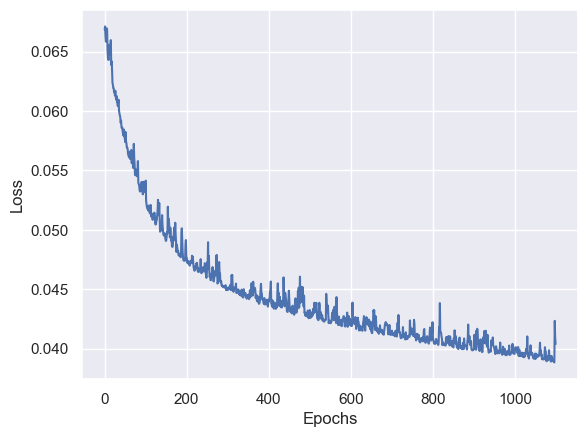

In [140]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][100:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

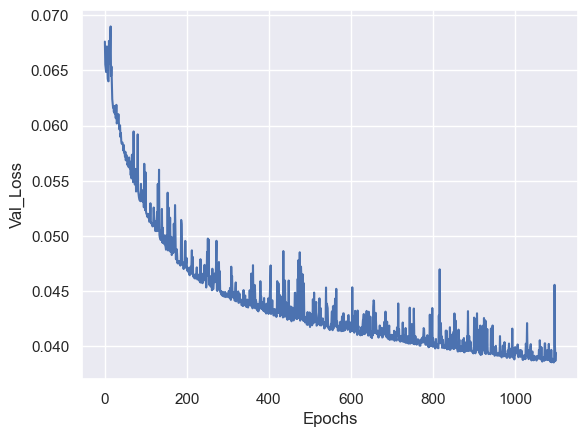

In [142]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyFEH.history['val_loss'][100:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [147]:
#modelFEH.save('modelosPosRio\\Lamost-LR\\model_FEH-Dwarfs.h5')

In [143]:
predfeh = modelFEH.predict(X_test)

107/107 [==============================] - 0s 1ms/step


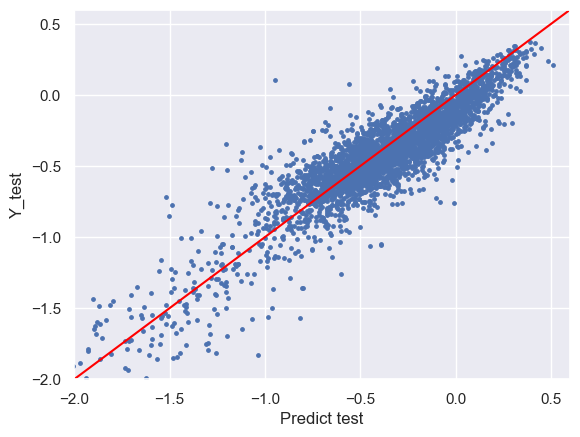

In [144]:
plt.scatter(Y_test[[columnTrain]], predfeh, s=6)
#plt.title('FE_H')
plt.xlim(-2, 0.6)
plt.ylim(-2, 0.6)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([-2, 1], [-2, 1], c='red')

In [146]:
score = r2_score(Y_test['feh'], predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 81.0%


In [148]:
Y_test['FEH_Predict'] = predfeh

In [149]:
Y_test

,teff,logg,feh,alpha_m,teffEncoded,TEFF_PredictDecoded,LOGG_Predict,FEH_Predict
#ID,,,,,,,,
iDR4_3_STRIPE82-0070_0009849,5717.06,4.212,-1.038,0.256545,0.340027,5881.082520,4.223732,-0.897728
iDR4_3_SPLUS-n03s20_0044501,5872.05,4.468,-0.463,-9999.000000,0.471137,5721.764160,4.270727,-0.541004
iDR4_3_SPLUS-n06s41_0014324,6113.78,4.234,-0.179,0.098691,0.675622,6130.913086,4.261899,-0.390539
iDR4_3_SPLUS-n03n01_0004887,5333.87,4.476,0.011,0.181952,0.015878,5417.048828,4.497847,0.050868
iDR4_3_STRIPE82-0073_0017015,6075.81,4.347,-0.357,-0.037054,0.643502,5910.806641,4.261551,-0.653890
...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0154_0037496,5868.33,4.316,-0.139,0.075521,0.467990,5810.848633,4.263768,-0.210275
iDR4_3_STRIPE82-0054_0007045,5738.34,4.259,-0.541,0.204570,0.358029,5820.756836,4.259756,-0.487319
iDR4_3_SPLUS-n02s44_0024435,6054.53,4.253,0.094,0.023754,0.625501,6044.159180,4.296822,-0.143298


In [150]:
Y_test.to_csv("E:\\IC\\PredictsTreinos\\LamostLow\\Dwarfs-FeHPredict.csv")

### Alpha

In [8]:
AnasCoresAlpha = AnasCores.loc[AnasCores['alpha_m'] != -9999]

In [9]:
xtrain = AnasCoresAlpha.iloc[:, :66]

In [10]:
columnYtrain =  ['teff', 'logg', 'feh', 'alpha_m']

In [11]:
ytrain = AnasCoresAlpha[columnYtrain]

In [12]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [13]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [14]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [50]:
Y_train

,teff,logg,feh,alpha_m
#ID,,,,
iDR4_3_STRIPE82-0065_0001357,5769.61,4.249,-0.421,0.199863
iDR4_3_SPLUS-n01s38_0012597,5729.40,4.357,-0.072,0.211135
iDR4_3_STRIPE82-0152_0038409,6025.32,4.180,-0.133,0.089926
iDR4_3_STRIPE82-0048_0052390,5346.10,4.484,-0.374,0.174622
iDR4_3_SPLUS-n02s22_0038510,6090.94,4.274,-0.060,0.099617
...,...,...,...,...
iDR4_3_STRIPE82-0115_0016069,5623.01,4.317,0.201,0.162840
iDR4_3_SPLUS-n03s22_0019039,5372.62,4.155,0.278,0.175779
iDR4_3_STRIPE82-0066_0025442,5783.30,4.359,-0.204,0.163206


In [38]:
modelAlpha = baseline_model_teste()

In [39]:
columnTrain = 'alpha_m'

In [40]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyAlpha = modelAlpha.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
19/19 - 1s - loss: 0.0910 - val_loss: 0.0796 - 802ms/epoch - 42ms/step
Epoch 2/2000
19/19 - 0s - loss: 0.0698 - val_loss: 0.0666 - 123ms/epoch - 6ms/step
Epoch 3/2000
19/19 - 0s - loss: 0.0643 - val_loss: 0.0635 - 121ms/epoch - 6ms/step
Epoch 4/2000
19/19 - 0s - loss: 0.0620 - val_loss: 0.0613 - 123ms/epoch - 6ms/step
Epoch 5/2000
19/19 - 0s - loss: 0.0600 - val_loss: 0.0594 - 117ms/epoch - 6ms/step
Epoch 6/2000
19/19 - 0s - loss: 0.0582 - val_loss: 0.0576 - 115ms/epoch - 6ms/step
Epoch 7/2000
19/19 - 0s - loss: 0.0564 - val_loss: 0.0559 - 112ms/epoch - 6ms/step
Epoch 8/2000
19/19 - 0s - loss: 0.0547 - val_loss: 0.0541 - 114ms/epoch - 6ms/step
Epoch 9/2000
19/19 - 0s - loss: 0.0530 - val_loss: 0.0525 - 114ms/epoch - 6ms/step
Epoch 10/2000
19/19 - 0s - loss: 0.0514 - val_loss: 0.0509 - 118ms/epoch - 6ms/step
Epoch 11/2000
19/19 - 0s - loss: 0.0498 - val_loss: 0.0493 - 119ms/epoch - 6ms/step
Epoch 12/2000
19/19 - 0s - loss: 0.0482 - val_loss: 0.0478 - 116ms/epoch - 6ms/step


Epoch 99/2000
19/19 - 0s - loss: 0.0176 - val_loss: 0.0178 - 150ms/epoch - 8ms/step
Epoch 100/2000
19/19 - 0s - loss: 0.0176 - val_loss: 0.0176 - 152ms/epoch - 8ms/step
Epoch 101/2000
19/19 - 0s - loss: 0.0177 - val_loss: 0.0179 - 152ms/epoch - 8ms/step
Epoch 102/2000
19/19 - 0s - loss: 0.0177 - val_loss: 0.0176 - 147ms/epoch - 8ms/step
Epoch 103/2000
19/19 - 0s - loss: 0.0174 - val_loss: 0.0175 - 147ms/epoch - 8ms/step
Epoch 104/2000
19/19 - 0s - loss: 0.0174 - val_loss: 0.0175 - 149ms/epoch - 8ms/step
Epoch 105/2000
19/19 - 0s - loss: 0.0174 - val_loss: 0.0176 - 150ms/epoch - 8ms/step
Epoch 106/2000
19/19 - 0s - loss: 0.0173 - val_loss: 0.0174 - 149ms/epoch - 8ms/step
Epoch 107/2000
19/19 - 0s - loss: 0.0173 - val_loss: 0.0174 - 157ms/epoch - 8ms/step
Epoch 108/2000
19/19 - 0s - loss: 0.0174 - val_loss: 0.0174 - 150ms/epoch - 8ms/step
Epoch 109/2000
19/19 - 0s - loss: 0.0172 - val_loss: 0.0173 - 149ms/epoch - 8ms/step
Epoch 110/2000
19/19 - 0s - loss: 0.0173 - val_loss: 0.0177 - 148m

Epoch 196/2000
19/19 - 0s - loss: 0.0156 - val_loss: 0.0159 - 159ms/epoch - 8ms/step
Epoch 197/2000
19/19 - 0s - loss: 0.0156 - val_loss: 0.0160 - 151ms/epoch - 8ms/step
Epoch 198/2000
19/19 - 0s - loss: 0.0155 - val_loss: 0.0155 - 151ms/epoch - 8ms/step
Epoch 199/2000
19/19 - 0s - loss: 0.0154 - val_loss: 0.0155 - 147ms/epoch - 8ms/step
Epoch 200/2000
19/19 - 0s - loss: 0.0155 - val_loss: 0.0156 - 145ms/epoch - 8ms/step
Epoch 201/2000
19/19 - 0s - loss: 0.0155 - val_loss: 0.0155 - 142ms/epoch - 7ms/step
Epoch 202/2000
19/19 - 0s - loss: 0.0154 - val_loss: 0.0154 - 150ms/epoch - 8ms/step
Epoch 203/2000
19/19 - 0s - loss: 0.0154 - val_loss: 0.0154 - 151ms/epoch - 8ms/step
Epoch 204/2000
19/19 - 0s - loss: 0.0154 - val_loss: 0.0157 - 148ms/epoch - 8ms/step
Epoch 205/2000
19/19 - 0s - loss: 0.0155 - val_loss: 0.0155 - 151ms/epoch - 8ms/step
Epoch 206/2000
19/19 - 0s - loss: 0.0154 - val_loss: 0.0156 - 156ms/epoch - 8ms/step
Epoch 207/2000
19/19 - 0s - loss: 0.0153 - val_loss: 0.0155 - 148

Epoch 293/2000
19/19 - 0s - loss: 0.0146 - val_loss: 0.0147 - 152ms/epoch - 8ms/step
Epoch 294/2000
19/19 - 0s - loss: 0.0146 - val_loss: 0.0149 - 153ms/epoch - 8ms/step
Epoch 295/2000
19/19 - 0s - loss: 0.0147 - val_loss: 0.0148 - 148ms/epoch - 8ms/step
Epoch 296/2000
19/19 - 0s - loss: 0.0146 - val_loss: 0.0147 - 152ms/epoch - 8ms/step
Epoch 297/2000
19/19 - 0s - loss: 0.0146 - val_loss: 0.0148 - 149ms/epoch - 8ms/step
Epoch 298/2000
19/19 - 0s - loss: 0.0147 - val_loss: 0.0147 - 150ms/epoch - 8ms/step
Epoch 299/2000
19/19 - 0s - loss: 0.0146 - val_loss: 0.0147 - 147ms/epoch - 8ms/step
Epoch 300/2000
19/19 - 0s - loss: 0.0146 - val_loss: 0.0147 - 147ms/epoch - 8ms/step
Epoch 301/2000
19/19 - 0s - loss: 0.0146 - val_loss: 0.0146 - 155ms/epoch - 8ms/step
Epoch 302/2000
19/19 - 0s - loss: 0.0145 - val_loss: 0.0147 - 148ms/epoch - 8ms/step
Epoch 303/2000
19/19 - 0s - loss: 0.0146 - val_loss: 0.0148 - 151ms/epoch - 8ms/step
Epoch 304/2000
19/19 - 0s - loss: 0.0146 - val_loss: 0.0146 - 149

Epoch 390/2000
19/19 - 0s - loss: 0.0141 - val_loss: 0.0143 - 150ms/epoch - 8ms/step
Epoch 391/2000
19/19 - 0s - loss: 0.0141 - val_loss: 0.0141 - 163ms/epoch - 9ms/step
Epoch 392/2000
19/19 - 0s - loss: 0.0140 - val_loss: 0.0140 - 153ms/epoch - 8ms/step
Epoch 393/2000
19/19 - 0s - loss: 0.0140 - val_loss: 0.0143 - 150ms/epoch - 8ms/step
Epoch 394/2000
19/19 - 0s - loss: 0.0141 - val_loss: 0.0141 - 155ms/epoch - 8ms/step
Epoch 395/2000
19/19 - 0s - loss: 0.0141 - val_loss: 0.0142 - 149ms/epoch - 8ms/step
Epoch 396/2000
19/19 - 0s - loss: 0.0141 - val_loss: 0.0141 - 152ms/epoch - 8ms/step
Epoch 397/2000
19/19 - 0s - loss: 0.0140 - val_loss: 0.0140 - 148ms/epoch - 8ms/step
Epoch 398/2000
19/19 - 0s - loss: 0.0140 - val_loss: 0.0140 - 151ms/epoch - 8ms/step
Epoch 399/2000
19/19 - 0s - loss: 0.0141 - val_loss: 0.0147 - 146ms/epoch - 8ms/step
Epoch 400/2000
19/19 - 0s - loss: 0.0142 - val_loss: 0.0142 - 147ms/epoch - 8ms/step
Epoch 401/2000
19/19 - 0s - loss: 0.0141 - val_loss: 0.0142 - 150

Epoch 487/2000
19/19 - 0s - loss: 0.0136 - val_loss: 0.0136 - 143ms/epoch - 8ms/step
Epoch 488/2000
19/19 - 0s - loss: 0.0136 - val_loss: 0.0137 - 147ms/epoch - 8ms/step
Epoch 489/2000
19/19 - 0s - loss: 0.0137 - val_loss: 0.0141 - 149ms/epoch - 8ms/step
Epoch 490/2000
19/19 - 0s - loss: 0.0140 - val_loss: 0.0138 - 150ms/epoch - 8ms/step
Epoch 491/2000
19/19 - 0s - loss: 0.0137 - val_loss: 0.0138 - 152ms/epoch - 8ms/step
Epoch 492/2000
19/19 - 0s - loss: 0.0137 - val_loss: 0.0142 - 155ms/epoch - 8ms/step
Epoch 493/2000
19/19 - 0s - loss: 0.0136 - val_loss: 0.0137 - 150ms/epoch - 8ms/step
Epoch 494/2000
19/19 - 0s - loss: 0.0137 - val_loss: 0.0138 - 149ms/epoch - 8ms/step
Epoch 495/2000
19/19 - 0s - loss: 0.0137 - val_loss: 0.0137 - 149ms/epoch - 8ms/step
Epoch 496/2000
19/19 - 0s - loss: 0.0137 - val_loss: 0.0137 - 148ms/epoch - 8ms/step
Epoch 497/2000
19/19 - 0s - loss: 0.0137 - val_loss: 0.0138 - 147ms/epoch - 8ms/step
Epoch 498/2000
19/19 - 0s - loss: 0.0136 - val_loss: 0.0136 - 149

Epoch 584/2000
19/19 - 0s - loss: 0.0134 - val_loss: 0.0135 - 142ms/epoch - 7ms/step
Epoch 585/2000
19/19 - 0s - loss: 0.0134 - val_loss: 0.0135 - 148ms/epoch - 8ms/step
Epoch 586/2000
19/19 - 0s - loss: 0.0134 - val_loss: 0.0134 - 191ms/epoch - 10ms/step
Epoch 587/2000
19/19 - 0s - loss: 0.0133 - val_loss: 0.0134 - 145ms/epoch - 8ms/step
Epoch 588/2000
19/19 - 0s - loss: 0.0134 - val_loss: 0.0136 - 150ms/epoch - 8ms/step
Epoch 589/2000
19/19 - 0s - loss: 0.0135 - val_loss: 0.0136 - 156ms/epoch - 8ms/step
Epoch 590/2000
19/19 - 0s - loss: 0.0134 - val_loss: 0.0133 - 157ms/epoch - 8ms/step
Epoch 591/2000
19/19 - 0s - loss: 0.0133 - val_loss: 0.0137 - 147ms/epoch - 8ms/step
Epoch 592/2000
19/19 - 0s - loss: 0.0133 - val_loss: 0.0134 - 146ms/epoch - 8ms/step
Epoch 593/2000
19/19 - 0s - loss: 0.0134 - val_loss: 0.0134 - 148ms/epoch - 8ms/step
Epoch 594/2000
19/19 - 0s - loss: 0.0136 - val_loss: 0.0142 - 151ms/epoch - 8ms/step
Epoch 595/2000
19/19 - 0s - loss: 0.0135 - val_loss: 0.0134 - 14

Epoch 681/2000
19/19 - 0s - loss: 0.0131 - val_loss: 0.0131 - 158ms/epoch - 8ms/step
Epoch 682/2000
19/19 - 0s - loss: 0.0130 - val_loss: 0.0131 - 155ms/epoch - 8ms/step
Epoch 683/2000
19/19 - 0s - loss: 0.0131 - val_loss: 0.0131 - 153ms/epoch - 8ms/step
Epoch 684/2000
19/19 - 0s - loss: 0.0132 - val_loss: 0.0130 - 160ms/epoch - 8ms/step
Epoch 685/2000
19/19 - 0s - loss: 0.0131 - val_loss: 0.0130 - 157ms/epoch - 8ms/step
Epoch 686/2000
19/19 - 0s - loss: 0.0131 - val_loss: 0.0131 - 165ms/epoch - 9ms/step
Epoch 687/2000
19/19 - 0s - loss: 0.0131 - val_loss: 0.0137 - 168ms/epoch - 9ms/step
Epoch 688/2000
19/19 - 0s - loss: 0.0133 - val_loss: 0.0131 - 157ms/epoch - 8ms/step
Epoch 689/2000
19/19 - 0s - loss: 0.0131 - val_loss: 0.0134 - 158ms/epoch - 8ms/step
Epoch 690/2000
19/19 - 0s - loss: 0.0131 - val_loss: 0.0130 - 170ms/epoch - 9ms/step
Epoch 691/2000
19/19 - 0s - loss: 0.0130 - val_loss: 0.0131 - 162ms/epoch - 9ms/step
Epoch 692/2000
19/19 - 0s - loss: 0.0133 - val_loss: 0.0132 - 157

Epoch 778/2000
19/19 - 0s - loss: 0.0129 - val_loss: 0.0129 - 151ms/epoch - 8ms/step
Epoch 779/2000
19/19 - 0s - loss: 0.0129 - val_loss: 0.0129 - 150ms/epoch - 8ms/step
Epoch 780/2000
19/19 - 0s - loss: 0.0128 - val_loss: 0.0129 - 147ms/epoch - 8ms/step
Epoch 781/2000
19/19 - 0s - loss: 0.0128 - val_loss: 0.0131 - 142ms/epoch - 7ms/step
Epoch 782/2000
19/19 - 0s - loss: 0.0130 - val_loss: 0.0132 - 149ms/epoch - 8ms/step
Epoch 783/2000
19/19 - 0s - loss: 0.0129 - val_loss: 0.0128 - 162ms/epoch - 9ms/step
Epoch 784/2000
19/19 - 0s - loss: 0.0129 - val_loss: 0.0128 - 160ms/epoch - 8ms/step
Epoch 785/2000
19/19 - 0s - loss: 0.0128 - val_loss: 0.0128 - 156ms/epoch - 8ms/step
Epoch 786/2000
19/19 - 0s - loss: 0.0129 - val_loss: 0.0129 - 150ms/epoch - 8ms/step
Epoch 787/2000
19/19 - 0s - loss: 0.0128 - val_loss: 0.0129 - 152ms/epoch - 8ms/step
Epoch 788/2000
19/19 - 0s - loss: 0.0128 - val_loss: 0.0129 - 152ms/epoch - 8ms/step
Epoch 789/2000
19/19 - 0s - loss: 0.0128 - val_loss: 0.0129 - 150

Epoch 875/2000
19/19 - 0s - loss: 0.0127 - val_loss: 0.0127 - 146ms/epoch - 8ms/step
Epoch 876/2000
19/19 - 0s - loss: 0.0127 - val_loss: 0.0127 - 149ms/epoch - 8ms/step
Epoch 877/2000
19/19 - 0s - loss: 0.0126 - val_loss: 0.0127 - 158ms/epoch - 8ms/step
Epoch 878/2000
19/19 - 0s - loss: 0.0127 - val_loss: 0.0128 - 148ms/epoch - 8ms/step
Epoch 879/2000
19/19 - 0s - loss: 0.0127 - val_loss: 0.0126 - 149ms/epoch - 8ms/step
Epoch 880/2000
19/19 - 0s - loss: 0.0126 - val_loss: 0.0126 - 147ms/epoch - 8ms/step
Epoch 881/2000
19/19 - 0s - loss: 0.0127 - val_loss: 0.0126 - 148ms/epoch - 8ms/step
Epoch 882/2000
19/19 - 0s - loss: 0.0127 - val_loss: 0.0126 - 150ms/epoch - 8ms/step
Epoch 883/2000
19/19 - 0s - loss: 0.0127 - val_loss: 0.0126 - 150ms/epoch - 8ms/step
Epoch 884/2000
19/19 - 0s - loss: 0.0127 - val_loss: 0.0127 - 146ms/epoch - 8ms/step
Epoch 885/2000
19/19 - 0s - loss: 0.0127 - val_loss: 0.0126 - 147ms/epoch - 8ms/step
Epoch 886/2000
19/19 - 0s - loss: 0.0126 - val_loss: 0.0126 - 149

Epoch 972/2000
19/19 - 0s - loss: 0.0127 - val_loss: 0.0128 - 158ms/epoch - 8ms/step
Epoch 973/2000
19/19 - 0s - loss: 0.0126 - val_loss: 0.0125 - 149ms/epoch - 8ms/step
Epoch 974/2000
19/19 - 0s - loss: 0.0125 - val_loss: 0.0125 - 149ms/epoch - 8ms/step
Epoch 975/2000
19/19 - 0s - loss: 0.0126 - val_loss: 0.0129 - 148ms/epoch - 8ms/step
Epoch 976/2000
19/19 - 0s - loss: 0.0125 - val_loss: 0.0125 - 146ms/epoch - 8ms/step
Epoch 977/2000
19/19 - 0s - loss: 0.0125 - val_loss: 0.0125 - 148ms/epoch - 8ms/step
Epoch 978/2000
19/19 - 0s - loss: 0.0125 - val_loss: 0.0125 - 148ms/epoch - 8ms/step
Epoch 979/2000
19/19 - 0s - loss: 0.0126 - val_loss: 0.0125 - 145ms/epoch - 8ms/step
Epoch 980/2000
19/19 - 0s - loss: 0.0127 - val_loss: 0.0126 - 157ms/epoch - 8ms/step
Epoch 981/2000
19/19 - 0s - loss: 0.0127 - val_loss: 0.0127 - 162ms/epoch - 9ms/step
Epoch 982/2000
19/19 - 0s - loss: 0.0129 - val_loss: 0.0128 - 153ms/epoch - 8ms/step
Epoch 983/2000
19/19 - 0s - loss: 0.0126 - val_loss: 0.0125 - 156

Epoch 1068/2000
19/19 - 0s - loss: 0.0124 - val_loss: 0.0123 - 148ms/epoch - 8ms/step
Epoch 1069/2000
19/19 - 0s - loss: 0.0124 - val_loss: 0.0123 - 147ms/epoch - 8ms/step
Epoch 1070/2000
19/19 - 0s - loss: 0.0124 - val_loss: 0.0123 - 155ms/epoch - 8ms/step
Epoch 1071/2000
19/19 - 0s - loss: 0.0125 - val_loss: 0.0124 - 148ms/epoch - 8ms/step
Epoch 1072/2000
19/19 - 0s - loss: 0.0125 - val_loss: 0.0128 - 153ms/epoch - 8ms/step
Epoch 1073/2000
19/19 - 0s - loss: 0.0124 - val_loss: 0.0126 - 150ms/epoch - 8ms/step
Epoch 1074/2000
19/19 - 0s - loss: 0.0124 - val_loss: 0.0123 - 149ms/epoch - 8ms/step
Epoch 1075/2000
19/19 - 0s - loss: 0.0124 - val_loss: 0.0123 - 153ms/epoch - 8ms/step
Epoch 1076/2000
19/19 - 0s - loss: 0.0124 - val_loss: 0.0123 - 151ms/epoch - 8ms/step
Epoch 1077/2000
19/19 - 0s - loss: 0.0124 - val_loss: 0.0125 - 157ms/epoch - 8ms/step
Epoch 1078/2000
19/19 - 0s - loss: 0.0124 - val_loss: 0.0123 - 153ms/epoch - 8ms/step
Epoch 1079/2000
19/19 - 0s - loss: 0.0124 - val_loss: 

Epoch 1164/2000
19/19 - 0s - loss: 0.0123 - val_loss: 0.0122 - 146ms/epoch - 8ms/step
Epoch 1165/2000
19/19 - 0s - loss: 0.0123 - val_loss: 0.0122 - 147ms/epoch - 8ms/step
Epoch 1166/2000
19/19 - 0s - loss: 0.0123 - val_loss: 0.0126 - 149ms/epoch - 8ms/step
Epoch 1167/2000
19/19 - 0s - loss: 0.0124 - val_loss: 0.0122 - 147ms/epoch - 8ms/step
Epoch 1168/2000
19/19 - 0s - loss: 0.0124 - val_loss: 0.0127 - 176ms/epoch - 9ms/step
Epoch 1169/2000
19/19 - 0s - loss: 0.0123 - val_loss: 0.0122 - 149ms/epoch - 8ms/step
Epoch 1170/2000
19/19 - 0s - loss: 0.0123 - val_loss: 0.0123 - 152ms/epoch - 8ms/step
Epoch 1171/2000
19/19 - 0s - loss: 0.0123 - val_loss: 0.0124 - 152ms/epoch - 8ms/step
Epoch 1172/2000
19/19 - 0s - loss: 0.0125 - val_loss: 0.0124 - 162ms/epoch - 9ms/step
Epoch 1173/2000
19/19 - 0s - loss: 0.0123 - val_loss: 0.0123 - 162ms/epoch - 9ms/step
Epoch 1174/2000
19/19 - 0s - loss: 0.0123 - val_loss: 0.0122 - 151ms/epoch - 8ms/step
Epoch 1175/2000
19/19 - 0s - loss: 0.0123 - val_loss: 

Epoch 1260/2000
19/19 - 0s - loss: 0.0123 - val_loss: 0.0124 - 152ms/epoch - 8ms/step
Epoch 1261/2000
19/19 - 0s - loss: 0.0122 - val_loss: 0.0121 - 141ms/epoch - 7ms/step
Epoch 1262/2000
19/19 - 0s - loss: 0.0122 - val_loss: 0.0121 - 149ms/epoch - 8ms/step
Epoch 1263/2000
19/19 - 0s - loss: 0.0122 - val_loss: 0.0121 - 146ms/epoch - 8ms/step
Epoch 1264/2000
19/19 - 0s - loss: 0.0122 - val_loss: 0.0121 - 145ms/epoch - 8ms/step
Epoch 1265/2000
19/19 - 0s - loss: 0.0122 - val_loss: 0.0122 - 147ms/epoch - 8ms/step
Epoch 1266/2000
19/19 - 0s - loss: 0.0122 - val_loss: 0.0121 - 144ms/epoch - 8ms/step
Epoch 1267/2000
19/19 - 0s - loss: 0.0122 - val_loss: 0.0121 - 158ms/epoch - 8ms/step
Epoch 1268/2000
19/19 - 0s - loss: 0.0122 - val_loss: 0.0121 - 148ms/epoch - 8ms/step
Epoch 1269/2000
19/19 - 0s - loss: 0.0122 - val_loss: 0.0122 - 148ms/epoch - 8ms/step
Epoch 1270/2000
19/19 - 0s - loss: 0.0122 - val_loss: 0.0123 - 145ms/epoch - 8ms/step
Epoch 1271/2000
19/19 - 0s - loss: 0.0122 - val_loss: 

Epoch 1356/2000
19/19 - 0s - loss: 0.0122 - val_loss: 0.0122 - 153ms/epoch - 8ms/step
Epoch 1357/2000
19/19 - 0s - loss: 0.0122 - val_loss: 0.0125 - 157ms/epoch - 8ms/step
Epoch 1358/2000
19/19 - 0s - loss: 0.0124 - val_loss: 0.0121 - 153ms/epoch - 8ms/step
Epoch 1359/2000
19/19 - 0s - loss: 0.0121 - val_loss: 0.0121 - 152ms/epoch - 8ms/step
Epoch 1360/2000
19/19 - 0s - loss: 0.0121 - val_loss: 0.0122 - 150ms/epoch - 8ms/step
Epoch 1361/2000
19/19 - 0s - loss: 0.0121 - val_loss: 0.0120 - 156ms/epoch - 8ms/step
Epoch 1362/2000
19/19 - 0s - loss: 0.0121 - val_loss: 0.0120 - 157ms/epoch - 8ms/step
Epoch 1363/2000
19/19 - 0s - loss: 0.0122 - val_loss: 0.0121 - 150ms/epoch - 8ms/step
Epoch 1364/2000
19/19 - 0s - loss: 0.0121 - val_loss: 0.0120 - 152ms/epoch - 8ms/step
Epoch 1365/2000
19/19 - 0s - loss: 0.0121 - val_loss: 0.0120 - 151ms/epoch - 8ms/step
Epoch 1366/2000
19/19 - 0s - loss: 0.0121 - val_loss: 0.0121 - 153ms/epoch - 8ms/step
Epoch 1367/2000
19/19 - 0s - loss: 0.0121 - val_loss: 

Epoch 1452/2000
19/19 - 0s - loss: 0.0122 - val_loss: 0.0120 - 142ms/epoch - 7ms/step
Epoch 1453/2000
19/19 - 0s - loss: 0.0121 - val_loss: 0.0120 - 154ms/epoch - 8ms/step
Epoch 1454/2000
19/19 - 0s - loss: 0.0120 - val_loss: 0.0120 - 148ms/epoch - 8ms/step
Epoch 1455/2000
19/19 - 0s - loss: 0.0120 - val_loss: 0.0119 - 146ms/epoch - 8ms/step
Epoch 1456/2000
19/19 - 0s - loss: 0.0120 - val_loss: 0.0120 - 145ms/epoch - 8ms/step
Epoch 1457/2000
19/19 - 0s - loss: 0.0120 - val_loss: 0.0120 - 144ms/epoch - 8ms/step
Epoch 1458/2000
19/19 - 0s - loss: 0.0120 - val_loss: 0.0120 - 142ms/epoch - 7ms/step
Epoch 1459/2000
19/19 - 0s - loss: 0.0121 - val_loss: 0.0120 - 147ms/epoch - 8ms/step
Epoch 1460/2000
19/19 - 0s - loss: 0.0120 - val_loss: 0.0120 - 151ms/epoch - 8ms/step
Epoch 1461/2000
19/19 - 0s - loss: 0.0122 - val_loss: 0.0122 - 145ms/epoch - 8ms/step
Epoch 1462/2000
19/19 - 0s - loss: 0.0121 - val_loss: 0.0119 - 144ms/epoch - 8ms/step
Epoch 1463/2000
19/19 - 0s - loss: 0.0120 - val_loss: 

Epoch 1548/2000
19/19 - 0s - loss: 0.0121 - val_loss: 0.0120 - 143ms/epoch - 8ms/step
Epoch 1549/2000
19/19 - 0s - loss: 0.0120 - val_loss: 0.0119 - 148ms/epoch - 8ms/step
Epoch 1550/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0120 - 147ms/epoch - 8ms/step
Epoch 1551/2000
19/19 - 0s - loss: 0.0120 - val_loss: 0.0122 - 143ms/epoch - 8ms/step
Epoch 1552/2000
19/19 - 0s - loss: 0.0121 - val_loss: 0.0120 - 146ms/epoch - 8ms/step
Epoch 1553/2000
19/19 - 0s - loss: 0.0121 - val_loss: 0.0120 - 145ms/epoch - 8ms/step
Epoch 1554/2000
19/19 - 0s - loss: 0.0121 - val_loss: 0.0120 - 149ms/epoch - 8ms/step
Epoch 1555/2000
19/19 - 0s - loss: 0.0120 - val_loss: 0.0120 - 149ms/epoch - 8ms/step
Epoch 1556/2000
19/19 - 0s - loss: 0.0120 - val_loss: 0.0120 - 152ms/epoch - 8ms/step
Epoch 1557/2000
19/19 - 0s - loss: 0.0120 - val_loss: 0.0119 - 154ms/epoch - 8ms/step
Epoch 1558/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0120 - 150ms/epoch - 8ms/step
Epoch 1559/2000
19/19 - 0s - loss: 0.0120 - val_loss: 

Epoch 1644/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0120 - 152ms/epoch - 8ms/step
Epoch 1645/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0119 - 151ms/epoch - 8ms/step
Epoch 1646/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0119 - 149ms/epoch - 8ms/step
Epoch 1647/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0119 - 149ms/epoch - 8ms/step
Epoch 1648/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0120 - 149ms/epoch - 8ms/step
Epoch 1649/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0119 - 153ms/epoch - 8ms/step
Epoch 1650/2000
19/19 - 0s - loss: 0.0120 - val_loss: 0.0123 - 149ms/epoch - 8ms/step
Epoch 1651/2000
19/19 - 0s - loss: 0.0121 - val_loss: 0.0122 - 149ms/epoch - 8ms/step
Epoch 1652/2000
19/19 - 0s - loss: 0.0120 - val_loss: 0.0118 - 153ms/epoch - 8ms/step
Epoch 1653/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0119 - 146ms/epoch - 8ms/step
Epoch 1654/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0118 - 170ms/epoch - 9ms/step
Epoch 1655/2000
19/19 - 0s - loss: 0.0119 - val_loss: 

Epoch 1740/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0119 - 151ms/epoch - 8ms/step
Epoch 1741/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0118 - 149ms/epoch - 8ms/step
Epoch 1742/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0118 - 152ms/epoch - 8ms/step
Epoch 1743/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0120 - 149ms/epoch - 8ms/step
Epoch 1744/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0119 - 153ms/epoch - 8ms/step
Epoch 1745/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0119 - 149ms/epoch - 8ms/step
Epoch 1746/2000
19/19 - 0s - loss: 0.0120 - val_loss: 0.0118 - 154ms/epoch - 8ms/step
Epoch 1747/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0120 - 151ms/epoch - 8ms/step
Epoch 1748/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0119 - 151ms/epoch - 8ms/step
Epoch 1749/2000
19/19 - 0s - loss: 0.0121 - val_loss: 0.0119 - 156ms/epoch - 8ms/step
Epoch 1750/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0118 - 153ms/epoch - 8ms/step
Epoch 1751/2000
19/19 - 0s - loss: 0.0119 - val_loss: 

Epoch 1836/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0120 - 142ms/epoch - 7ms/step
Epoch 1837/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0119 - 145ms/epoch - 8ms/step
Epoch 1838/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0119 - 148ms/epoch - 8ms/step
Epoch 1839/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0118 - 143ms/epoch - 8ms/step
Epoch 1840/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0119 - 145ms/epoch - 8ms/step
Epoch 1841/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0118 - 147ms/epoch - 8ms/step
Epoch 1842/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0117 - 146ms/epoch - 8ms/step
Epoch 1843/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0121 - 144ms/epoch - 8ms/step
Epoch 1844/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0117 - 150ms/epoch - 8ms/step
Epoch 1845/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0118 - 147ms/epoch - 8ms/step
Epoch 1846/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0119 - 150ms/epoch - 8ms/step
Epoch 1847/2000
19/19 - 0s - loss: 0.0118 - val_loss: 

Epoch 1932/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0118 - 134ms/epoch - 7ms/step
Epoch 1933/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0119 - 135ms/epoch - 7ms/step
Epoch 1934/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0118 - 137ms/epoch - 7ms/step
Epoch 1935/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0119 - 134ms/epoch - 7ms/step
Epoch 1936/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0118 - 141ms/epoch - 7ms/step
Epoch 1937/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0118 - 141ms/epoch - 7ms/step
Epoch 1938/2000
19/19 - 0s - loss: 0.0117 - val_loss: 0.0118 - 141ms/epoch - 7ms/step
Epoch 1939/2000
19/19 - 0s - loss: 0.0117 - val_loss: 0.0118 - 137ms/epoch - 7ms/step
Epoch 1940/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0119 - 140ms/epoch - 7ms/step
Epoch 1941/2000
19/19 - 0s - loss: 0.0119 - val_loss: 0.0118 - 147ms/epoch - 8ms/step
Epoch 1942/2000
19/19 - 0s - loss: 0.0118 - val_loss: 0.0117 - 143ms/epoch - 8ms/step
Epoch 1943/2000
19/19 - 0s - loss: 0.0118 - val_loss: 

Text(0, 0.5, 'Loss')

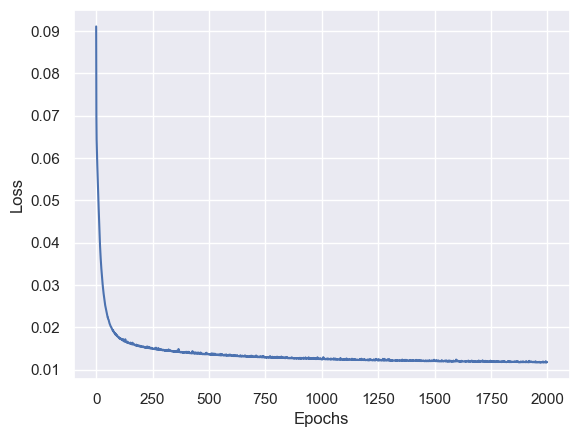

In [41]:
# plota as loss para ver se está treinando
plt.plot(historyAlpha.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

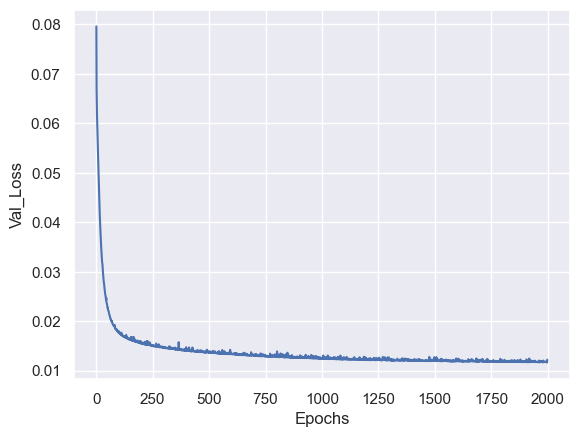

In [42]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyAlpha.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [43]:
#modelAlpha.save('modelosPosRio\\Lamost-LR\\model_alpha-Dwarfs.h5')

In [44]:
predalpha = modelAlpha.predict(X_test)

83/83 [==============================] - 0s 2ms/step


In [45]:
predalpha

array([[0.01519533],
       [0.12519783],
       [0.29819307],
       ...,
       [0.21702662],
       [0.10735603],
       [0.31825277]], dtype=float32)

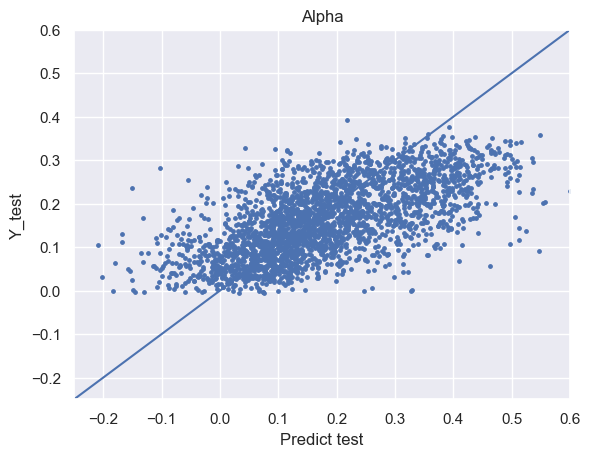

In [46]:
plt.scatter(Y_test[[columnTrain]], predalpha, s=6)
plt.title('Alpha')
plt.xlim(-0.25, 0.6)
plt.ylim(-0.25, 0.6)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [47]:
score = r2_score(Y_test['alpha_m'], predalpha)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 38.0%


In [48]:
Y_test['alpha_predict'] = predalpha

In [49]:
Y_test

,teff,logg,feh,alpha_m,alpha_predict
#ID,,,,,
iDR4_3_STRIPE82-0060_0028242,5672.00,4.076,0.354,-0.075991,0.015195
iDR4_3_STRIPE82-0055_0034049,5552.54,4.279,0.232,0.093870,0.125198
iDR4_3_SPLUS-n01s21_0032518,5538.12,4.175,-0.511,0.431109,0.298193
iDR4_3_STRIPE82-0067_0019215,5790.78,4.275,-0.144,0.023682,0.102879
iDR4_3_STRIPE82-0163_0025997,5989.28,4.367,-0.099,0.074036,0.080703
...,...,...,...,...,...
iDR4_3_STRIPE82-0081_0029460,5937.80,4.282,-0.959,0.089923,0.120516
iDR4_3_STRIPE82-0056_0041293,5747.55,4.200,-0.237,0.117073,0.142880
iDR4_3_SPLUS-n03s27_0036064,5738.17,4.221,-0.309,0.113525,0.217027


In [28]:
Y_test.to_csv("E:\\IC\\PredictsTreinos\\LamostLow\\Dwarfs-AlphaPredict.csv")

# Giants

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from package import encoder

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns; sns.set()

Loaded  9 encoders.


In [2]:
# baseline MLP for mnist dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input, Dense, Lambda, Layer, LeakyReLU, BatchNormalization,Activation
# from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout

import math
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from keras.models import Model
from keras import backend as K

import plotly.express as px

from pympler import muppy, summary

In [14]:
# define baseline model
def baseline_model_teste1():
    # create model
    input_x0 = Input(shape=(66,), name='inp0')

    encoded0 = Dense(200, name='encoded0', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(input_x0)
    a0 = LeakyReLU(alpha=0.01)(encoded0)
    drop0 = Dropout(0.2)(a0)  # 20% dropout

    encoded1 = Dense(300, name='encoded1', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop0)
    a1 = LeakyReLU(alpha=0.01)(encoded1)
    drop1 = Dropout(0.2)(a1)  # 20% dropout

    encoded2 = Dense(500, name='encoded2', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop1)
    a2 = LeakyReLU(alpha=0.01)(encoded2)
    drop2 = Dropout(0.2)(a2)  # 20% dropout

    encoded3 = Dense(300, name='encoded3', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop2)
    a3 = LeakyReLU(alpha=0.01)(encoded3)
    drop3 = Dropout(0.2)(a3)  # 20% dropout

    encoded4 = Dense(100, name='encoded4', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop3)
    a4 = LeakyReLU(alpha=0.01)(encoded4)
    drop4 = Dropout(0.2)(a4)  # 20% dropout

    encoded5 = Dense(50, name='encoded5', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop4)
    a5 = LeakyReLU(alpha=0.01)(encoded5)

    output_y0 = Dense(1, name='oup0', kernel_initializer='he_normal', activation='linear')(a5)
    
    trainable_model = Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return trainable_model

In [15]:
# define baseline model
def baseline_model_teste():
    # create model
    input_x0 = Input(shape=(66,), name='inp0')   
    encoded0 = Dense(200, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(300, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(500, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    encoded3 = Dense(300, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a2)
    a3=LeakyReLU(alpha=0.01)(encoded3)
    encoded4 = Dense(100, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a3)
    a4=LeakyReLU(alpha=0.01)(encoded4)
    encoded5 = Dense(50, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a4)
    a5=LeakyReLU(alpha=0.01)(encoded5)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

In [6]:
GigCores = pd.read_csv("E:\\IC\\BasesTreino\\LamostLow-Colors-Giants.csv", index_col = '#ID')

In [7]:
GigCores

,u-J378,u-J395,u-J410,u-J430,u-g,u-J515,u-r,u-J660,u-i,u-J861,...,J660-i,J660-J861,J660-z,i-J861,i-z,J861-z,teff,logg,feh,alpha_m
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0000500,0.2513,0.3563,1.0903,1.1719,1.5616,1.7442,2.1088,2.1419,2.2596,2.2736,...,0.1177,0.1317,0.1720,0.0140,0.0543,0.0403,5291.84,3.835,-0.227,-9999.000000
iDR4_3_SPLUS-n01s18_0000603,0.3642,0.5236,1.5578,1.8597,2.5292,2.7604,3.4257,3.5218,3.7248,3.8663,...,0.2030,0.3445,0.3926,0.1415,0.1896,0.0481,4381.20,2.320,-0.555,-9999.000000
iDR4_3_SPLUS-n01s18_0000604,0.2426,0.2512,1.0226,1.1265,1.4756,1.6963,2.0367,2.0874,2.2313,2.2695,...,0.1439,0.1821,0.2305,0.0382,0.0866,0.0484,5240.91,3.613,-0.820,-9999.000000
iDR4_3_SPLUS-n01s18_0000934,0.3162,0.4196,1.0522,1.1373,1.5318,1.7147,2.0798,2.1138,2.2370,2.2506,...,0.1232,0.1368,0.1801,0.0136,0.0569,0.0433,5273.48,3.910,-0.355,-9999.000000
iDR4_3_SPLUS-n01s18_0006923,0.2597,0.4839,1.2111,1.3756,1.9039,2.1028,2.5930,2.6558,2.8079,2.8698,...,0.1521,0.2140,0.2549,0.0619,0.1028,0.0409,4993.46,3.536,-0.280,0.266319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0168_0003314,0.0126,0.6312,1.1001,1.1503,1.6262,1.8282,2.1893,2.2041,2.2977,2.4046,...,0.0936,0.2005,0.1360,0.1069,0.0424,-0.0645,5490.53,4.409,0.258,-9999.000000
iDR4_3_STRIPE82-0168_0003403,0.3261,0.4993,0.9149,1.0037,1.3715,1.5653,1.8782,1.9102,2.0364,2.0315,...,0.1262,0.1213,0.1804,-0.0049,0.0542,0.0591,5392.34,4.718,-0.985,-9999.000000
iDR4_3_STRIPE82-0170_0025226,0.2978,0.5663,1.2617,1.4341,1.9231,2.1255,2.5557,2.6163,2.7509,2.8138,...,0.1346,0.1975,0.2317,0.0629,0.0971,0.0342,5121.47,3.707,0.088,-9999.000000


In [5]:
xtrain = GigCores.iloc[:, :66]

In [6]:
columnYtrain =  ['teff', 'logg', 'feh', 'alpha_m']

In [7]:
ytrain = GigCores[columnYtrain]

In [8]:
ytrain['teffEncoded'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['teff']), 'teffLow')

In [9]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [10]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [11]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [12]:
Y_train

,teff,logg,feh,alpha_m,teffEncoded
#ID,,,,,
iDR4_3_SPLUS-n02s20_0002429,4506.64,1.290,-1.283,0.317905,-0.601027
iDR4_3_STRIPE82-0144_0018080,4936.22,2.403,-0.632,0.381561,-0.255189
iDR4_3_SPLUS-n03s18_0002874,4850.95,3.653,-0.366,0.260350,-0.323836
iDR4_3_STRIPE82-0144_0028496,5244.87,3.882,-0.134,0.105892,-0.006706
iDR4_3_STRIPE82-0065_0024293,5625.89,3.876,-0.015,0.057569,0.300039
...,...,...,...,...,...
iDR4_3_STRIPE82-0082_0034482,4943.35,3.455,-0.106,0.161190,-0.249449
iDR4_3_STRIPE82-0146_0020277,4389.81,0.845,-2.491,-9999.000000,-0.695083
iDR4_3_SPLUS-n02s37_0013088,5093.56,3.332,-0.618,0.341307,-0.128520


### Teff

In [19]:
modelTEFF = baseline_model_teste()

In [20]:
columnTrain = 'teffEncoded'

In [21]:
# Training model
historyTEFF = modelTEFF.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
2/2 - 1s - loss: 0.1497 - val_loss: 0.1398 - 694ms/epoch - 347ms/step
Epoch 2/2000
2/2 - 0s - loss: 0.1489 - val_loss: 0.1390 - 260ms/epoch - 130ms/step
Epoch 3/2000
2/2 - 0s - loss: 0.1480 - val_loss: 0.1382 - 44ms/epoch - 22ms/step
Epoch 4/2000
2/2 - 0s - loss: 0.1471 - val_loss: 0.1373 - 41ms/epoch - 20ms/step
Epoch 5/2000
2/2 - 0s - loss: 0.1461 - val_loss: 0.1364 - 43ms/epoch - 22ms/step
Epoch 6/2000
2/2 - 0s - loss: 0.1451 - val_loss: 0.1354 - 38ms/epoch - 19ms/step
Epoch 7/2000
2/2 - 0s - loss: 0.1440 - val_loss: 0.1343 - 38ms/epoch - 19ms/step
Epoch 8/2000
2/2 - 0s - loss: 0.1429 - val_loss: 0.1331 - 40ms/epoch - 20ms/step
Epoch 9/2000
2/2 - 0s - loss: 0.1416 - val_loss: 0.1318 - 40ms/epoch - 20ms/step
Epoch 10/2000
2/2 - 0s - loss: 0.1401 - val_loss: 0.1303 - 38ms/epoch - 19ms/step
Epoch 11/2000
2/2 - 0s - loss: 0.1385 - val_loss: 0.1287 - 40ms/epoch - 20ms/step
Epoch 12/2000
2/2 - 0s - loss: 0.1367 - val_loss: 0.1269 - 40ms/epoch - 20ms/step
Epoch 13/2000
2/2 - 0

Epoch 101/2000
2/2 - 0s - loss: 0.0458 - val_loss: 0.0460 - 52ms/epoch - 26ms/step
Epoch 102/2000
2/2 - 0s - loss: 0.0456 - val_loss: 0.0461 - 50ms/epoch - 25ms/step
Epoch 103/2000
2/2 - 0s - loss: 0.0456 - val_loss: 0.0459 - 53ms/epoch - 27ms/step
Epoch 104/2000
2/2 - 0s - loss: 0.0455 - val_loss: 0.0457 - 51ms/epoch - 26ms/step
Epoch 105/2000
2/2 - 0s - loss: 0.0453 - val_loss: 0.0458 - 54ms/epoch - 27ms/step
Epoch 106/2000
2/2 - 0s - loss: 0.0453 - val_loss: 0.0456 - 53ms/epoch - 26ms/step
Epoch 107/2000
2/2 - 0s - loss: 0.0452 - val_loss: 0.0455 - 49ms/epoch - 25ms/step
Epoch 108/2000
2/2 - 0s - loss: 0.0451 - val_loss: 0.0452 - 49ms/epoch - 24ms/step
Epoch 109/2000
2/2 - 0s - loss: 0.0448 - val_loss: 0.0451 - 47ms/epoch - 24ms/step
Epoch 110/2000
2/2 - 0s - loss: 0.0447 - val_loss: 0.0452 - 47ms/epoch - 24ms/step
Epoch 111/2000
2/2 - 0s - loss: 0.0447 - val_loss: 0.0450 - 50ms/epoch - 25ms/step
Epoch 112/2000
2/2 - 0s - loss: 0.0447 - val_loss: 0.0448 - 49ms/epoch - 25ms/step
Epoc

Epoch 200/2000
2/2 - 0s - loss: 0.0365 - val_loss: 0.0369 - 38ms/epoch - 19ms/step
Epoch 201/2000
2/2 - 0s - loss: 0.0365 - val_loss: 0.0367 - 40ms/epoch - 20ms/step
Epoch 202/2000
2/2 - 0s - loss: 0.0364 - val_loss: 0.0366 - 41ms/epoch - 21ms/step
Epoch 203/2000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0366 - 38ms/epoch - 19ms/step
Epoch 204/2000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0365 - 42ms/epoch - 21ms/step
Epoch 205/2000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0364 - 43ms/epoch - 21ms/step
Epoch 206/2000
2/2 - 0s - loss: 0.0361 - val_loss: 0.0365 - 41ms/epoch - 21ms/step
Epoch 207/2000
2/2 - 0s - loss: 0.0361 - val_loss: 0.0363 - 43ms/epoch - 22ms/step
Epoch 208/2000
2/2 - 0s - loss: 0.0360 - val_loss: 0.0363 - 41ms/epoch - 21ms/step
Epoch 209/2000
2/2 - 0s - loss: 0.0359 - val_loss: 0.0361 - 42ms/epoch - 21ms/step
Epoch 210/2000
2/2 - 0s - loss: 0.0358 - val_loss: 0.0361 - 43ms/epoch - 22ms/step
Epoch 211/2000
2/2 - 0s - loss: 0.0358 - val_loss: 0.0363 - 47ms/epoch - 24ms/step
Epoc

Epoch 299/2000
2/2 - 0s - loss: 0.0307 - val_loss: 0.0314 - 44ms/epoch - 22ms/step
Epoch 300/2000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0310 - 49ms/epoch - 25ms/step
Epoch 301/2000
2/2 - 0s - loss: 0.0307 - val_loss: 0.0309 - 45ms/epoch - 22ms/step
Epoch 302/2000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0309 - 47ms/epoch - 24ms/step
Epoch 303/2000
2/2 - 0s - loss: 0.0305 - val_loss: 0.0308 - 47ms/epoch - 23ms/step
Epoch 304/2000
2/2 - 0s - loss: 0.0305 - val_loss: 0.0309 - 48ms/epoch - 24ms/step
Epoch 305/2000
2/2 - 0s - loss: 0.0304 - val_loss: 0.0307 - 45ms/epoch - 23ms/step
Epoch 306/2000
2/2 - 0s - loss: 0.0304 - val_loss: 0.0307 - 47ms/epoch - 24ms/step
Epoch 307/2000
2/2 - 0s - loss: 0.0303 - val_loss: 0.0307 - 47ms/epoch - 23ms/step
Epoch 308/2000
2/2 - 0s - loss: 0.0303 - val_loss: 0.0306 - 48ms/epoch - 24ms/step
Epoch 309/2000
2/2 - 0s - loss: 0.0302 - val_loss: 0.0306 - 46ms/epoch - 23ms/step
Epoch 310/2000
2/2 - 0s - loss: 0.0302 - val_loss: 0.0305 - 49ms/epoch - 24ms/step
Epoc

Epoch 398/2000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0271 - 54ms/epoch - 27ms/step
Epoch 399/2000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0272 - 51ms/epoch - 26ms/step
Epoch 400/2000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0271 - 54ms/epoch - 27ms/step
Epoch 401/2000
2/2 - 0s - loss: 0.0266 - val_loss: 0.0271 - 55ms/epoch - 27ms/step
Epoch 402/2000
2/2 - 0s - loss: 0.0266 - val_loss: 0.0271 - 55ms/epoch - 27ms/step
Epoch 403/2000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0270 - 54ms/epoch - 27ms/step
Epoch 404/2000
2/2 - 0s - loss: 0.0266 - val_loss: 0.0271 - 56ms/epoch - 28ms/step
Epoch 405/2000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0270 - 54ms/epoch - 27ms/step
Epoch 406/2000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0269 - 53ms/epoch - 27ms/step
Epoch 407/2000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0270 - 58ms/epoch - 29ms/step
Epoch 408/2000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0268 - 53ms/epoch - 27ms/step
Epoch 409/2000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0268 - 54ms/epoch - 27ms/step
Epoc

Epoch 497/2000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0245 - 55ms/epoch - 28ms/step
Epoch 498/2000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0245 - 56ms/epoch - 28ms/step
Epoch 499/2000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0244 - 54ms/epoch - 27ms/step
Epoch 500/2000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0244 - 57ms/epoch - 28ms/step
Epoch 501/2000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0245 - 53ms/epoch - 27ms/step
Epoch 502/2000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0243 - 54ms/epoch - 27ms/step
Epoch 503/2000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0243 - 52ms/epoch - 26ms/step
Epoch 504/2000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0246 - 53ms/epoch - 26ms/step
Epoch 505/2000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0243 - 53ms/epoch - 27ms/step
Epoch 506/2000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0245 - 55ms/epoch - 27ms/step
Epoch 507/2000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0242 - 53ms/epoch - 26ms/step
Epoch 508/2000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0242 - 53ms/epoch - 27ms/step
Epoc

Epoch 596/2000
2/2 - 0s - loss: 0.0219 - val_loss: 0.0226 - 53ms/epoch - 27ms/step
Epoch 597/2000
2/2 - 0s - loss: 0.0219 - val_loss: 0.0225 - 49ms/epoch - 25ms/step
Epoch 598/2000
2/2 - 0s - loss: 0.0219 - val_loss: 0.0225 - 47ms/epoch - 24ms/step
Epoch 599/2000
2/2 - 0s - loss: 0.0219 - val_loss: 0.0224 - 48ms/epoch - 24ms/step
Epoch 600/2000
2/2 - 0s - loss: 0.0218 - val_loss: 0.0224 - 52ms/epoch - 26ms/step
Epoch 601/2000
2/2 - 0s - loss: 0.0218 - val_loss: 0.0225 - 54ms/epoch - 27ms/step
Epoch 602/2000
2/2 - 0s - loss: 0.0218 - val_loss: 0.0224 - 52ms/epoch - 26ms/step
Epoch 603/2000
2/2 - 0s - loss: 0.0218 - val_loss: 0.0224 - 53ms/epoch - 26ms/step
Epoch 604/2000
2/2 - 0s - loss: 0.0217 - val_loss: 0.0226 - 53ms/epoch - 27ms/step
Epoch 605/2000
2/2 - 0s - loss: 0.0218 - val_loss: 0.0224 - 52ms/epoch - 26ms/step
Epoch 606/2000
2/2 - 0s - loss: 0.0217 - val_loss: 0.0224 - 55ms/epoch - 28ms/step
Epoch 607/2000
2/2 - 0s - loss: 0.0218 - val_loss: 0.0224 - 54ms/epoch - 27ms/step
Epoc

Epoch 695/2000
2/2 - 0s - loss: 0.0208 - val_loss: 0.0216 - 52ms/epoch - 26ms/step
Epoch 696/2000
2/2 - 0s - loss: 0.0207 - val_loss: 0.0210 - 53ms/epoch - 27ms/step
Epoch 697/2000
2/2 - 0s - loss: 0.0205 - val_loss: 0.0210 - 53ms/epoch - 27ms/step
Epoch 698/2000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0213 - 54ms/epoch - 27ms/step
Epoch 699/2000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0211 - 54ms/epoch - 27ms/step
Epoch 700/2000
2/2 - 0s - loss: 0.0206 - val_loss: 0.0211 - 53ms/epoch - 26ms/step
Epoch 701/2000
2/2 - 0s - loss: 0.0203 - val_loss: 0.0210 - 54ms/epoch - 27ms/step
Epoch 702/2000
2/2 - 0s - loss: 0.0203 - val_loss: 0.0209 - 54ms/epoch - 27ms/step
Epoch 703/2000
2/2 - 0s - loss: 0.0204 - val_loss: 0.0210 - 55ms/epoch - 28ms/step
Epoch 704/2000
2/2 - 0s - loss: 0.0202 - val_loss: 0.0209 - 54ms/epoch - 27ms/step
Epoch 705/2000
2/2 - 0s - loss: 0.0203 - val_loss: 0.0210 - 54ms/epoch - 27ms/step
Epoch 706/2000
2/2 - 0s - loss: 0.0202 - val_loss: 0.0210 - 54ms/epoch - 27ms/step
Epoc

Epoch 794/2000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0199 - 57ms/epoch - 28ms/step
Epoch 795/2000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0200 - 55ms/epoch - 28ms/step
Epoch 796/2000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0200 - 55ms/epoch - 28ms/step
Epoch 797/2000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0199 - 54ms/epoch - 27ms/step
Epoch 798/2000
2/2 - 0s - loss: 0.0191 - val_loss: 0.0199 - 56ms/epoch - 28ms/step
Epoch 799/2000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0201 - 56ms/epoch - 28ms/step
Epoch 800/2000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0198 - 53ms/epoch - 27ms/step
Epoch 801/2000
2/2 - 0s - loss: 0.0191 - val_loss: 0.0199 - 55ms/epoch - 28ms/step
Epoch 802/2000
2/2 - 0s - loss: 0.0191 - val_loss: 0.0200 - 51ms/epoch - 26ms/step
Epoch 803/2000
2/2 - 0s - loss: 0.0192 - val_loss: 0.0198 - 54ms/epoch - 27ms/step
Epoch 804/2000
2/2 - 0s - loss: 0.0191 - val_loss: 0.0204 - 51ms/epoch - 26ms/step
Epoch 805/2000
2/2 - 0s - loss: 0.0194 - val_loss: 0.0199 - 53ms/epoch - 27ms/step
Epoc

Epoch 893/2000
2/2 - 0s - loss: 0.0183 - val_loss: 0.0190 - 54ms/epoch - 27ms/step
Epoch 894/2000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0191 - 54ms/epoch - 27ms/step
Epoch 895/2000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0190 - 53ms/epoch - 26ms/step
Epoch 896/2000
2/2 - 0s - loss: 0.0183 - val_loss: 0.0191 - 54ms/epoch - 27ms/step
Epoch 897/2000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0190 - 51ms/epoch - 26ms/step
Epoch 898/2000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0190 - 53ms/epoch - 27ms/step
Epoch 899/2000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0191 - 51ms/epoch - 26ms/step
Epoch 900/2000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0190 - 53ms/epoch - 27ms/step
Epoch 901/2000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0190 - 53ms/epoch - 27ms/step
Epoch 902/2000
2/2 - 0s - loss: 0.0181 - val_loss: 0.0192 - 55ms/epoch - 27ms/step
Epoch 903/2000
2/2 - 0s - loss: 0.0182 - val_loss: 0.0190 - 51ms/epoch - 25ms/step
Epoch 904/2000
2/2 - 0s - loss: 0.0183 - val_loss: 0.0192 - 54ms/epoch - 27ms/step
Epoc

Epoch 992/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0185 - 57ms/epoch - 29ms/step
Epoch 993/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0183 - 55ms/epoch - 28ms/step
Epoch 994/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0184 - 54ms/epoch - 27ms/step
Epoch 995/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0183 - 110ms/epoch - 55ms/step
Epoch 996/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0183 - 63ms/epoch - 32ms/step
Epoch 997/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0183 - 72ms/epoch - 36ms/step
Epoch 998/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0185 - 60ms/epoch - 30ms/step
Epoch 999/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0184 - 65ms/epoch - 33ms/step
Epoch 1000/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0183 - 57ms/epoch - 29ms/step
Epoch 1001/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0185 - 74ms/epoch - 37ms/step
Epoch 1002/2000
2/2 - 0s - loss: 0.0174 - val_loss: 0.0183 - 99ms/epoch - 50ms/step
Epoch 1003/2000
2/2 - 0s - loss: 0.0175 - val_loss: 0.0186 - 53ms/epoch - 27ms/step

Epoch 1090/2000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0177 - 55ms/epoch - 28ms/step
Epoch 1091/2000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0178 - 55ms/epoch - 28ms/step
Epoch 1092/2000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0179 - 58ms/epoch - 29ms/step
Epoch 1093/2000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0177 - 55ms/epoch - 28ms/step
Epoch 1094/2000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0180 - 52ms/epoch - 26ms/step
Epoch 1095/2000
2/2 - 0s - loss: 0.0168 - val_loss: 0.0177 - 54ms/epoch - 27ms/step
Epoch 1096/2000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0177 - 54ms/epoch - 27ms/step
Epoch 1097/2000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0177 - 55ms/epoch - 28ms/step
Epoch 1098/2000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0177 - 56ms/epoch - 28ms/step
Epoch 1099/2000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0178 - 54ms/epoch - 27ms/step
Epoch 1100/2000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0177 - 55ms/epoch - 28ms/step
Epoch 1101/2000
2/2 - 0s - loss: 0.0167 - val_loss: 0.0178 - 55ms/epoch - 28

Epoch 1188/2000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0172 - 50ms/epoch - 25ms/step
Epoch 1189/2000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0173 - 50ms/epoch - 25ms/step
Epoch 1190/2000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0172 - 62ms/epoch - 31ms/step
Epoch 1191/2000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0172 - 54ms/epoch - 27ms/step
Epoch 1192/2000
2/2 - 0s - loss: 0.0161 - val_loss: 0.0173 - 68ms/epoch - 34ms/step
Epoch 1193/2000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0172 - 48ms/epoch - 24ms/step
Epoch 1194/2000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0173 - 70ms/epoch - 35ms/step
Epoch 1195/2000
2/2 - 0s - loss: 0.0161 - val_loss: 0.0172 - 52ms/epoch - 26ms/step
Epoch 1196/2000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0171 - 68ms/epoch - 34ms/step
Epoch 1197/2000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0172 - 51ms/epoch - 26ms/step
Epoch 1198/2000
2/2 - 0s - loss: 0.0161 - val_loss: 0.0172 - 49ms/epoch - 25ms/step
Epoch 1199/2000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0172 - 50ms/epoch - 25

Epoch 1286/2000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0170 - 39ms/epoch - 20ms/step
Epoch 1287/2000
2/2 - 0s - loss: 0.0161 - val_loss: 0.0173 - 39ms/epoch - 20ms/step
Epoch 1288/2000
2/2 - 0s - loss: 0.0160 - val_loss: 0.0167 - 43ms/epoch - 22ms/step
Epoch 1289/2000
2/2 - 0s - loss: 0.0158 - val_loss: 0.0168 - 42ms/epoch - 21ms/step
Epoch 1290/2000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0169 - 41ms/epoch - 20ms/step
Epoch 1291/2000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0168 - 43ms/epoch - 21ms/step
Epoch 1292/2000
2/2 - 0s - loss: 0.0158 - val_loss: 0.0173 - 44ms/epoch - 22ms/step
Epoch 1293/2000
2/2 - 0s - loss: 0.0159 - val_loss: 0.0170 - 43ms/epoch - 22ms/step
Epoch 1294/2000
2/2 - 0s - loss: 0.0162 - val_loss: 0.0169 - 43ms/epoch - 21ms/step
Epoch 1295/2000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0169 - 41ms/epoch - 21ms/step
Epoch 1296/2000
2/2 - 0s - loss: 0.0157 - val_loss: 0.0170 - 39ms/epoch - 20ms/step
Epoch 1297/2000
2/2 - 0s - loss: 0.0161 - val_loss: 0.0171 - 42ms/epoch - 21

Epoch 1384/2000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0164 - 46ms/epoch - 23ms/step
Epoch 1385/2000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0165 - 47ms/epoch - 24ms/step
Epoch 1386/2000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0164 - 46ms/epoch - 23ms/step
Epoch 1387/2000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0165 - 47ms/epoch - 23ms/step
Epoch 1388/2000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0164 - 47ms/epoch - 24ms/step
Epoch 1389/2000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0163 - 49ms/epoch - 25ms/step
Epoch 1390/2000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0166 - 49ms/epoch - 25ms/step
Epoch 1391/2000
2/2 - 0s - loss: 0.0153 - val_loss: 0.0163 - 50ms/epoch - 25ms/step
Epoch 1392/2000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0165 - 49ms/epoch - 24ms/step
Epoch 1393/2000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0163 - 49ms/epoch - 25ms/step
Epoch 1394/2000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0164 - 46ms/epoch - 23ms/step
Epoch 1395/2000
2/2 - 0s - loss: 0.0152 - val_loss: 0.0164 - 49ms/epoch - 25

Epoch 1482/2000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0160 - 47ms/epoch - 24ms/step
Epoch 1483/2000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0161 - 46ms/epoch - 23ms/step
Epoch 1484/2000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0161 - 48ms/epoch - 24ms/step
Epoch 1485/2000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0163 - 46ms/epoch - 23ms/step
Epoch 1486/2000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0160 - 49ms/epoch - 24ms/step
Epoch 1487/2000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0160 - 46ms/epoch - 23ms/step
Epoch 1488/2000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0163 - 46ms/epoch - 23ms/step
Epoch 1489/2000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0161 - 48ms/epoch - 24ms/step
Epoch 1490/2000
2/2 - 0s - loss: 0.0151 - val_loss: 0.0161 - 50ms/epoch - 25ms/step
Epoch 1491/2000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0159 - 43ms/epoch - 22ms/step
Epoch 1492/2000
2/2 - 0s - loss: 0.0149 - val_loss: 0.0160 - 47ms/epoch - 24ms/step
Epoch 1493/2000
2/2 - 0s - loss: 0.0148 - val_loss: 0.0162 - 48ms/epoch - 24

Epoch 1580/2000
2/2 - 0s - loss: 0.0144 - val_loss: 0.0160 - 49ms/epoch - 24ms/step
Epoch 1581/2000
2/2 - 0s - loss: 0.0146 - val_loss: 0.0157 - 53ms/epoch - 26ms/step
Epoch 1582/2000
2/2 - 0s - loss: 0.0144 - val_loss: 0.0158 - 52ms/epoch - 26ms/step
Epoch 1583/2000
2/2 - 0s - loss: 0.0145 - val_loss: 0.0157 - 51ms/epoch - 26ms/step
Epoch 1584/2000
2/2 - 0s - loss: 0.0145 - val_loss: 0.0159 - 50ms/epoch - 25ms/step
Epoch 1585/2000
2/2 - 0s - loss: 0.0145 - val_loss: 0.0157 - 48ms/epoch - 24ms/step
Epoch 1586/2000
2/2 - 0s - loss: 0.0145 - val_loss: 0.0158 - 50ms/epoch - 25ms/step
Epoch 1587/2000
2/2 - 0s - loss: 0.0145 - val_loss: 0.0157 - 66ms/epoch - 33ms/step
Epoch 1588/2000
2/2 - 0s - loss: 0.0145 - val_loss: 0.0157 - 64ms/epoch - 32ms/step
Epoch 1589/2000
2/2 - 0s - loss: 0.0144 - val_loss: 0.0159 - 64ms/epoch - 32ms/step
Epoch 1590/2000
2/2 - 0s - loss: 0.0145 - val_loss: 0.0157 - 62ms/epoch - 31ms/step
Epoch 1591/2000
2/2 - 0s - loss: 0.0144 - val_loss: 0.0165 - 62ms/epoch - 31

Epoch 1678/2000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0155 - 53ms/epoch - 26ms/step
Epoch 1679/2000
2/2 - 0s - loss: 0.0141 - val_loss: 0.0154 - 53ms/epoch - 27ms/step
Epoch 1680/2000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0156 - 55ms/epoch - 27ms/step
Epoch 1681/2000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0154 - 54ms/epoch - 27ms/step
Epoch 1682/2000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0155 - 52ms/epoch - 26ms/step
Epoch 1683/2000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0154 - 54ms/epoch - 27ms/step
Epoch 1684/2000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0154 - 54ms/epoch - 27ms/step
Epoch 1685/2000
2/2 - 0s - loss: 0.0141 - val_loss: 0.0157 - 57ms/epoch - 28ms/step
Epoch 1686/2000
2/2 - 0s - loss: 0.0142 - val_loss: 0.0154 - 54ms/epoch - 27ms/step
Epoch 1687/2000
2/2 - 0s - loss: 0.0141 - val_loss: 0.0158 - 50ms/epoch - 25ms/step
Epoch 1688/2000
2/2 - 0s - loss: 0.0143 - val_loss: 0.0154 - 50ms/epoch - 25ms/step
Epoch 1689/2000
2/2 - 0s - loss: 0.0141 - val_loss: 0.0154 - 51ms/epoch - 26

Epoch 1776/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0152 - 53ms/epoch - 26ms/step
Epoch 1777/2000
2/2 - 0s - loss: 0.0139 - val_loss: 0.0152 - 56ms/epoch - 28ms/step
Epoch 1778/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0151 - 62ms/epoch - 31ms/step
Epoch 1779/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0153 - 50ms/epoch - 25ms/step
Epoch 1780/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0151 - 50ms/epoch - 25ms/step
Epoch 1781/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0151 - 52ms/epoch - 26ms/step
Epoch 1782/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0152 - 51ms/epoch - 25ms/step
Epoch 1783/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0151 - 53ms/epoch - 26ms/step
Epoch 1784/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0153 - 49ms/epoch - 25ms/step
Epoch 1785/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0151 - 50ms/epoch - 25ms/step
Epoch 1786/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0153 - 51ms/epoch - 26ms/step
Epoch 1787/2000
2/2 - 0s - loss: 0.0138 - val_loss: 0.0152 - 51ms/epoch - 26

Epoch 1874/2000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0150 - 40ms/epoch - 20ms/step
Epoch 1875/2000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0149 - 40ms/epoch - 20ms/step
Epoch 1876/2000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0149 - 38ms/epoch - 19ms/step
Epoch 1877/2000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0149 - 42ms/epoch - 21ms/step
Epoch 1878/2000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0149 - 41ms/epoch - 21ms/step
Epoch 1879/2000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0149 - 40ms/epoch - 20ms/step
Epoch 1880/2000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0149 - 39ms/epoch - 20ms/step
Epoch 1881/2000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0149 - 39ms/epoch - 19ms/step
Epoch 1882/2000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0150 - 41ms/epoch - 20ms/step
Epoch 1883/2000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0149 - 41ms/epoch - 21ms/step
Epoch 1884/2000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0149 - 40ms/epoch - 20ms/step
Epoch 1885/2000
2/2 - 0s - loss: 0.0135 - val_loss: 0.0149 - 39ms/epoch - 19

Epoch 1972/2000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0147 - 48ms/epoch - 24ms/step
Epoch 1973/2000
2/2 - 0s - loss: 0.0134 - val_loss: 0.0150 - 50ms/epoch - 25ms/step
Epoch 1974/2000
2/2 - 0s - loss: 0.0134 - val_loss: 0.0147 - 51ms/epoch - 26ms/step
Epoch 1975/2000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0147 - 49ms/epoch - 24ms/step
Epoch 1976/2000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0147 - 50ms/epoch - 25ms/step
Epoch 1977/2000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0147 - 52ms/epoch - 26ms/step
Epoch 1978/2000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0148 - 51ms/epoch - 26ms/step
Epoch 1979/2000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0147 - 49ms/epoch - 25ms/step
Epoch 1980/2000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0148 - 54ms/epoch - 27ms/step
Epoch 1981/2000
2/2 - 0s - loss: 0.0133 - val_loss: 0.0148 - 51ms/epoch - 26ms/step
Epoch 1982/2000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0147 - 52ms/epoch - 26ms/step
Epoch 1983/2000
2/2 - 0s - loss: 0.0132 - val_loss: 0.0147 - 52ms/epoch - 26

Text(0, 0.5, 'Loss')

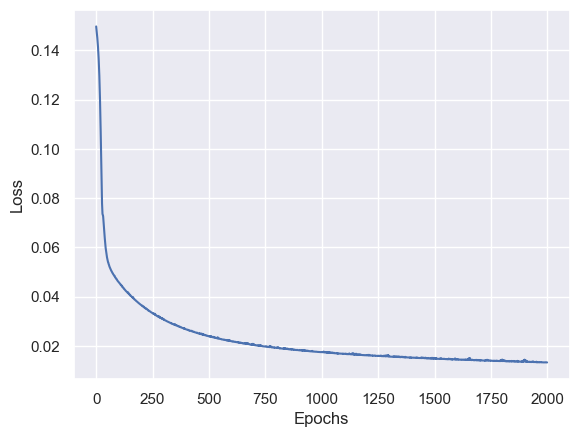

In [22]:
# Verify if is training correctly
plt.plot(historyTEFF.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

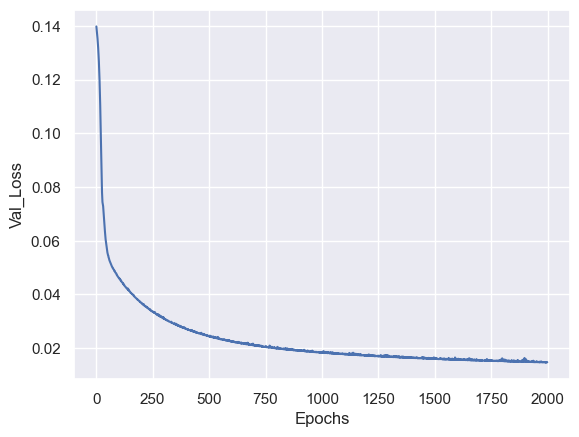

In [23]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyTEFF.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [24]:
#modelTEFF.save('modelosPosRio\\Lamost-LR\\model_TEFF_Giants.h5')

In [25]:
predTeff = modelTEFF.predict(X_test)

31/31 [==============================] - 0s 2ms/step


In [26]:
Y_test

,teff,logg,feh,alpha_m,teffEncoded
#ID,,,,,
iDR4_3_SPLUS-n05n54_0032667,4775.43,2.637,-0.599,0.371583,-0.384635
iDR4_3_SPLUS-n04s41_0024465,5198.62,3.398,-0.936,-9999.000000,-0.043940
iDR4_3_SPLUS-n01s25_0022170,4700.34,2.730,-0.393,0.435255,-0.445087
iDR4_3_SPLUS-n02n26_0030095,5228.83,3.807,-0.548,0.401033,-0.019619
iDR4_3_SPLUS-n01s20_0008860,4830.17,2.783,-0.642,0.532023,-0.340565
...,...,...,...,...,...
iDR4_3_STRIPE82-0054_0031534,4901.52,3.078,-0.512,0.321260,-0.283124
iDR4_3_STRIPE82-0068_0016798,5323.63,3.689,-0.449,0.033229,0.056701
iDR4_3_STRIPE82-0117_0033168,4975.68,2.532,-0.415,-9999.000000,-0.223421


In [27]:
predaux = encoder.decode_DataFrame(predTeff, 'teffLow')
Y_test['TEFF_PredictDecoded'] = predaux

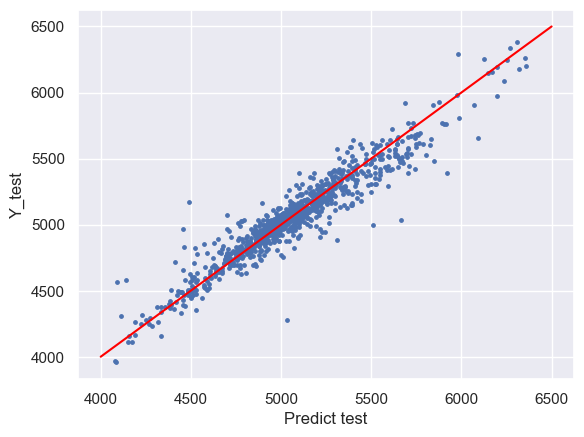

In [31]:
plt.scatter(Y_test['teff'], Y_test['TEFF_PredictDecoded'], s=6)
#plt.xlim(-0.5, 1)
#plt.ylim(-0.5, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([4000, 6500], [4000, 6500], c='red')

In [29]:
score = r2_score(Y_test['teff'], Y_test['TEFF_PredictDecoded'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 90.0%


In [30]:
Y_test

,teff,logg,feh,alpha_m,teffEncoded,TEFF_PredictDecoded
#ID,,,,,,
iDR4_3_SPLUS-n05n54_0032667,4775.43,2.637,-0.599,0.371583,-0.384635,4780.494629
iDR4_3_SPLUS-n04s41_0024465,5198.62,3.398,-0.936,-9999.000000,-0.043940,5268.135742
iDR4_3_SPLUS-n01s25_0022170,4700.34,2.730,-0.393,0.435255,-0.445087,4726.425293
iDR4_3_SPLUS-n02n26_0030095,5228.83,3.807,-0.548,0.401033,-0.019619,5296.531738
iDR4_3_SPLUS-n01s20_0008860,4830.17,2.783,-0.642,0.532023,-0.340565,4877.441406
...,...,...,...,...,...,...
iDR4_3_STRIPE82-0054_0031534,4901.52,3.078,-0.512,0.321260,-0.283124,4920.159180
iDR4_3_STRIPE82-0068_0016798,5323.63,3.689,-0.449,0.033229,0.056701,5418.449219
iDR4_3_STRIPE82-0117_0033168,4975.68,2.532,-0.415,-9999.000000,-0.223421,4810.883789


In [33]:
Y_test.to_csv("E:\\IC\\PredictsTreinos\\LamostLow\\Giants-TeffPredict.csv")

### Logg

In [34]:
modelLOGG = baseline_model_teste()

In [35]:
columnTrain = 'logg'

In [36]:
# Treinando e guardando o modelo
historyLOGG = modelLOGG.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
2/2 - 1s - loss: 10.7623 - val_loss: 11.0983 - 526ms/epoch - 263ms/step
Epoch 2/2000
2/2 - 0s - loss: 10.7505 - val_loss: 11.0876 - 42ms/epoch - 21ms/step
Epoch 3/2000
2/2 - 0s - loss: 10.7397 - val_loss: 11.0750 - 42ms/epoch - 21ms/step
Epoch 4/2000
2/2 - 0s - loss: 10.7273 - val_loss: 11.0623 - 41ms/epoch - 20ms/step
Epoch 5/2000
2/2 - 0s - loss: 10.7147 - val_loss: 11.0479 - 41ms/epoch - 21ms/step
Epoch 6/2000
2/2 - 0s - loss: 10.7003 - val_loss: 11.0319 - 40ms/epoch - 20ms/step
Epoch 7/2000
2/2 - 0s - loss: 10.6844 - val_loss: 11.0129 - 41ms/epoch - 21ms/step
Epoch 8/2000
2/2 - 0s - loss: 10.6653 - val_loss: 10.9898 - 41ms/epoch - 20ms/step
Epoch 9/2000
2/2 - 0s - loss: 10.6422 - val_loss: 10.9620 - 41ms/epoch - 21ms/step
Epoch 10/2000
2/2 - 0s - loss: 10.6143 - val_loss: 10.9284 - 40ms/epoch - 20ms/step
Epoch 11/2000
2/2 - 0s - loss: 10.5807 - val_loss: 10.8884 - 41ms/epoch - 21ms/step
Epoch 12/2000
2/2 - 0s - loss: 10.5406 - val_loss: 10.8409 - 45ms/epoch - 22ms/step

Epoch 101/2000
2/2 - 0s - loss: 0.2183 - val_loss: 0.2394 - 70ms/epoch - 35ms/step
Epoch 102/2000
2/2 - 0s - loss: 0.2155 - val_loss: 0.2380 - 51ms/epoch - 26ms/step
Epoch 103/2000
2/2 - 0s - loss: 0.2130 - val_loss: 0.2353 - 70ms/epoch - 35ms/step
Epoch 104/2000
2/2 - 0s - loss: 0.2101 - val_loss: 0.2318 - 50ms/epoch - 25ms/step
Epoch 105/2000
2/2 - 0s - loss: 0.2074 - val_loss: 0.2288 - 70ms/epoch - 35ms/step
Epoch 106/2000
2/2 - 0s - loss: 0.2051 - val_loss: 0.2266 - 48ms/epoch - 24ms/step
Epoch 107/2000
2/2 - 0s - loss: 0.2030 - val_loss: 0.2251 - 70ms/epoch - 35ms/step
Epoch 108/2000
2/2 - 0s - loss: 0.2011 - val_loss: 0.2238 - 53ms/epoch - 26ms/step
Epoch 109/2000
2/2 - 0s - loss: 0.1992 - val_loss: 0.2223 - 69ms/epoch - 34ms/step
Epoch 110/2000
2/2 - 0s - loss: 0.1975 - val_loss: 0.2207 - 50ms/epoch - 25ms/step
Epoch 111/2000
2/2 - 0s - loss: 0.1959 - val_loss: 0.2193 - 50ms/epoch - 25ms/step
Epoch 112/2000
2/2 - 0s - loss: 0.1943 - val_loss: 0.2177 - 53ms/epoch - 26ms/step
Epoc

Epoch 200/2000
2/2 - 0s - loss: 0.1546 - val_loss: 0.1792 - 52ms/epoch - 26ms/step
Epoch 201/2000
2/2 - 0s - loss: 0.1542 - val_loss: 0.1787 - 51ms/epoch - 25ms/step
Epoch 202/2000
2/2 - 0s - loss: 0.1541 - val_loss: 0.1785 - 57ms/epoch - 28ms/step
Epoch 203/2000
2/2 - 0s - loss: 0.1540 - val_loss: 0.1784 - 55ms/epoch - 27ms/step
Epoch 204/2000
2/2 - 0s - loss: 0.1538 - val_loss: 0.1782 - 65ms/epoch - 33ms/step
Epoch 205/2000
2/2 - 0s - loss: 0.1537 - val_loss: 0.1785 - 57ms/epoch - 29ms/step
Epoch 206/2000
2/2 - 0s - loss: 0.1536 - val_loss: 0.1783 - 57ms/epoch - 28ms/step
Epoch 207/2000
2/2 - 0s - loss: 0.1534 - val_loss: 0.1779 - 52ms/epoch - 26ms/step
Epoch 208/2000
2/2 - 0s - loss: 0.1533 - val_loss: 0.1782 - 50ms/epoch - 25ms/step
Epoch 209/2000
2/2 - 0s - loss: 0.1531 - val_loss: 0.1785 - 52ms/epoch - 26ms/step
Epoch 210/2000
2/2 - 0s - loss: 0.1530 - val_loss: 0.1782 - 52ms/epoch - 26ms/step
Epoch 211/2000
2/2 - 0s - loss: 0.1528 - val_loss: 0.1775 - 53ms/epoch - 26ms/step
Epoc

Epoch 299/2000
2/2 - 0s - loss: 0.1436 - val_loss: 0.1655 - 53ms/epoch - 27ms/step
Epoch 300/2000
2/2 - 0s - loss: 0.1435 - val_loss: 0.1661 - 60ms/epoch - 30ms/step
Epoch 301/2000
2/2 - 0s - loss: 0.1434 - val_loss: 0.1667 - 57ms/epoch - 29ms/step
Epoch 302/2000
2/2 - 0s - loss: 0.1433 - val_loss: 0.1664 - 59ms/epoch - 30ms/step
Epoch 303/2000
2/2 - 0s - loss: 0.1432 - val_loss: 0.1658 - 56ms/epoch - 28ms/step
Epoch 304/2000
2/2 - 0s - loss: 0.1431 - val_loss: 0.1653 - 58ms/epoch - 29ms/step
Epoch 305/2000
2/2 - 0s - loss: 0.1430 - val_loss: 0.1648 - 60ms/epoch - 30ms/step
Epoch 306/2000
2/2 - 0s - loss: 0.1430 - val_loss: 0.1652 - 51ms/epoch - 26ms/step
Epoch 307/2000
2/2 - 0s - loss: 0.1429 - val_loss: 0.1654 - 97ms/epoch - 49ms/step
Epoch 308/2000
2/2 - 0s - loss: 0.1428 - val_loss: 0.1653 - 47ms/epoch - 24ms/step
Epoch 309/2000
2/2 - 0s - loss: 0.1427 - val_loss: 0.1655 - 74ms/epoch - 37ms/step
Epoch 310/2000
2/2 - 0s - loss: 0.1426 - val_loss: 0.1659 - 48ms/epoch - 24ms/step
Epoc

Epoch 398/2000
2/2 - 0s - loss: 0.1361 - val_loss: 0.1597 - 46ms/epoch - 23ms/step
Epoch 399/2000
2/2 - 0s - loss: 0.1369 - val_loss: 0.1597 - 43ms/epoch - 22ms/step
Epoch 400/2000
2/2 - 0s - loss: 0.1367 - val_loss: 0.1562 - 43ms/epoch - 22ms/step
Epoch 401/2000
2/2 - 0s - loss: 0.1361 - val_loss: 0.1552 - 43ms/epoch - 22ms/step
Epoch 402/2000
2/2 - 0s - loss: 0.1363 - val_loss: 0.1564 - 48ms/epoch - 24ms/step
Epoch 403/2000
2/2 - 0s - loss: 0.1358 - val_loss: 0.1591 - 58ms/epoch - 29ms/step
Epoch 404/2000
2/2 - 0s - loss: 0.1364 - val_loss: 0.1585 - 55ms/epoch - 28ms/step
Epoch 405/2000
2/2 - 0s - loss: 0.1360 - val_loss: 0.1554 - 43ms/epoch - 22ms/step
Epoch 406/2000
2/2 - 0s - loss: 0.1357 - val_loss: 0.1543 - 44ms/epoch - 22ms/step
Epoch 407/2000
2/2 - 0s - loss: 0.1369 - val_loss: 0.1555 - 48ms/epoch - 24ms/step
Epoch 408/2000
2/2 - 0s - loss: 0.1356 - val_loss: 0.1599 - 49ms/epoch - 24ms/step
Epoch 409/2000
2/2 - 0s - loss: 0.1366 - val_loss: 0.1581 - 47ms/epoch - 23ms/step
Epoc

Epoch 497/2000
2/2 - 0s - loss: 0.1303 - val_loss: 0.1496 - 45ms/epoch - 22ms/step
Epoch 498/2000
2/2 - 0s - loss: 0.1303 - val_loss: 0.1501 - 45ms/epoch - 23ms/step
Epoch 499/2000
2/2 - 0s - loss: 0.1301 - val_loss: 0.1494 - 46ms/epoch - 23ms/step
Epoch 500/2000
2/2 - 0s - loss: 0.1301 - val_loss: 0.1503 - 43ms/epoch - 22ms/step
Epoch 501/2000
2/2 - 0s - loss: 0.1301 - val_loss: 0.1501 - 45ms/epoch - 23ms/step
Epoch 502/2000
2/2 - 0s - loss: 0.1299 - val_loss: 0.1483 - 48ms/epoch - 24ms/step
Epoch 503/2000
2/2 - 0s - loss: 0.1303 - val_loss: 0.1489 - 48ms/epoch - 24ms/step
Epoch 504/2000
2/2 - 0s - loss: 0.1300 - val_loss: 0.1511 - 47ms/epoch - 23ms/step
Epoch 505/2000
2/2 - 0s - loss: 0.1301 - val_loss: 0.1488 - 47ms/epoch - 24ms/step
Epoch 506/2000
2/2 - 0s - loss: 0.1298 - val_loss: 0.1475 - 47ms/epoch - 24ms/step
Epoch 507/2000
2/2 - 0s - loss: 0.1306 - val_loss: 0.1491 - 52ms/epoch - 26ms/step
Epoch 508/2000
2/2 - 0s - loss: 0.1296 - val_loss: 0.1546 - 58ms/epoch - 29ms/step
Epoc

Epoch 596/2000
2/2 - 0s - loss: 0.1254 - val_loss: 0.1503 - 48ms/epoch - 24ms/step
Epoch 597/2000
2/2 - 0s - loss: 0.1262 - val_loss: 0.1447 - 48ms/epoch - 24ms/step
Epoch 598/2000
2/2 - 0s - loss: 0.1254 - val_loss: 0.1440 - 48ms/epoch - 24ms/step
Epoch 599/2000
2/2 - 0s - loss: 0.1275 - val_loss: 0.1463 - 48ms/epoch - 24ms/step
Epoch 600/2000
2/2 - 0s - loss: 0.1253 - val_loss: 0.1512 - 49ms/epoch - 25ms/step
Epoch 601/2000
2/2 - 0s - loss: 0.1265 - val_loss: 0.1438 - 50ms/epoch - 25ms/step
Epoch 602/2000
2/2 - 0s - loss: 0.1259 - val_loss: 0.1434 - 48ms/epoch - 24ms/step
Epoch 603/2000
2/2 - 0s - loss: 0.1273 - val_loss: 0.1480 - 50ms/epoch - 25ms/step
Epoch 604/2000
2/2 - 0s - loss: 0.1256 - val_loss: 0.1530 - 54ms/epoch - 27ms/step
Epoch 605/2000
2/2 - 0s - loss: 0.1274 - val_loss: 0.1449 - 61ms/epoch - 31ms/step
Epoch 606/2000
2/2 - 0s - loss: 0.1248 - val_loss: 0.1437 - 50ms/epoch - 25ms/step
Epoch 607/2000
2/2 - 0s - loss: 0.1262 - val_loss: 0.1462 - 49ms/epoch - 25ms/step
Epoc

Epoch 695/2000
2/2 - 0s - loss: 0.1208 - val_loss: 0.1449 - 48ms/epoch - 24ms/step
Epoch 696/2000
2/2 - 0s - loss: 0.1206 - val_loss: 0.1422 - 47ms/epoch - 23ms/step
Epoch 697/2000
2/2 - 0s - loss: 0.1209 - val_loss: 0.1418 - 47ms/epoch - 23ms/step
Epoch 698/2000
2/2 - 0s - loss: 0.1212 - val_loss: 0.1438 - 48ms/epoch - 24ms/step
Epoch 699/2000
2/2 - 0s - loss: 0.1205 - val_loss: 0.1453 - 45ms/epoch - 22ms/step
Epoch 700/2000
2/2 - 0s - loss: 0.1206 - val_loss: 0.1427 - 46ms/epoch - 23ms/step
Epoch 701/2000
2/2 - 0s - loss: 0.1204 - val_loss: 0.1417 - 49ms/epoch - 25ms/step
Epoch 702/2000
2/2 - 0s - loss: 0.1208 - val_loss: 0.1439 - 47ms/epoch - 24ms/step
Epoch 703/2000
2/2 - 0s - loss: 0.1203 - val_loss: 0.1461 - 47ms/epoch - 24ms/step
Epoch 704/2000
2/2 - 0s - loss: 0.1207 - val_loss: 0.1428 - 46ms/epoch - 23ms/step
Epoch 705/2000
2/2 - 0s - loss: 0.1204 - val_loss: 0.1426 - 47ms/epoch - 24ms/step
Epoch 706/2000
2/2 - 0s - loss: 0.1204 - val_loss: 0.1450 - 46ms/epoch - 23ms/step
Epoc

Epoch 794/2000
2/2 - 0s - loss: 0.1170 - val_loss: 0.1428 - 51ms/epoch - 26ms/step
Epoch 795/2000
2/2 - 0s - loss: 0.1170 - val_loss: 0.1423 - 55ms/epoch - 28ms/step
Epoch 796/2000
2/2 - 0s - loss: 0.1171 - val_loss: 0.1425 - 53ms/epoch - 27ms/step
Epoch 797/2000
2/2 - 0s - loss: 0.1171 - val_loss: 0.1423 - 53ms/epoch - 27ms/step
Epoch 798/2000
2/2 - 0s - loss: 0.1170 - val_loss: 0.1414 - 54ms/epoch - 27ms/step
Epoch 799/2000
2/2 - 0s - loss: 0.1169 - val_loss: 0.1414 - 53ms/epoch - 27ms/step
Epoch 800/2000
2/2 - 0s - loss: 0.1168 - val_loss: 0.1431 - 53ms/epoch - 27ms/step
Epoch 801/2000
2/2 - 0s - loss: 0.1168 - val_loss: 0.1418 - 53ms/epoch - 26ms/step
Epoch 802/2000
2/2 - 0s - loss: 0.1168 - val_loss: 0.1410 - 54ms/epoch - 27ms/step
Epoch 803/2000
2/2 - 0s - loss: 0.1169 - val_loss: 0.1420 - 52ms/epoch - 26ms/step
Epoch 804/2000
2/2 - 0s - loss: 0.1166 - val_loss: 0.1427 - 53ms/epoch - 27ms/step
Epoch 805/2000
2/2 - 0s - loss: 0.1167 - val_loss: 0.1428 - 52ms/epoch - 26ms/step
Epoc

Epoch 893/2000
2/2 - 0s - loss: 0.1140 - val_loss: 0.1397 - 45ms/epoch - 23ms/step
Epoch 894/2000
2/2 - 0s - loss: 0.1141 - val_loss: 0.1401 - 46ms/epoch - 23ms/step
Epoch 895/2000
2/2 - 0s - loss: 0.1139 - val_loss: 0.1432 - 47ms/epoch - 24ms/step
Epoch 896/2000
2/2 - 0s - loss: 0.1145 - val_loss: 0.1417 - 46ms/epoch - 23ms/step
Epoch 897/2000
2/2 - 0s - loss: 0.1141 - val_loss: 0.1392 - 46ms/epoch - 23ms/step
Epoch 898/2000
2/2 - 0s - loss: 0.1141 - val_loss: 0.1402 - 44ms/epoch - 22ms/step
Epoch 899/2000
2/2 - 0s - loss: 0.1139 - val_loss: 0.1416 - 47ms/epoch - 23ms/step
Epoch 900/2000
2/2 - 0s - loss: 0.1140 - val_loss: 0.1396 - 46ms/epoch - 23ms/step
Epoch 901/2000
2/2 - 0s - loss: 0.1138 - val_loss: 0.1388 - 48ms/epoch - 24ms/step
Epoch 902/2000
2/2 - 0s - loss: 0.1141 - val_loss: 0.1409 - 48ms/epoch - 24ms/step
Epoch 903/2000
2/2 - 0s - loss: 0.1138 - val_loss: 0.1411 - 47ms/epoch - 23ms/step
Epoch 904/2000
2/2 - 0s - loss: 0.1138 - val_loss: 0.1387 - 48ms/epoch - 24ms/step
Epoc

Epoch 992/2000
2/2 - 0s - loss: 0.1121 - val_loss: 0.1405 - 57ms/epoch - 29ms/step
Epoch 993/2000
2/2 - 0s - loss: 0.1117 - val_loss: 0.1410 - 52ms/epoch - 26ms/step
Epoch 994/2000
2/2 - 0s - loss: 0.1116 - val_loss: 0.1380 - 53ms/epoch - 27ms/step
Epoch 995/2000
2/2 - 0s - loss: 0.1118 - val_loss: 0.1392 - 53ms/epoch - 26ms/step
Epoch 996/2000
2/2 - 0s - loss: 0.1113 - val_loss: 0.1413 - 54ms/epoch - 27ms/step
Epoch 997/2000
2/2 - 0s - loss: 0.1116 - val_loss: 0.1386 - 50ms/epoch - 25ms/step
Epoch 998/2000
2/2 - 0s - loss: 0.1114 - val_loss: 0.1391 - 56ms/epoch - 28ms/step
Epoch 999/2000
2/2 - 0s - loss: 0.1114 - val_loss: 0.1402 - 53ms/epoch - 27ms/step
Epoch 1000/2000
2/2 - 0s - loss: 0.1113 - val_loss: 0.1382 - 53ms/epoch - 27ms/step
Epoch 1001/2000
2/2 - 0s - loss: 0.1114 - val_loss: 0.1393 - 52ms/epoch - 26ms/step
Epoch 1002/2000
2/2 - 0s - loss: 0.1112 - val_loss: 0.1400 - 54ms/epoch - 27ms/step
Epoch 1003/2000
2/2 - 0s - loss: 0.1112 - val_loss: 0.1382 - 52ms/epoch - 26ms/step


Epoch 1090/2000
2/2 - 0s - loss: 0.1094 - val_loss: 0.1428 - 60ms/epoch - 30ms/step
Epoch 1091/2000
2/2 - 0s - loss: 0.1105 - val_loss: 0.1384 - 46ms/epoch - 23ms/step
Epoch 1092/2000
2/2 - 0s - loss: 0.1093 - val_loss: 0.1367 - 48ms/epoch - 24ms/step
Epoch 1093/2000
2/2 - 0s - loss: 0.1106 - val_loss: 0.1399 - 51ms/epoch - 25ms/step
Epoch 1094/2000
2/2 - 0s - loss: 0.1095 - val_loss: 0.1417 - 48ms/epoch - 24ms/step
Epoch 1095/2000
2/2 - 0s - loss: 0.1099 - val_loss: 0.1379 - 55ms/epoch - 28ms/step
Epoch 1096/2000
2/2 - 0s - loss: 0.1095 - val_loss: 0.1396 - 53ms/epoch - 27ms/step
Epoch 1097/2000
2/2 - 0s - loss: 0.1093 - val_loss: 0.1425 - 55ms/epoch - 27ms/step
Epoch 1098/2000
2/2 - 0s - loss: 0.1099 - val_loss: 0.1379 - 52ms/epoch - 26ms/step
Epoch 1099/2000
2/2 - 0s - loss: 0.1097 - val_loss: 0.1385 - 57ms/epoch - 28ms/step
Epoch 1100/2000
2/2 - 0s - loss: 0.1093 - val_loss: 0.1409 - 54ms/epoch - 27ms/step
Epoch 1101/2000
2/2 - 0s - loss: 0.1094 - val_loss: 0.1379 - 53ms/epoch - 27

Epoch 1188/2000
2/2 - 0s - loss: 0.1080 - val_loss: 0.1406 - 45ms/epoch - 23ms/step
Epoch 1189/2000
2/2 - 0s - loss: 0.1081 - val_loss: 0.1379 - 46ms/epoch - 23ms/step
Epoch 1190/2000
2/2 - 0s - loss: 0.1074 - val_loss: 0.1365 - 49ms/epoch - 24ms/step
Epoch 1191/2000
2/2 - 0s - loss: 0.1084 - val_loss: 0.1413 - 46ms/epoch - 23ms/step
Epoch 1192/2000
2/2 - 0s - loss: 0.1082 - val_loss: 0.1405 - 50ms/epoch - 25ms/step
Epoch 1193/2000
2/2 - 0s - loss: 0.1079 - val_loss: 0.1369 - 45ms/epoch - 22ms/step
Epoch 1194/2000
2/2 - 0s - loss: 0.1079 - val_loss: 0.1399 - 47ms/epoch - 24ms/step
Epoch 1195/2000
2/2 - 0s - loss: 0.1077 - val_loss: 0.1375 - 46ms/epoch - 23ms/step
Epoch 1196/2000
2/2 - 0s - loss: 0.1077 - val_loss: 0.1367 - 48ms/epoch - 24ms/step
Epoch 1197/2000
2/2 - 0s - loss: 0.1079 - val_loss: 0.1406 - 48ms/epoch - 24ms/step
Epoch 1198/2000
2/2 - 0s - loss: 0.1077 - val_loss: 0.1370 - 49ms/epoch - 25ms/step
Epoch 1199/2000
2/2 - 0s - loss: 0.1078 - val_loss: 0.1374 - 48ms/epoch - 24

Epoch 1286/2000
2/2 - 0s - loss: 0.1057 - val_loss: 0.1399 - 39ms/epoch - 20ms/step
Epoch 1287/2000
2/2 - 0s - loss: 0.1058 - val_loss: 0.1362 - 46ms/epoch - 23ms/step
Epoch 1288/2000
2/2 - 0s - loss: 0.1063 - val_loss: 0.1369 - 43ms/epoch - 22ms/step
Epoch 1289/2000
2/2 - 0s - loss: 0.1056 - val_loss: 0.1399 - 45ms/epoch - 22ms/step
Epoch 1290/2000
2/2 - 0s - loss: 0.1059 - val_loss: 0.1357 - 41ms/epoch - 21ms/step
Epoch 1291/2000
2/2 - 0s - loss: 0.1065 - val_loss: 0.1359 - 42ms/epoch - 21ms/step
Epoch 1292/2000
2/2 - 0s - loss: 0.1060 - val_loss: 0.1413 - 40ms/epoch - 20ms/step
Epoch 1293/2000
2/2 - 0s - loss: 0.1067 - val_loss: 0.1368 - 42ms/epoch - 21ms/step
Epoch 1294/2000
2/2 - 0s - loss: 0.1058 - val_loss: 0.1369 - 47ms/epoch - 23ms/step
Epoch 1295/2000
2/2 - 0s - loss: 0.1056 - val_loss: 0.1399 - 43ms/epoch - 22ms/step
Epoch 1296/2000
2/2 - 0s - loss: 0.1058 - val_loss: 0.1369 - 43ms/epoch - 21ms/step
Epoch 1297/2000
2/2 - 0s - loss: 0.1056 - val_loss: 0.1392 - 42ms/epoch - 21

Epoch 1384/2000
2/2 - 0s - loss: 0.1042 - val_loss: 0.1395 - 45ms/epoch - 23ms/step
Epoch 1385/2000
2/2 - 0s - loss: 0.1039 - val_loss: 0.1407 - 45ms/epoch - 23ms/step
Epoch 1386/2000
2/2 - 0s - loss: 0.1043 - val_loss: 0.1371 - 43ms/epoch - 21ms/step
Epoch 1387/2000
2/2 - 0s - loss: 0.1048 - val_loss: 0.1388 - 44ms/epoch - 22ms/step
Epoch 1388/2000
2/2 - 0s - loss: 0.1040 - val_loss: 0.1388 - 45ms/epoch - 23ms/step
Epoch 1389/2000
2/2 - 0s - loss: 0.1036 - val_loss: 0.1363 - 50ms/epoch - 25ms/step
Epoch 1390/2000
2/2 - 0s - loss: 0.1048 - val_loss: 0.1388 - 48ms/epoch - 24ms/step
Epoch 1391/2000
2/2 - 0s - loss: 0.1038 - val_loss: 0.1400 - 49ms/epoch - 25ms/step
Epoch 1392/2000
2/2 - 0s - loss: 0.1042 - val_loss: 0.1368 - 50ms/epoch - 25ms/step
Epoch 1393/2000
2/2 - 0s - loss: 0.1037 - val_loss: 0.1379 - 50ms/epoch - 25ms/step
Epoch 1394/2000
2/2 - 0s - loss: 0.1036 - val_loss: 0.1394 - 51ms/epoch - 26ms/step
Epoch 1395/2000
2/2 - 0s - loss: 0.1039 - val_loss: 0.1370 - 51ms/epoch - 25

Epoch 1482/2000
2/2 - 0s - loss: 0.1022 - val_loss: 0.1376 - 48ms/epoch - 24ms/step
Epoch 1483/2000
2/2 - 0s - loss: 0.1021 - val_loss: 0.1390 - 50ms/epoch - 25ms/step
Epoch 1484/2000
2/2 - 0s - loss: 0.1022 - val_loss: 0.1363 - 49ms/epoch - 25ms/step
Epoch 1485/2000
2/2 - 0s - loss: 0.1021 - val_loss: 0.1369 - 49ms/epoch - 25ms/step
Epoch 1486/2000
2/2 - 0s - loss: 0.1020 - val_loss: 0.1370 - 49ms/epoch - 25ms/step
Epoch 1487/2000
2/2 - 0s - loss: 0.1019 - val_loss: 0.1375 - 46ms/epoch - 23ms/step
Epoch 1488/2000
2/2 - 0s - loss: 0.1019 - val_loss: 0.1375 - 49ms/epoch - 25ms/step
Epoch 1489/2000
2/2 - 0s - loss: 0.1019 - val_loss: 0.1363 - 50ms/epoch - 25ms/step
Epoch 1490/2000
2/2 - 0s - loss: 0.1020 - val_loss: 0.1368 - 49ms/epoch - 25ms/step
Epoch 1491/2000
2/2 - 0s - loss: 0.1019 - val_loss: 0.1380 - 53ms/epoch - 26ms/step
Epoch 1492/2000
2/2 - 0s - loss: 0.1019 - val_loss: 0.1373 - 54ms/epoch - 27ms/step
Epoch 1493/2000
2/2 - 0s - loss: 0.1019 - val_loss: 0.1364 - 57ms/epoch - 29

Epoch 1580/2000
2/2 - 0s - loss: 0.1020 - val_loss: 0.1363 - 46ms/epoch - 23ms/step
Epoch 1581/2000
2/2 - 0s - loss: 0.1007 - val_loss: 0.1391 - 69ms/epoch - 35ms/step
Epoch 1582/2000
2/2 - 0s - loss: 0.1007 - val_loss: 0.1363 - 46ms/epoch - 23ms/step
Epoch 1583/2000
2/2 - 0s - loss: 0.1008 - val_loss: 0.1355 - 50ms/epoch - 25ms/step
Epoch 1584/2000
2/2 - 0s - loss: 0.1010 - val_loss: 0.1388 - 46ms/epoch - 23ms/step
Epoch 1585/2000
2/2 - 0s - loss: 0.1007 - val_loss: 0.1348 - 46ms/epoch - 23ms/step
Epoch 1586/2000
2/2 - 0s - loss: 0.1010 - val_loss: 0.1359 - 49ms/epoch - 24ms/step
Epoch 1587/2000
2/2 - 0s - loss: 0.1002 - val_loss: 0.1397 - 57ms/epoch - 28ms/step
Epoch 1588/2000
2/2 - 0s - loss: 0.1010 - val_loss: 0.1362 - 49ms/epoch - 25ms/step
Epoch 1589/2000
2/2 - 0s - loss: 0.1007 - val_loss: 0.1374 - 46ms/epoch - 23ms/step
Epoch 1590/2000
2/2 - 0s - loss: 0.1003 - val_loss: 0.1384 - 47ms/epoch - 23ms/step
Epoch 1591/2000
2/2 - 0s - loss: 0.1004 - val_loss: 0.1352 - 49ms/epoch - 24

Epoch 1678/2000
2/2 - 0s - loss: 0.0988 - val_loss: 0.1358 - 49ms/epoch - 25ms/step
Epoch 1679/2000
2/2 - 0s - loss: 0.0994 - val_loss: 0.1376 - 51ms/epoch - 25ms/step
Epoch 1680/2000
2/2 - 0s - loss: 0.0989 - val_loss: 0.1363 - 50ms/epoch - 25ms/step
Epoch 1681/2000
2/2 - 0s - loss: 0.0989 - val_loss: 0.1363 - 48ms/epoch - 24ms/step
Epoch 1682/2000
2/2 - 0s - loss: 0.0988 - val_loss: 0.1412 - 47ms/epoch - 24ms/step
Epoch 1683/2000
2/2 - 0s - loss: 0.0999 - val_loss: 0.1356 - 53ms/epoch - 27ms/step
Epoch 1684/2000
2/2 - 0s - loss: 0.0996 - val_loss: 0.1370 - 54ms/epoch - 27ms/step
Epoch 1685/2000
2/2 - 0s - loss: 0.0987 - val_loss: 0.1398 - 53ms/epoch - 27ms/step
Epoch 1686/2000
2/2 - 0s - loss: 0.0991 - val_loss: 0.1358 - 52ms/epoch - 26ms/step
Epoch 1687/2000
2/2 - 0s - loss: 0.0990 - val_loss: 0.1380 - 48ms/epoch - 24ms/step
Epoch 1688/2000
2/2 - 0s - loss: 0.0987 - val_loss: 0.1371 - 55ms/epoch - 28ms/step
Epoch 1689/2000
2/2 - 0s - loss: 0.0986 - val_loss: 0.1355 - 53ms/epoch - 27

Epoch 1776/2000
2/2 - 0s - loss: 0.0972 - val_loss: 0.1370 - 49ms/epoch - 25ms/step
Epoch 1777/2000
2/2 - 0s - loss: 0.0973 - val_loss: 0.1390 - 51ms/epoch - 25ms/step
Epoch 1778/2000
2/2 - 0s - loss: 0.0974 - val_loss: 0.1364 - 48ms/epoch - 24ms/step
Epoch 1779/2000
2/2 - 0s - loss: 0.0974 - val_loss: 0.1375 - 48ms/epoch - 24ms/step
Epoch 1780/2000
2/2 - 0s - loss: 0.0975 - val_loss: 0.1366 - 51ms/epoch - 26ms/step
Epoch 1781/2000
2/2 - 0s - loss: 0.0973 - val_loss: 0.1351 - 56ms/epoch - 28ms/step
Epoch 1782/2000
2/2 - 0s - loss: 0.0981 - val_loss: 0.1407 - 74ms/epoch - 37ms/step
Epoch 1783/2000
2/2 - 0s - loss: 0.0982 - val_loss: 0.1354 - 54ms/epoch - 27ms/step
Epoch 1784/2000
2/2 - 0s - loss: 0.0987 - val_loss: 0.1382 - 70ms/epoch - 35ms/step
Epoch 1785/2000
2/2 - 0s - loss: 0.0979 - val_loss: 0.1379 - 48ms/epoch - 24ms/step
Epoch 1786/2000
2/2 - 0s - loss: 0.0976 - val_loss: 0.1353 - 70ms/epoch - 35ms/step
Epoch 1787/2000
2/2 - 0s - loss: 0.0977 - val_loss: 0.1412 - 48ms/epoch - 24

Epoch 1874/2000
2/2 - 0s - loss: 0.0964 - val_loss: 0.1372 - 51ms/epoch - 26ms/step
Epoch 1875/2000
2/2 - 0s - loss: 0.0959 - val_loss: 0.1357 - 53ms/epoch - 26ms/step
Epoch 1876/2000
2/2 - 0s - loss: 0.0959 - val_loss: 0.1376 - 50ms/epoch - 25ms/step
Epoch 1877/2000
2/2 - 0s - loss: 0.0959 - val_loss: 0.1372 - 51ms/epoch - 26ms/step
Epoch 1878/2000
2/2 - 0s - loss: 0.0959 - val_loss: 0.1360 - 55ms/epoch - 27ms/step
Epoch 1879/2000
2/2 - 0s - loss: 0.0961 - val_loss: 0.1400 - 55ms/epoch - 27ms/step
Epoch 1880/2000
2/2 - 0s - loss: 0.0964 - val_loss: 0.1382 - 49ms/epoch - 25ms/step
Epoch 1881/2000
2/2 - 0s - loss: 0.0961 - val_loss: 0.1374 - 53ms/epoch - 26ms/step
Epoch 1882/2000
2/2 - 0s - loss: 0.0961 - val_loss: 0.1392 - 54ms/epoch - 27ms/step
Epoch 1883/2000
2/2 - 0s - loss: 0.0959 - val_loss: 0.1362 - 53ms/epoch - 27ms/step
Epoch 1884/2000
2/2 - 0s - loss: 0.0960 - val_loss: 0.1372 - 51ms/epoch - 26ms/step
Epoch 1885/2000
2/2 - 0s - loss: 0.0958 - val_loss: 0.1366 - 52ms/epoch - 26

Epoch 1972/2000
2/2 - 0s - loss: 0.0947 - val_loss: 0.1382 - 48ms/epoch - 24ms/step
Epoch 1973/2000
2/2 - 0s - loss: 0.0943 - val_loss: 0.1392 - 50ms/epoch - 25ms/step
Epoch 1974/2000
2/2 - 0s - loss: 0.0944 - val_loss: 0.1391 - 52ms/epoch - 26ms/step
Epoch 1975/2000
2/2 - 0s - loss: 0.0944 - val_loss: 0.1370 - 49ms/epoch - 25ms/step
Epoch 1976/2000
2/2 - 0s - loss: 0.0948 - val_loss: 0.1399 - 52ms/epoch - 26ms/step
Epoch 1977/2000
2/2 - 0s - loss: 0.0947 - val_loss: 0.1368 - 53ms/epoch - 26ms/step
Epoch 1978/2000
2/2 - 0s - loss: 0.0943 - val_loss: 0.1359 - 48ms/epoch - 24ms/step
Epoch 1979/2000
2/2 - 0s - loss: 0.0958 - val_loss: 0.1392 - 51ms/epoch - 25ms/step
Epoch 1980/2000
2/2 - 0s - loss: 0.0945 - val_loss: 0.1372 - 52ms/epoch - 26ms/step
Epoch 1981/2000
2/2 - 0s - loss: 0.0946 - val_loss: 0.1405 - 64ms/epoch - 32ms/step
Epoch 1982/2000
2/2 - 0s - loss: 0.0948 - val_loss: 0.1375 - 54ms/epoch - 27ms/step
Epoch 1983/2000
2/2 - 0s - loss: 0.0945 - val_loss: 0.1380 - 76ms/epoch - 38

Text(0, 0.5, 'Loss')

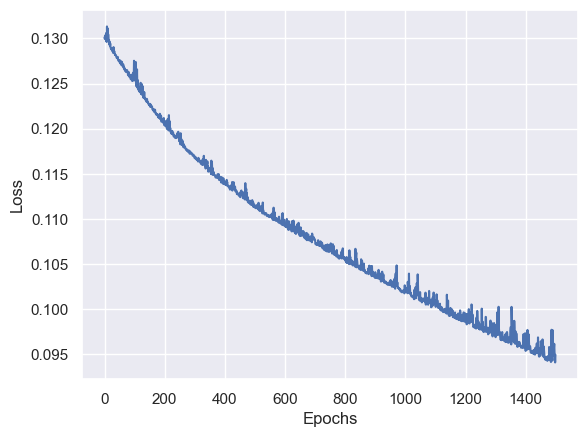

In [37]:
# plota as loss para ver se está treinando
plt.plot(historyLOGG.history['loss'][500:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

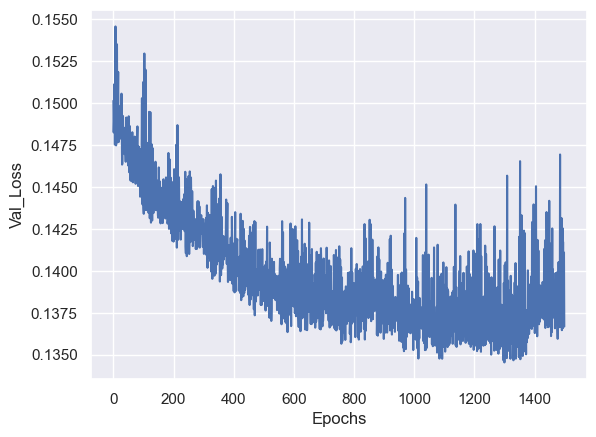

In [38]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyLOGG.history['val_loss'][500:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [44]:
#modelLOGG.save('modelosPosRio\\Lamost-LR\\model_LOGG_Giants.h5')

In [40]:
predlogg = modelLOGG.predict(X_test)

31/31 [==============================] - 0s 2ms/step


In [35]:
plt.scatter(Y_test[[columnTrain]], predlogg, s=6)
plt.title('logg')
#plt.xlim(3.8, 4.8)
#plt.ylim(3.8, 4.8)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([0, 5], [0, 5], c='red')

plt.grid(True)

NameError: name 'predlogg' is not defined

In [45]:
score = r2_score(Y_test['logg'], predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 85.0%


In [46]:
Y_test['LOGG_Predict'] = predlogg

In [47]:
Y_test

,teff,logg,feh,alpha_m,teffEncoded,TEFF_PredictDecoded,LOGG_Predict
#ID,,,,,,,
iDR4_3_SPLUS-n05n54_0032667,4775.43,2.637,-0.599,0.371583,-0.384635,4780.494629,2.775506
iDR4_3_SPLUS-n04s41_0024465,5198.62,3.398,-0.936,-9999.000000,-0.043940,5268.135742,3.665362
iDR4_3_SPLUS-n01s25_0022170,4700.34,2.730,-0.393,0.435255,-0.445087,4726.425293,2.573372
iDR4_3_SPLUS-n02n26_0030095,5228.83,3.807,-0.548,0.401033,-0.019619,5296.531738,3.807103
iDR4_3_SPLUS-n01s20_0008860,4830.17,2.783,-0.642,0.532023,-0.340565,4877.441406,2.707033
...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0054_0031534,4901.52,3.078,-0.512,0.321260,-0.283124,4920.159180,3.319226
iDR4_3_STRIPE82-0068_0016798,5323.63,3.689,-0.449,0.033229,0.056701,5418.449219,3.837461
iDR4_3_STRIPE82-0117_0033168,4975.68,2.532,-0.415,-9999.000000,-0.223421,4810.883789,2.235592


In [48]:
Y_test.to_csv("E:\\IC\\PredictsTreinos\\LamostLow\\Giants-LoggPredict.csv")

### FEH

In [49]:
modelFEH = baseline_model_teste()

In [50]:
columnTrain = 'feh'

In [51]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyFEH = modelFEH.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
2/2 - 1s - loss: 0.6168 - val_loss: 0.5845 - 647ms/epoch - 323ms/step
Epoch 2/2000
2/2 - 0s - loss: 0.6126 - val_loss: 0.5815 - 198ms/epoch - 99ms/step
Epoch 3/2000
2/2 - 0s - loss: 0.6095 - val_loss: 0.5787 - 174ms/epoch - 87ms/step
Epoch 4/2000
2/2 - 0s - loss: 0.6066 - val_loss: 0.5758 - 42ms/epoch - 21ms/step
Epoch 5/2000
2/2 - 0s - loss: 0.6036 - val_loss: 0.5727 - 39ms/epoch - 20ms/step
Epoch 6/2000
2/2 - 0s - loss: 0.6003 - val_loss: 0.5691 - 40ms/epoch - 20ms/step
Epoch 7/2000
2/2 - 0s - loss: 0.5965 - val_loss: 0.5650 - 39ms/epoch - 20ms/step
Epoch 8/2000
2/2 - 0s - loss: 0.5923 - val_loss: 0.5605 - 41ms/epoch - 21ms/step
Epoch 9/2000
2/2 - 0s - loss: 0.5875 - val_loss: 0.5552 - 39ms/epoch - 20ms/step
Epoch 10/2000
2/2 - 0s - loss: 0.5820 - val_loss: 0.5491 - 39ms/epoch - 20ms/step
Epoch 11/2000
2/2 - 0s - loss: 0.5756 - val_loss: 0.5421 - 41ms/epoch - 21ms/step
Epoch 12/2000
2/2 - 0s - loss: 0.5682 - val_loss: 0.5340 - 41ms/epoch - 21ms/step
Epoch 13/2000
2/2 - 0

Epoch 101/2000
2/2 - 0s - loss: 0.0908 - val_loss: 0.0864 - 47ms/epoch - 24ms/step
Epoch 102/2000
2/2 - 0s - loss: 0.0904 - val_loss: 0.0863 - 47ms/epoch - 24ms/step
Epoch 103/2000
2/2 - 0s - loss: 0.0901 - val_loss: 0.0864 - 46ms/epoch - 23ms/step
Epoch 104/2000
2/2 - 0s - loss: 0.0898 - val_loss: 0.0852 - 47ms/epoch - 24ms/step
Epoch 105/2000
2/2 - 0s - loss: 0.0894 - val_loss: 0.0850 - 47ms/epoch - 24ms/step
Epoch 106/2000
2/2 - 0s - loss: 0.0894 - val_loss: 0.0847 - 47ms/epoch - 24ms/step
Epoch 107/2000
2/2 - 0s - loss: 0.0886 - val_loss: 0.0847 - 48ms/epoch - 24ms/step
Epoch 108/2000
2/2 - 0s - loss: 0.0884 - val_loss: 0.0838 - 48ms/epoch - 24ms/step
Epoch 109/2000
2/2 - 0s - loss: 0.0881 - val_loss: 0.0835 - 55ms/epoch - 28ms/step
Epoch 110/2000
2/2 - 0s - loss: 0.0879 - val_loss: 0.0837 - 48ms/epoch - 24ms/step
Epoch 111/2000
2/2 - 0s - loss: 0.0875 - val_loss: 0.0840 - 50ms/epoch - 25ms/step
Epoch 112/2000
2/2 - 0s - loss: 0.0875 - val_loss: 0.0828 - 49ms/epoch - 25ms/step
Epoc

Epoch 200/2000
2/2 - 0s - loss: 0.0710 - val_loss: 0.0715 - 44ms/epoch - 22ms/step
Epoch 201/2000
2/2 - 0s - loss: 0.0720 - val_loss: 0.0685 - 50ms/epoch - 25ms/step
Epoch 202/2000
2/2 - 0s - loss: 0.0711 - val_loss: 0.0686 - 54ms/epoch - 27ms/step
Epoch 203/2000
2/2 - 0s - loss: 0.0710 - val_loss: 0.0708 - 49ms/epoch - 25ms/step
Epoch 204/2000
2/2 - 0s - loss: 0.0714 - val_loss: 0.0693 - 53ms/epoch - 27ms/step
Epoch 205/2000
2/2 - 0s - loss: 0.0704 - val_loss: 0.0686 - 61ms/epoch - 31ms/step
Epoch 206/2000
2/2 - 0s - loss: 0.0714 - val_loss: 0.0685 - 47ms/epoch - 24ms/step
Epoch 207/2000
2/2 - 0s - loss: 0.0703 - val_loss: 0.0701 - 45ms/epoch - 23ms/step
Epoch 208/2000
2/2 - 0s - loss: 0.0707 - val_loss: 0.0679 - 45ms/epoch - 23ms/step
Epoch 209/2000
2/2 - 0s - loss: 0.0701 - val_loss: 0.0680 - 45ms/epoch - 23ms/step
Epoch 210/2000
2/2 - 0s - loss: 0.0701 - val_loss: 0.0692 - 46ms/epoch - 23ms/step
Epoch 211/2000
2/2 - 0s - loss: 0.0701 - val_loss: 0.0685 - 45ms/epoch - 23ms/step
Epoc

Epoch 299/2000
2/2 - 0s - loss: 0.0625 - val_loss: 0.0651 - 55ms/epoch - 28ms/step
Epoch 300/2000
2/2 - 0s - loss: 0.0625 - val_loss: 0.0655 - 53ms/epoch - 27ms/step
Epoch 301/2000
2/2 - 0s - loss: 0.0625 - val_loss: 0.0651 - 55ms/epoch - 28ms/step
Epoch 302/2000
2/2 - 0s - loss: 0.0624 - val_loss: 0.0653 - 54ms/epoch - 27ms/step
Epoch 303/2000
2/2 - 0s - loss: 0.0623 - val_loss: 0.0659 - 54ms/epoch - 27ms/step
Epoch 304/2000
2/2 - 0s - loss: 0.0624 - val_loss: 0.0646 - 55ms/epoch - 28ms/step
Epoch 305/2000
2/2 - 0s - loss: 0.0621 - val_loss: 0.0643 - 55ms/epoch - 28ms/step
Epoch 306/2000
2/2 - 0s - loss: 0.0622 - val_loss: 0.0646 - 55ms/epoch - 28ms/step
Epoch 307/2000
2/2 - 0s - loss: 0.0621 - val_loss: 0.0645 - 56ms/epoch - 28ms/step
Epoch 308/2000
2/2 - 0s - loss: 0.0621 - val_loss: 0.0648 - 51ms/epoch - 26ms/step
Epoch 309/2000
2/2 - 0s - loss: 0.0619 - val_loss: 0.0653 - 50ms/epoch - 25ms/step
Epoch 310/2000
2/2 - 0s - loss: 0.0619 - val_loss: 0.0653 - 54ms/epoch - 27ms/step
Epoc

Epoch 398/2000
2/2 - 0s - loss: 0.0573 - val_loss: 0.0641 - 54ms/epoch - 27ms/step
Epoch 399/2000
2/2 - 0s - loss: 0.0573 - val_loss: 0.0647 - 56ms/epoch - 28ms/step
Epoch 400/2000
2/2 - 0s - loss: 0.0575 - val_loss: 0.0639 - 51ms/epoch - 25ms/step
Epoch 401/2000
2/2 - 0s - loss: 0.0572 - val_loss: 0.0642 - 57ms/epoch - 28ms/step
Epoch 402/2000
2/2 - 0s - loss: 0.0570 - val_loss: 0.0639 - 52ms/epoch - 26ms/step
Epoch 403/2000
2/2 - 0s - loss: 0.0571 - val_loss: 0.0640 - 54ms/epoch - 27ms/step
Epoch 404/2000
2/2 - 0s - loss: 0.0570 - val_loss: 0.0636 - 58ms/epoch - 29ms/step
Epoch 405/2000
2/2 - 0s - loss: 0.0568 - val_loss: 0.0638 - 55ms/epoch - 28ms/step
Epoch 406/2000
2/2 - 0s - loss: 0.0569 - val_loss: 0.0637 - 54ms/epoch - 27ms/step
Epoch 407/2000
2/2 - 0s - loss: 0.0568 - val_loss: 0.0632 - 55ms/epoch - 28ms/step
Epoch 408/2000
2/2 - 0s - loss: 0.0571 - val_loss: 0.0660 - 55ms/epoch - 28ms/step
Epoch 409/2000
2/2 - 0s - loss: 0.0579 - val_loss: 0.0640 - 54ms/epoch - 27ms/step
Epoc

Epoch 497/2000
2/2 - 0s - loss: 0.0535 - val_loss: 0.0646 - 53ms/epoch - 26ms/step
Epoch 498/2000
2/2 - 0s - loss: 0.0538 - val_loss: 0.0630 - 56ms/epoch - 28ms/step
Epoch 499/2000
2/2 - 0s - loss: 0.0539 - val_loss: 0.0640 - 55ms/epoch - 27ms/step
Epoch 500/2000
2/2 - 0s - loss: 0.0536 - val_loss: 0.0628 - 54ms/epoch - 27ms/step
Epoch 501/2000
2/2 - 0s - loss: 0.0534 - val_loss: 0.0628 - 55ms/epoch - 27ms/step
Epoch 502/2000
2/2 - 0s - loss: 0.0537 - val_loss: 0.0650 - 51ms/epoch - 26ms/step
Epoch 503/2000
2/2 - 0s - loss: 0.0538 - val_loss: 0.0632 - 58ms/epoch - 29ms/step
Epoch 504/2000
2/2 - 0s - loss: 0.0535 - val_loss: 0.0634 - 54ms/epoch - 27ms/step
Epoch 505/2000
2/2 - 0s - loss: 0.0531 - val_loss: 0.0656 - 53ms/epoch - 27ms/step
Epoch 506/2000
2/2 - 0s - loss: 0.0540 - val_loss: 0.0631 - 49ms/epoch - 25ms/step
Epoch 507/2000
2/2 - 0s - loss: 0.0533 - val_loss: 0.0636 - 54ms/epoch - 27ms/step
Epoch 508/2000
2/2 - 0s - loss: 0.0531 - val_loss: 0.0636 - 53ms/epoch - 27ms/step
Epoc

Epoch 596/2000
2/2 - 0s - loss: 0.0510 - val_loss: 0.0656 - 52ms/epoch - 26ms/step
Epoch 597/2000
2/2 - 0s - loss: 0.0509 - val_loss: 0.0640 - 57ms/epoch - 29ms/step
Epoch 598/2000
2/2 - 0s - loss: 0.0507 - val_loss: 0.0643 - 56ms/epoch - 28ms/step
Epoch 599/2000
2/2 - 0s - loss: 0.0504 - val_loss: 0.0649 - 56ms/epoch - 28ms/step
Epoch 600/2000
2/2 - 0s - loss: 0.0507 - val_loss: 0.0640 - 58ms/epoch - 29ms/step
Epoch 601/2000
2/2 - 0s - loss: 0.0503 - val_loss: 0.0657 - 55ms/epoch - 28ms/step
Epoch 602/2000
2/2 - 0s - loss: 0.0507 - val_loss: 0.0642 - 55ms/epoch - 28ms/step
Epoch 603/2000
2/2 - 0s - loss: 0.0511 - val_loss: 0.0659 - 55ms/epoch - 27ms/step
Epoch 604/2000
2/2 - 0s - loss: 0.0508 - val_loss: 0.0641 - 56ms/epoch - 28ms/step
Epoch 605/2000
2/2 - 0s - loss: 0.0504 - val_loss: 0.0637 - 57ms/epoch - 28ms/step
Epoch 606/2000
2/2 - 0s - loss: 0.0510 - val_loss: 0.0653 - 57ms/epoch - 29ms/step
Epoch 607/2000
2/2 - 0s - loss: 0.0506 - val_loss: 0.0638 - 54ms/epoch - 27ms/step
Epoc

Epoch 695/2000
2/2 - 0s - loss: 0.0483 - val_loss: 0.0647 - 62ms/epoch - 31ms/step
Epoch 696/2000
2/2 - 0s - loss: 0.0484 - val_loss: 0.0645 - 60ms/epoch - 30ms/step
Epoch 697/2000
2/2 - 0s - loss: 0.0482 - val_loss: 0.0645 - 58ms/epoch - 29ms/step
Epoch 698/2000
2/2 - 0s - loss: 0.0483 - val_loss: 0.0645 - 56ms/epoch - 28ms/step
Epoch 699/2000
2/2 - 0s - loss: 0.0481 - val_loss: 0.0639 - 58ms/epoch - 29ms/step
Epoch 700/2000
2/2 - 0s - loss: 0.0484 - val_loss: 0.0645 - 58ms/epoch - 29ms/step
Epoch 701/2000
2/2 - 0s - loss: 0.0483 - val_loss: 0.0638 - 56ms/epoch - 28ms/step
Epoch 702/2000
2/2 - 0s - loss: 0.0483 - val_loss: 0.0642 - 57ms/epoch - 29ms/step
Epoch 703/2000
2/2 - 0s - loss: 0.0480 - val_loss: 0.0656 - 57ms/epoch - 29ms/step
Epoch 704/2000
2/2 - 0s - loss: 0.0483 - val_loss: 0.0642 - 54ms/epoch - 27ms/step
Epoch 705/2000
2/2 - 0s - loss: 0.0486 - val_loss: 0.0650 - 56ms/epoch - 28ms/step
Epoch 706/2000
2/2 - 0s - loss: 0.0482 - val_loss: 0.0641 - 55ms/epoch - 28ms/step
Epoc

Epoch 794/2000
2/2 - 0s - loss: 0.0465 - val_loss: 0.0642 - 53ms/epoch - 27ms/step
Epoch 795/2000
2/2 - 0s - loss: 0.0472 - val_loss: 0.0652 - 108ms/epoch - 54ms/step
Epoch 796/2000
2/2 - 0s - loss: 0.0467 - val_loss: 0.0637 - 58ms/epoch - 29ms/step
Epoch 797/2000
2/2 - 0s - loss: 0.0471 - val_loss: 0.0643 - 75ms/epoch - 38ms/step
Epoch 798/2000
2/2 - 0s - loss: 0.0465 - val_loss: 0.0647 - 65ms/epoch - 33ms/step
Epoch 799/2000
2/2 - 0s - loss: 0.0464 - val_loss: 0.0641 - 67ms/epoch - 33ms/step
Epoch 800/2000
2/2 - 0s - loss: 0.0469 - val_loss: 0.0651 - 56ms/epoch - 28ms/step
Epoch 801/2000
2/2 - 0s - loss: 0.0464 - val_loss: 0.0647 - 69ms/epoch - 34ms/step
Epoch 802/2000
2/2 - 0s - loss: 0.0463 - val_loss: 0.0643 - 57ms/epoch - 29ms/step
Epoch 803/2000
2/2 - 0s - loss: 0.0463 - val_loss: 0.0651 - 56ms/epoch - 28ms/step
Epoch 804/2000
2/2 - 0s - loss: 0.0464 - val_loss: 0.0643 - 77ms/epoch - 39ms/step
Epoch 805/2000
2/2 - 0s - loss: 0.0464 - val_loss: 0.0645 - 93ms/epoch - 47ms/step
Epo

Epoch 893/2000
2/2 - 0s - loss: 0.0453 - val_loss: 0.0628 - 52ms/epoch - 26ms/step
Epoch 894/2000
2/2 - 0s - loss: 0.0448 - val_loss: 0.0664 - 50ms/epoch - 25ms/step
Epoch 895/2000
2/2 - 0s - loss: 0.0465 - val_loss: 0.0625 - 49ms/epoch - 25ms/step
Epoch 896/2000
2/2 - 0s - loss: 0.0452 - val_loss: 0.0626 - 53ms/epoch - 27ms/step
Epoch 897/2000
2/2 - 0s - loss: 0.0450 - val_loss: 0.0650 - 52ms/epoch - 26ms/step
Epoch 898/2000
2/2 - 0s - loss: 0.0455 - val_loss: 0.0628 - 48ms/epoch - 24ms/step
Epoch 899/2000
2/2 - 0s - loss: 0.0454 - val_loss: 0.0632 - 49ms/epoch - 25ms/step
Epoch 900/2000
2/2 - 0s - loss: 0.0449 - val_loss: 0.0636 - 48ms/epoch - 24ms/step
Epoch 901/2000
2/2 - 0s - loss: 0.0449 - val_loss: 0.0624 - 49ms/epoch - 25ms/step
Epoch 902/2000
2/2 - 0s - loss: 0.0459 - val_loss: 0.0642 - 53ms/epoch - 27ms/step
Epoch 903/2000
2/2 - 0s - loss: 0.0453 - val_loss: 0.0624 - 52ms/epoch - 26ms/step
Epoch 904/2000
2/2 - 0s - loss: 0.0449 - val_loss: 0.0624 - 49ms/epoch - 25ms/step
Epoc

Epoch 992/2000
2/2 - 0s - loss: 0.0436 - val_loss: 0.0614 - 68ms/epoch - 34ms/step
Epoch 993/2000
2/2 - 0s - loss: 0.0439 - val_loss: 0.0632 - 107ms/epoch - 54ms/step
Epoch 994/2000
2/2 - 0s - loss: 0.0437 - val_loss: 0.0619 - 97ms/epoch - 49ms/step
Epoch 995/2000
2/2 - 0s - loss: 0.0439 - val_loss: 0.0622 - 60ms/epoch - 30ms/step
Epoch 996/2000
2/2 - 0s - loss: 0.0435 - val_loss: 0.0616 - 54ms/epoch - 27ms/step
Epoch 997/2000
2/2 - 0s - loss: 0.0434 - val_loss: 0.0619 - 51ms/epoch - 26ms/step
Epoch 998/2000
2/2 - 0s - loss: 0.0433 - val_loss: 0.0630 - 58ms/epoch - 29ms/step
Epoch 999/2000
2/2 - 0s - loss: 0.0436 - val_loss: 0.0619 - 114ms/epoch - 57ms/step
Epoch 1000/2000
2/2 - 0s - loss: 0.0439 - val_loss: 0.0618 - 106ms/epoch - 53ms/step
Epoch 1001/2000
2/2 - 0s - loss: 0.0434 - val_loss: 0.0619 - 52ms/epoch - 26ms/step
Epoch 1002/2000
2/2 - 0s - loss: 0.0433 - val_loss: 0.0611 - 50ms/epoch - 25ms/step
Epoch 1003/2000
2/2 - 0s - loss: 0.0437 - val_loss: 0.0623 - 68ms/epoch - 34ms/st

Epoch 1090/2000
2/2 - 0s - loss: 0.0431 - val_loss: 0.0621 - 47ms/epoch - 24ms/step
Epoch 1091/2000
2/2 - 0s - loss: 0.0424 - val_loss: 0.0614 - 53ms/epoch - 27ms/step
Epoch 1092/2000
2/2 - 0s - loss: 0.0421 - val_loss: 0.0608 - 55ms/epoch - 28ms/step
Epoch 1093/2000
2/2 - 0s - loss: 0.0424 - val_loss: 0.0631 - 50ms/epoch - 25ms/step
Epoch 1094/2000
2/2 - 0s - loss: 0.0429 - val_loss: 0.0607 - 51ms/epoch - 26ms/step
Epoch 1095/2000
2/2 - 0s - loss: 0.0427 - val_loss: 0.0619 - 61ms/epoch - 31ms/step
Epoch 1096/2000
2/2 - 0s - loss: 0.0424 - val_loss: 0.0610 - 50ms/epoch - 25ms/step
Epoch 1097/2000
2/2 - 0s - loss: 0.0422 - val_loss: 0.0611 - 52ms/epoch - 26ms/step
Epoch 1098/2000
2/2 - 0s - loss: 0.0424 - val_loss: 0.0628 - 52ms/epoch - 26ms/step
Epoch 1099/2000
2/2 - 0s - loss: 0.0424 - val_loss: 0.0607 - 50ms/epoch - 25ms/step
Epoch 1100/2000
2/2 - 0s - loss: 0.0424 - val_loss: 0.0624 - 52ms/epoch - 26ms/step
Epoch 1101/2000
2/2 - 0s - loss: 0.0425 - val_loss: 0.0604 - 57ms/epoch - 28

Epoch 1188/2000
2/2 - 0s - loss: 0.0410 - val_loss: 0.0596 - 53ms/epoch - 27ms/step
Epoch 1189/2000
2/2 - 0s - loss: 0.0411 - val_loss: 0.0597 - 54ms/epoch - 27ms/step
Epoch 1190/2000
2/2 - 0s - loss: 0.0412 - val_loss: 0.0598 - 52ms/epoch - 26ms/step
Epoch 1191/2000
2/2 - 0s - loss: 0.0410 - val_loss: 0.0597 - 46ms/epoch - 23ms/step
Epoch 1192/2000
2/2 - 0s - loss: 0.0410 - val_loss: 0.0603 - 54ms/epoch - 27ms/step
Epoch 1193/2000
2/2 - 0s - loss: 0.0410 - val_loss: 0.0596 - 49ms/epoch - 25ms/step
Epoch 1194/2000
2/2 - 0s - loss: 0.0410 - val_loss: 0.0595 - 51ms/epoch - 26ms/step
Epoch 1195/2000
2/2 - 0s - loss: 0.0412 - val_loss: 0.0609 - 53ms/epoch - 27ms/step
Epoch 1196/2000
2/2 - 0s - loss: 0.0412 - val_loss: 0.0599 - 51ms/epoch - 26ms/step
Epoch 1197/2000
2/2 - 0s - loss: 0.0411 - val_loss: 0.0603 - 51ms/epoch - 25ms/step
Epoch 1198/2000
2/2 - 0s - loss: 0.0410 - val_loss: 0.0597 - 49ms/epoch - 25ms/step
Epoch 1199/2000
2/2 - 0s - loss: 0.0410 - val_loss: 0.0601 - 73ms/epoch - 37

Epoch 1286/2000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0595 - 49ms/epoch - 25ms/step
Epoch 1287/2000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0588 - 53ms/epoch - 27ms/step
Epoch 1288/2000
2/2 - 0s - loss: 0.0404 - val_loss: 0.0602 - 53ms/epoch - 27ms/step
Epoch 1289/2000
2/2 - 0s - loss: 0.0402 - val_loss: 0.0593 - 50ms/epoch - 25ms/step
Epoch 1290/2000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0605 - 49ms/epoch - 24ms/step
Epoch 1291/2000
2/2 - 0s - loss: 0.0401 - val_loss: 0.0597 - 53ms/epoch - 27ms/step
Epoch 1292/2000
2/2 - 0s - loss: 0.0401 - val_loss: 0.0609 - 61ms/epoch - 31ms/step
Epoch 1293/2000
2/2 - 0s - loss: 0.0401 - val_loss: 0.0598 - 56ms/epoch - 28ms/step
Epoch 1294/2000
2/2 - 0s - loss: 0.0401 - val_loss: 0.0594 - 55ms/epoch - 28ms/step
Epoch 1295/2000
2/2 - 0s - loss: 0.0399 - val_loss: 0.0600 - 55ms/epoch - 28ms/step
Epoch 1296/2000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0591 - 52ms/epoch - 26ms/step
Epoch 1297/2000
2/2 - 0s - loss: 0.0403 - val_loss: 0.0613 - 48ms/epoch - 24

Epoch 1384/2000
2/2 - 0s - loss: 0.0391 - val_loss: 0.0585 - 53ms/epoch - 27ms/step
Epoch 1385/2000
2/2 - 0s - loss: 0.0390 - val_loss: 0.0583 - 54ms/epoch - 27ms/step
Epoch 1386/2000
2/2 - 0s - loss: 0.0390 - val_loss: 0.0591 - 53ms/epoch - 27ms/step
Epoch 1387/2000
2/2 - 0s - loss: 0.0390 - val_loss: 0.0588 - 51ms/epoch - 26ms/step
Epoch 1388/2000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0584 - 54ms/epoch - 27ms/step
Epoch 1389/2000
2/2 - 0s - loss: 0.0393 - val_loss: 0.0608 - 50ms/epoch - 25ms/step
Epoch 1390/2000
2/2 - 0s - loss: 0.0398 - val_loss: 0.0584 - 56ms/epoch - 28ms/step
Epoch 1391/2000
2/2 - 0s - loss: 0.0398 - val_loss: 0.0594 - 52ms/epoch - 26ms/step
Epoch 1392/2000
2/2 - 0s - loss: 0.0391 - val_loss: 0.0587 - 49ms/epoch - 25ms/step
Epoch 1393/2000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0584 - 52ms/epoch - 26ms/step
Epoch 1394/2000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0592 - 57ms/epoch - 28ms/step
Epoch 1395/2000
2/2 - 0s - loss: 0.0390 - val_loss: 0.0586 - 50ms/epoch - 25

Epoch 1482/2000
2/2 - 0s - loss: 0.0391 - val_loss: 0.0578 - 52ms/epoch - 26ms/step
Epoch 1483/2000
2/2 - 0s - loss: 0.0385 - val_loss: 0.0596 - 54ms/epoch - 27ms/step
Epoch 1484/2000
2/2 - 0s - loss: 0.0385 - val_loss: 0.0580 - 73ms/epoch - 37ms/step
Epoch 1485/2000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0581 - 83ms/epoch - 42ms/step
Epoch 1486/2000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0583 - 76ms/epoch - 38ms/step
Epoch 1487/2000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0583 - 65ms/epoch - 33ms/step
Epoch 1488/2000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0580 - 62ms/epoch - 31ms/step
Epoch 1489/2000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0577 - 63ms/epoch - 32ms/step
Epoch 1490/2000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0577 - 51ms/epoch - 26ms/step
Epoch 1491/2000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0585 - 56ms/epoch - 28ms/step
Epoch 1492/2000
2/2 - 0s - loss: 0.0381 - val_loss: 0.0574 - 50ms/epoch - 25ms/step
Epoch 1493/2000
2/2 - 0s - loss: 0.0381 - val_loss: 0.0585 - 52ms/epoch - 26

Epoch 1580/2000
2/2 - 0s - loss: 0.0374 - val_loss: 0.0570 - 47ms/epoch - 24ms/step
Epoch 1581/2000
2/2 - 0s - loss: 0.0372 - val_loss: 0.0578 - 50ms/epoch - 25ms/step
Epoch 1582/2000
2/2 - 0s - loss: 0.0371 - val_loss: 0.0575 - 53ms/epoch - 27ms/step
Epoch 1583/2000
2/2 - 0s - loss: 0.0370 - val_loss: 0.0573 - 54ms/epoch - 27ms/step
Epoch 1584/2000
2/2 - 0s - loss: 0.0371 - val_loss: 0.0574 - 56ms/epoch - 28ms/step
Epoch 1585/2000
2/2 - 0s - loss: 0.0369 - val_loss: 0.0572 - 54ms/epoch - 27ms/step
Epoch 1586/2000
2/2 - 0s - loss: 0.0370 - val_loss: 0.0568 - 52ms/epoch - 26ms/step
Epoch 1587/2000
2/2 - 0s - loss: 0.0372 - val_loss: 0.0598 - 58ms/epoch - 29ms/step
Epoch 1588/2000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0579 - 62ms/epoch - 31ms/step
Epoch 1589/2000
2/2 - 0s - loss: 0.0389 - val_loss: 0.0612 - 51ms/epoch - 26ms/step
Epoch 1590/2000
2/2 - 0s - loss: 0.0387 - val_loss: 0.0568 - 49ms/epoch - 25ms/step
Epoch 1591/2000
2/2 - 0s - loss: 0.0374 - val_loss: 0.0579 - 51ms/epoch - 26

Epoch 1678/2000
2/2 - 0s - loss: 0.0395 - val_loss: 0.0603 - 51ms/epoch - 26ms/step
Epoch 1679/2000
2/2 - 0s - loss: 0.0380 - val_loss: 0.0565 - 51ms/epoch - 26ms/step
Epoch 1680/2000
2/2 - 0s - loss: 0.0365 - val_loss: 0.0574 - 50ms/epoch - 25ms/step
Epoch 1681/2000
2/2 - 0s - loss: 0.0364 - val_loss: 0.0563 - 51ms/epoch - 26ms/step
Epoch 1682/2000
2/2 - 0s - loss: 0.0363 - val_loss: 0.0576 - 52ms/epoch - 26ms/step
Epoch 1683/2000
2/2 - 0s - loss: 0.0367 - val_loss: 0.0567 - 51ms/epoch - 26ms/step
Epoch 1684/2000
2/2 - 0s - loss: 0.0362 - val_loss: 0.0563 - 53ms/epoch - 27ms/step
Epoch 1685/2000
2/2 - 0s - loss: 0.0364 - val_loss: 0.0582 - 50ms/epoch - 25ms/step
Epoch 1686/2000
2/2 - 0s - loss: 0.0365 - val_loss: 0.0565 - 52ms/epoch - 26ms/step
Epoch 1687/2000
2/2 - 0s - loss: 0.0364 - val_loss: 0.0572 - 51ms/epoch - 25ms/step
Epoch 1688/2000
2/2 - 0s - loss: 0.0364 - val_loss: 0.0559 - 50ms/epoch - 25ms/step
Epoch 1689/2000
2/2 - 0s - loss: 0.0365 - val_loss: 0.0569 - 50ms/epoch - 25

Epoch 1776/2000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0570 - 38ms/epoch - 19ms/step
Epoch 1777/2000
2/2 - 0s - loss: 0.0357 - val_loss: 0.0567 - 40ms/epoch - 20ms/step
Epoch 1778/2000
2/2 - 0s - loss: 0.0354 - val_loss: 0.0579 - 39ms/epoch - 20ms/step
Epoch 1779/2000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0560 - 39ms/epoch - 20ms/step
Epoch 1780/2000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0561 - 42ms/epoch - 21ms/step
Epoch 1781/2000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0569 - 40ms/epoch - 20ms/step
Epoch 1782/2000
2/2 - 0s - loss: 0.0355 - val_loss: 0.0566 - 41ms/epoch - 21ms/step
Epoch 1783/2000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0593 - 40ms/epoch - 20ms/step
Epoch 1784/2000
2/2 - 0s - loss: 0.0364 - val_loss: 0.0559 - 41ms/epoch - 21ms/step
Epoch 1785/2000
2/2 - 0s - loss: 0.0361 - val_loss: 0.0595 - 44ms/epoch - 22ms/step
Epoch 1786/2000
2/2 - 0s - loss: 0.0370 - val_loss: 0.0557 - 40ms/epoch - 20ms/step
Epoch 1787/2000
2/2 - 0s - loss: 0.0368 - val_loss: 0.0581 - 40ms/epoch - 20

Epoch 1874/2000
2/2 - 0s - loss: 0.0347 - val_loss: 0.0555 - 51ms/epoch - 26ms/step
Epoch 1875/2000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0575 - 49ms/epoch - 25ms/step
Epoch 1876/2000
2/2 - 0s - loss: 0.0348 - val_loss: 0.0563 - 53ms/epoch - 27ms/step
Epoch 1877/2000
2/2 - 0s - loss: 0.0353 - val_loss: 0.0571 - 49ms/epoch - 25ms/step
Epoch 1878/2000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0550 - 44ms/epoch - 22ms/step
Epoch 1879/2000
2/2 - 0s - loss: 0.0350 - val_loss: 0.0578 - 45ms/epoch - 23ms/step
Epoch 1880/2000
2/2 - 0s - loss: 0.0350 - val_loss: 0.0565 - 44ms/epoch - 22ms/step
Epoch 1881/2000
2/2 - 0s - loss: 0.0353 - val_loss: 0.0574 - 45ms/epoch - 23ms/step
Epoch 1882/2000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0550 - 49ms/epoch - 25ms/step
Epoch 1883/2000
2/2 - 0s - loss: 0.0350 - val_loss: 0.0557 - 45ms/epoch - 22ms/step
Epoch 1884/2000
2/2 - 0s - loss: 0.0347 - val_loss: 0.0559 - 48ms/epoch - 24ms/step
Epoch 1885/2000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0566 - 44ms/epoch - 22

Epoch 1972/2000
2/2 - 0s - loss: 0.0340 - val_loss: 0.0558 - 51ms/epoch - 26ms/step
Epoch 1973/2000
2/2 - 0s - loss: 0.0336 - val_loss: 0.0557 - 53ms/epoch - 27ms/step
Epoch 1974/2000
2/2 - 0s - loss: 0.0337 - val_loss: 0.0562 - 59ms/epoch - 30ms/step
Epoch 1975/2000
2/2 - 0s - loss: 0.0337 - val_loss: 0.0554 - 57ms/epoch - 29ms/step
Epoch 1976/2000
2/2 - 0s - loss: 0.0348 - val_loss: 0.0560 - 58ms/epoch - 29ms/step
Epoch 1977/2000
2/2 - 0s - loss: 0.0338 - val_loss: 0.0575 - 54ms/epoch - 27ms/step
Epoch 1978/2000
2/2 - 0s - loss: 0.0340 - val_loss: 0.0560 - 58ms/epoch - 29ms/step
Epoch 1979/2000
2/2 - 0s - loss: 0.0339 - val_loss: 0.0596 - 58ms/epoch - 29ms/step
Epoch 1980/2000
2/2 - 0s - loss: 0.0350 - val_loss: 0.0563 - 52ms/epoch - 26ms/step
Epoch 1981/2000
2/2 - 0s - loss: 0.0360 - val_loss: 0.0597 - 53ms/epoch - 27ms/step
Epoch 1982/2000
2/2 - 0s - loss: 0.0356 - val_loss: 0.0548 - 53ms/epoch - 26ms/step
Epoch 1983/2000
2/2 - 0s - loss: 0.0344 - val_loss: 0.0560 - 55ms/epoch - 28

Text(0, 0.5, 'Loss')

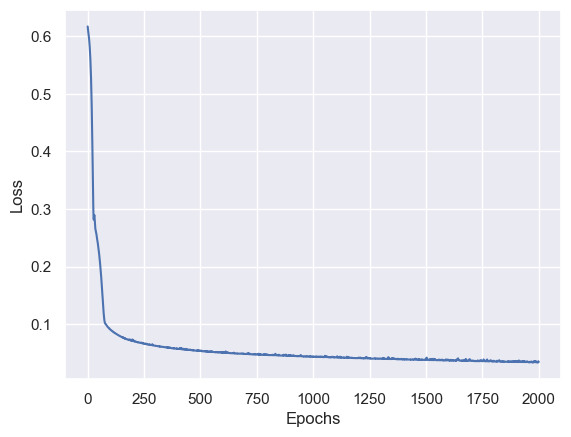

In [52]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

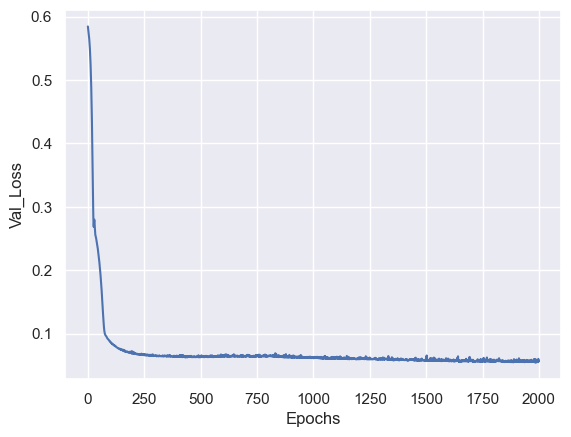

In [53]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyFEH.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [60]:
#modelFEH.save('modelosPosRio\\Lamost-LR\\model_FEH_Giants.h5')

In [54]:
predfeh = modelFEH.predict(X_test)

31/31 [==============================] - 0s 2ms/step


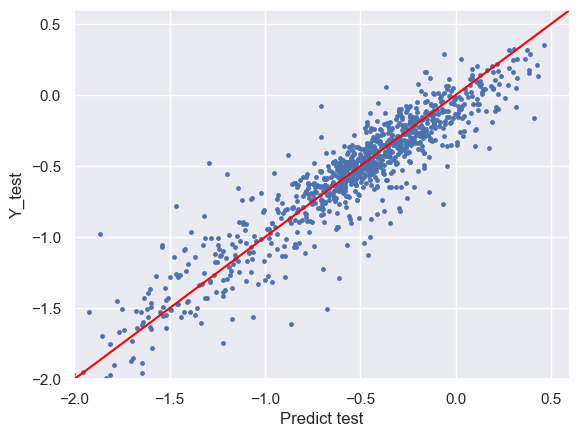

In [55]:
plt.scatter(Y_test[[columnTrain]], predfeh, s=6)
#plt.title('FE_H')
plt.xlim(-2, 0.6)
plt.ylim(-2, 0.6)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([-2, 1], [-2, 1], c='red')

In [56]:
score = r2_score(Y_test['feh'], predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 87.0%


In [57]:
Y_test['FEH_Predict'] = predfeh

In [58]:
Y_test

,teff,logg,feh,alpha_m,teffEncoded,TEFF_PredictDecoded,LOGG_Predict,FEH_Predict
#ID,,,,,,,,
iDR4_3_SPLUS-n05n54_0032667,4775.43,2.637,-0.599,0.371583,-0.384635,4780.494629,2.775506,-0.548705
iDR4_3_SPLUS-n04s41_0024465,5198.62,3.398,-0.936,-9999.000000,-0.043940,5268.135742,3.665362,-0.732958
iDR4_3_SPLUS-n01s25_0022170,4700.34,2.730,-0.393,0.435255,-0.445087,4726.425293,2.573372,-0.482741
iDR4_3_SPLUS-n02n26_0030095,5228.83,3.807,-0.548,0.401033,-0.019619,5296.531738,3.807103,-0.456832
iDR4_3_SPLUS-n01s20_0008860,4830.17,2.783,-0.642,0.532023,-0.340565,4877.441406,2.707033,-0.480930
...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0054_0031534,4901.52,3.078,-0.512,0.321260,-0.283124,4920.159180,3.319226,-0.453200
iDR4_3_STRIPE82-0068_0016798,5323.63,3.689,-0.449,0.033229,0.056701,5418.449219,3.837461,-0.348527
iDR4_3_STRIPE82-0117_0033168,4975.68,2.532,-0.415,-9999.000000,-0.223421,4810.883789,2.235592,-0.643771


In [59]:
Y_test.to_csv("E:\\IC\\PredictsTreinos\\LamostLow\\Giants-FeHPredict.csv")

### Alpha

In [8]:
GigCoresAlpha = GigCores.loc[GigCores['alpha_m'] != -9999]

In [9]:
GigCoresAlpha

,u-J378,u-J395,u-J410,u-J430,u-g,u-J515,u-r,u-J660,u-i,u-J861,...,J660-i,J660-J861,J660-z,i-J861,i-z,J861-z,teff,logg,feh,alpha_m
#ID,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s18_0006923,0.2597,0.4839,1.2111,1.3756,1.9039,2.1028,2.5930,2.6558,2.8079,2.8698,...,0.1521,0.2140,0.2549,0.0619,0.1028,0.0409,4993.46,3.536,-0.280,0.266319
iDR4_3_SPLUS-n01s18_0007925,0.2806,0.4171,1.1207,1.2569,1.6881,1.8756,2.2985,2.3408,2.4608,2.5144,...,0.1200,0.1736,0.2030,0.0536,0.0830,0.0294,5207.03,3.802,-0.206,0.223216
iDR4_3_SPLUS-n01s18_0008872,0.3879,0.5757,1.2588,1.4455,1.9955,2.2013,2.6943,2.7746,2.9420,3.0061,...,0.1674,0.2315,0.2780,0.0641,0.1106,0.0465,4869.52,2.414,-0.505,0.326098
iDR4_3_SPLUS-n01s18_0009631,0.3450,0.4971,1.1794,1.3268,1.8020,1.9936,2.4523,2.5196,2.6739,2.7318,...,0.1543,0.2122,0.2641,0.0579,0.1098,0.0519,4781.62,3.198,-0.489,0.266938
iDR4_3_SPLUS-n01s18_0013034,0.4643,0.4203,1.0345,1.1421,1.5738,1.7990,2.1683,2.2594,2.4170,2.4840,...,0.1576,0.2246,0.2580,0.0670,0.1004,0.0334,4949.62,2.518,-1.083,0.242469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0166_0023150,0.6556,0.5875,1.0417,1.2046,1.5304,1.7924,2.1219,2.2015,2.3625,2.4363,...,0.1610,0.2348,0.2507,0.0738,0.0897,0.0159,4510.24,0.816,-2.389,0.097196
iDR4_3_STRIPE82-0166_0042871,0.4183,0.4757,1.0628,1.1616,1.6204,1.8253,2.2302,2.2905,2.4395,2.5085,...,0.1490,0.2180,0.2476,0.0690,0.0986,0.0296,5131.76,3.592,-0.636,0.381460
iDR4_3_STRIPE82-0166_0044579,0.3635,0.4541,1.1230,1.2287,1.7062,1.8859,2.3139,2.3709,2.5148,2.5663,...,0.1439,0.1954,0.2329,0.0515,0.0890,0.0375,5184.47,3.725,-0.272,0.371680


In [10]:
xtrain = GigCoresAlpha.iloc[:, :66]

In [11]:
columnYtrain =  ['teff', 'logg', 'feh', 'alpha_m']

In [12]:
ytrain = GigCoresAlpha[columnYtrain]

In [13]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [17]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [18]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [19]:
Y_train

,teff,logg,feh,alpha_m
#ID,,,,
iDR4_3_STRIPE82-0065_0015495,5755.43,4.307,-0.083,0.101702
iDR4_3_SPLUS-n02n25_0008776,5113.81,2.581,-2.002,0.058410
iDR4_3_SPLUS-n03s28_0006688,4701.23,2.303,-0.409,0.327468
iDR4_3_STRIPE82-0163_0035434,5066.88,3.642,-0.514,0.389559
iDR4_3_SPLUS-n01s24_0024006,5152.79,3.424,-0.877,0.399463
...,...,...,...,...
iDR4_3_SPLUS-n03s25_0032059,4993.64,3.478,-0.593,0.237639
iDR4_3_SPLUS-s02s16_0033105,5123.47,3.844,-0.215,0.046193
iDR4_3_STRIPE82-0084_0016998,6347.00,4.162,-0.357,0.117690


In [20]:
modelAlpha = baseline_model_teste()

In [21]:
columnTrain = 'alpha_m'

In [22]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyAlpha = modelAlpha.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 2s - loss: 0.1405 - val_loss: 0.1455 - 2s/epoch - 2s/step
Epoch 2/2000
1/1 - 0s - loss: 0.1397 - val_loss: 0.1449 - 134ms/epoch - 134ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.1391 - val_loss: 0.1444 - 140ms/epoch - 140ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.1386 - val_loss: 0.1439 - 240ms/epoch - 240ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.1381 - val_loss: 0.1434 - 36ms/epoch - 36ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.1377 - val_loss: 0.1429 - 37ms/epoch - 37ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.1372 - val_loss: 0.1423 - 36ms/epoch - 36ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.1366 - val_loss: 0.1417 - 37ms/epoch - 37ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.1360 - val_loss: 0.1411 - 39ms/epoch - 39ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.1354 - val_loss: 0.1405 - 37ms/epoch - 37ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.1348 - val_loss: 0.1398 - 36ms/epoch - 36ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.1341 - val_loss: 0.1390 - 36ms/epoch - 36ms/step
Epoch 13/2000
1/1 - 0s 

Epoch 101/2000
1/1 - 0s - loss: 0.0605 - val_loss: 0.0619 - 45ms/epoch - 45ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.0603 - val_loss: 0.0618 - 94ms/epoch - 94ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.0602 - val_loss: 0.0616 - 41ms/epoch - 41ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.0600 - val_loss: 0.0615 - 40ms/epoch - 40ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.0599 - val_loss: 0.0613 - 43ms/epoch - 43ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.0597 - val_loss: 0.0611 - 46ms/epoch - 46ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.0596 - val_loss: 0.0610 - 41ms/epoch - 41ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.0594 - val_loss: 0.0608 - 43ms/epoch - 43ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.0593 - val_loss: 0.0606 - 46ms/epoch - 46ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.0591 - val_loss: 0.0605 - 44ms/epoch - 44ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.0590 - val_loss: 0.0603 - 42ms/epoch - 42ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.0589 - val_loss: 0.0601 - 43ms/epoch - 43ms/step
Epoc

Epoch 200/2000
1/1 - 0s - loss: 0.0491 - val_loss: 0.0508 - 45ms/epoch - 45ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.0491 - val_loss: 0.0507 - 49ms/epoch - 49ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.0490 - val_loss: 0.0506 - 45ms/epoch - 45ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.0489 - val_loss: 0.0505 - 48ms/epoch - 48ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.0488 - val_loss: 0.0504 - 45ms/epoch - 45ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.0487 - val_loss: 0.0503 - 51ms/epoch - 51ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.0486 - val_loss: 0.0503 - 46ms/epoch - 46ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.0485 - val_loss: 0.0502 - 47ms/epoch - 47ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.0484 - val_loss: 0.0501 - 47ms/epoch - 47ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.0483 - val_loss: 0.0500 - 47ms/epoch - 47ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.0483 - val_loss: 0.0499 - 49ms/epoch - 49ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.0482 - val_loss: 0.0499 - 58ms/epoch - 58ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0420 - val_loss: 0.0440 - 52ms/epoch - 52ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0419 - val_loss: 0.0439 - 48ms/epoch - 48ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0418 - val_loss: 0.0439 - 50ms/epoch - 50ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0418 - val_loss: 0.0438 - 45ms/epoch - 45ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0417 - val_loss: 0.0437 - 57ms/epoch - 57ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0417 - val_loss: 0.0437 - 56ms/epoch - 56ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0416 - val_loss: 0.0436 - 75ms/epoch - 75ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0415 - val_loss: 0.0436 - 53ms/epoch - 53ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0415 - val_loss: 0.0435 - 69ms/epoch - 69ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0414 - val_loss: 0.0435 - 50ms/epoch - 50ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0414 - val_loss: 0.0434 - 69ms/epoch - 69ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0413 - val_loss: 0.0433 - 65ms/epoch - 65ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0367 - val_loss: 0.0388 - 45ms/epoch - 45ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0367 - val_loss: 0.0388 - 51ms/epoch - 51ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0366 - val_loss: 0.0387 - 53ms/epoch - 53ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0366 - val_loss: 0.0387 - 51ms/epoch - 51ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0365 - val_loss: 0.0387 - 44ms/epoch - 44ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0365 - val_loss: 0.0386 - 48ms/epoch - 48ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0364 - val_loss: 0.0386 - 47ms/epoch - 47ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0364 - val_loss: 0.0385 - 46ms/epoch - 46ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0363 - val_loss: 0.0385 - 45ms/epoch - 45ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0363 - val_loss: 0.0384 - 51ms/epoch - 51ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0362 - val_loss: 0.0384 - 46ms/epoch - 46ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0362 - val_loss: 0.0383 - 47ms/epoch - 47ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0325 - val_loss: 0.0349 - 48ms/epoch - 48ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0325 - val_loss: 0.0347 - 47ms/epoch - 47ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0324 - val_loss: 0.0348 - 47ms/epoch - 47ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0324 - val_loss: 0.0346 - 51ms/epoch - 51ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0324 - val_loss: 0.0348 - 45ms/epoch - 45ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0323 - val_loss: 0.0346 - 48ms/epoch - 48ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0323 - val_loss: 0.0347 - 46ms/epoch - 46ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0323 - val_loss: 0.0345 - 51ms/epoch - 51ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0322 - val_loss: 0.0345 - 54ms/epoch - 54ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0322 - val_loss: 0.0345 - 54ms/epoch - 54ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0321 - val_loss: 0.0344 - 47ms/epoch - 47ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0321 - val_loss: 0.0345 - 50ms/epoch - 50ms/step
Epoc

Epoch 596/2000
1/1 - 0s - loss: 0.0292 - val_loss: 0.0317 - 49ms/epoch - 49ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0292 - val_loss: 0.0317 - 49ms/epoch - 49ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0291 - val_loss: 0.0317 - 46ms/epoch - 46ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0291 - val_loss: 0.0316 - 54ms/epoch - 54ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0291 - val_loss: 0.0317 - 50ms/epoch - 50ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0291 - val_loss: 0.0315 - 50ms/epoch - 50ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0290 - val_loss: 0.0317 - 44ms/epoch - 44ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0290 - val_loss: 0.0314 - 51ms/epoch - 51ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0290 - val_loss: 0.0317 - 49ms/epoch - 49ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0290 - val_loss: 0.0314 - 48ms/epoch - 48ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0289 - val_loss: 0.0316 - 44ms/epoch - 44ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0289 - val_loss: 0.0314 - 51ms/epoch - 51ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0266 - val_loss: 0.0293 - 55ms/epoch - 55ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0266 - val_loss: 0.0295 - 49ms/epoch - 49ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0266 - val_loss: 0.0292 - 47ms/epoch - 47ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0265 - val_loss: 0.0295 - 47ms/epoch - 47ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0265 - val_loss: 0.0292 - 46ms/epoch - 46ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0265 - val_loss: 0.0294 - 47ms/epoch - 47ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0265 - val_loss: 0.0291 - 46ms/epoch - 46ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0265 - val_loss: 0.0294 - 48ms/epoch - 48ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0291 - 46ms/epoch - 46ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0293 - 53ms/epoch - 53ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0291 - 50ms/epoch - 50ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0263 - val_loss: 0.0291 - 47ms/epoch - 47ms/step
Epoc

Epoch 794/2000
1/1 - 0s - loss: 0.0246 - val_loss: 0.0275 - 45ms/epoch - 45ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0245 - val_loss: 0.0276 - 49ms/epoch - 49ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0245 - val_loss: 0.0276 - 48ms/epoch - 48ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0245 - val_loss: 0.0274 - 45ms/epoch - 45ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0245 - val_loss: 0.0278 - 49ms/epoch - 49ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0245 - val_loss: 0.0274 - 46ms/epoch - 46ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0245 - val_loss: 0.0277 - 45ms/epoch - 45ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0244 - val_loss: 0.0274 - 49ms/epoch - 49ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0244 - val_loss: 0.0275 - 46ms/epoch - 46ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0244 - val_loss: 0.0275 - 47ms/epoch - 47ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0243 - val_loss: 0.0274 - 50ms/epoch - 50ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0243 - val_loss: 0.0275 - 58ms/epoch - 58ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0229 - val_loss: 0.0262 - 44ms/epoch - 44ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0229 - val_loss: 0.0264 - 47ms/epoch - 47ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0229 - val_loss: 0.0261 - 45ms/epoch - 45ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0229 - val_loss: 0.0265 - 49ms/epoch - 49ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0229 - val_loss: 0.0261 - 47ms/epoch - 47ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0229 - val_loss: 0.0265 - 50ms/epoch - 50ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0229 - val_loss: 0.0261 - 47ms/epoch - 47ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0229 - val_loss: 0.0265 - 49ms/epoch - 49ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0229 - val_loss: 0.0260 - 46ms/epoch - 46ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0228 - val_loss: 0.0264 - 53ms/epoch - 53ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0228 - val_loss: 0.0260 - 44ms/epoch - 44ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0228 - val_loss: 0.0262 - 49ms/epoch - 49ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0216 - val_loss: 0.0253 - 48ms/epoch - 48ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0215 - val_loss: 0.0253 - 44ms/epoch - 44ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0215 - val_loss: 0.0254 - 51ms/epoch - 51ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0215 - val_loss: 0.0253 - 56ms/epoch - 56ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0215 - val_loss: 0.0254 - 47ms/epoch - 47ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0215 - val_loss: 0.0252 - 48ms/epoch - 48ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0215 - val_loss: 0.0255 - 48ms/epoch - 48ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0215 - val_loss: 0.0252 - 53ms/epoch - 53ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0215 - val_loss: 0.0257 - 52ms/epoch - 52ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0216 - val_loss: 0.0252 - 48ms/epoch - 48ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0216 - val_loss: 0.0259 - 56ms/epoch - 56ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0217 - val_loss: 0.0252 - 55ms/epoch - 55ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0246 - 50ms/epoch - 50ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0248 - 54ms/epoch - 54ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0247 - 47ms/epoch - 47ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0247 - 48ms/epoch - 48ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0248 - 52ms/epoch - 52ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0247 - 45ms/epoch - 45ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0204 - val_loss: 0.0248 - 47ms/epoch - 47ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0204 - val_loss: 0.0246 - 47ms/epoch - 47ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0204 - val_loss: 0.0249 - 53ms/epoch - 53ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0204 - val_loss: 0.0246 - 57ms/epoch - 57ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0249 - 53ms/epoch - 53ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0245 - 53ms/epoch - 53

Epoch 1188/2000
1/1 - 0s - loss: 0.0197 - val_loss: 0.0246 - 46ms/epoch - 46ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0197 - val_loss: 0.0241 - 56ms/epoch - 56ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0197 - val_loss: 0.0245 - 46ms/epoch - 46ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0197 - val_loss: 0.0241 - 100ms/epoch - 100ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0196 - val_loss: 0.0243 - 50ms/epoch - 50ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0196 - val_loss: 0.0242 - 74ms/epoch - 74ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0196 - val_loss: 0.0242 - 46ms/epoch - 46ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0196 - val_loss: 0.0243 - 50ms/epoch - 50ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0196 - val_loss: 0.0241 - 51ms/epoch - 51ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0196 - val_loss: 0.0244 - 50ms/epoch - 50ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0196 - val_loss: 0.0241 - 52ms/epoch - 52ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0196 - val_loss: 0.0245 - 56ms/epoch - 

Epoch 1286/2000
1/1 - 0s - loss: 0.0189 - val_loss: 0.0238 - 50ms/epoch - 50ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0189 - val_loss: 0.0240 - 47ms/epoch - 47ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0189 - val_loss: 0.0238 - 47ms/epoch - 47ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0189 - val_loss: 0.0239 - 48ms/epoch - 48ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0189 - val_loss: 0.0239 - 47ms/epoch - 47ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0189 - val_loss: 0.0238 - 50ms/epoch - 50ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0189 - val_loss: 0.0240 - 45ms/epoch - 45ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0189 - val_loss: 0.0238 - 48ms/epoch - 48ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0189 - val_loss: 0.0239 - 52ms/epoch - 52ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0189 - val_loss: 0.0238 - 46ms/epoch - 46ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0189 - val_loss: 0.0239 - 55ms/epoch - 55ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0188 - val_loss: 0.0239 - 47ms/epoch - 47

Epoch 1384/2000
1/1 - 0s - loss: 0.0184 - val_loss: 0.0240 - 48ms/epoch - 48ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0184 - val_loss: 0.0235 - 55ms/epoch - 55ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0185 - val_loss: 0.0241 - 48ms/epoch - 48ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0185 - val_loss: 0.0235 - 55ms/epoch - 55ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0185 - val_loss: 0.0241 - 45ms/epoch - 45ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0185 - val_loss: 0.0235 - 45ms/epoch - 45ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0184 - val_loss: 0.0240 - 45ms/epoch - 45ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0184 - val_loss: 0.0235 - 54ms/epoch - 54ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0184 - val_loss: 0.0238 - 51ms/epoch - 51ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0183 - val_loss: 0.0235 - 62ms/epoch - 62ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0183 - val_loss: 0.0236 - 47ms/epoch - 47ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0183 - val_loss: 0.0237 - 69ms/epoch - 69

Epoch 1482/2000
1/1 - 0s - loss: 0.0179 - val_loss: 0.0234 - 48ms/epoch - 48ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0234 - 45ms/epoch - 45ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0235 - 44ms/epoch - 44ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0233 - 47ms/epoch - 47ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0236 - 52ms/epoch - 52ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0233 - 46ms/epoch - 46ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0236 - 45ms/epoch - 45ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0234 - 49ms/epoch - 49ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0235 - 51ms/epoch - 51ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0235 - 48ms/epoch - 48ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0234 - 46ms/epoch - 46ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0235 - 51ms/epoch - 51

Epoch 1580/2000
1/1 - 0s - loss: 0.0174 - val_loss: 0.0233 - 47ms/epoch - 47ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0174 - val_loss: 0.0233 - 51ms/epoch - 51ms/step
Epoch 1582/2000
1/1 - 0s - loss: 0.0174 - val_loss: 0.0234 - 45ms/epoch - 45ms/step
Epoch 1583/2000
1/1 - 0s - loss: 0.0174 - val_loss: 0.0232 - 49ms/epoch - 49ms/step
Epoch 1584/2000
1/1 - 0s - loss: 0.0174 - val_loss: 0.0236 - 54ms/epoch - 54ms/step
Epoch 1585/2000
1/1 - 0s - loss: 0.0174 - val_loss: 0.0232 - 48ms/epoch - 48ms/step
Epoch 1586/2000
1/1 - 0s - loss: 0.0175 - val_loss: 0.0237 - 47ms/epoch - 47ms/step
Epoch 1587/2000
1/1 - 0s - loss: 0.0175 - val_loss: 0.0232 - 52ms/epoch - 52ms/step
Epoch 1588/2000
1/1 - 0s - loss: 0.0176 - val_loss: 0.0240 - 65ms/epoch - 65ms/step
Epoch 1589/2000
1/1 - 0s - loss: 0.0176 - val_loss: 0.0232 - 48ms/epoch - 48ms/step
Epoch 1590/2000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0242 - 50ms/epoch - 50ms/step
Epoch 1591/2000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0232 - 47ms/epoch - 47

Epoch 1678/2000
1/1 - 0s - loss: 0.0171 - val_loss: 0.0235 - 48ms/epoch - 48ms/step
Epoch 1679/2000
1/1 - 0s - loss: 0.0171 - val_loss: 0.0231 - 48ms/epoch - 48ms/step
Epoch 1680/2000
1/1 - 0s - loss: 0.0171 - val_loss: 0.0234 - 59ms/epoch - 59ms/step
Epoch 1681/2000
1/1 - 0s - loss: 0.0171 - val_loss: 0.0232 - 47ms/epoch - 47ms/step
Epoch 1682/2000
1/1 - 0s - loss: 0.0170 - val_loss: 0.0233 - 49ms/epoch - 49ms/step
Epoch 1683/2000
1/1 - 0s - loss: 0.0170 - val_loss: 0.0233 - 58ms/epoch - 58ms/step
Epoch 1684/2000
1/1 - 0s - loss: 0.0170 - val_loss: 0.0232 - 49ms/epoch - 49ms/step
Epoch 1685/2000
1/1 - 0s - loss: 0.0170 - val_loss: 0.0234 - 48ms/epoch - 48ms/step
Epoch 1686/2000
1/1 - 0s - loss: 0.0170 - val_loss: 0.0232 - 53ms/epoch - 53ms/step
Epoch 1687/2000
1/1 - 0s - loss: 0.0170 - val_loss: 0.0234 - 51ms/epoch - 51ms/step
Epoch 1688/2000
1/1 - 0s - loss: 0.0170 - val_loss: 0.0232 - 46ms/epoch - 46ms/step
Epoch 1689/2000
1/1 - 0s - loss: 0.0170 - val_loss: 0.0234 - 53ms/epoch - 53

Epoch 1776/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0231 - 44ms/epoch - 44ms/step
Epoch 1777/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0236 - 52ms/epoch - 52ms/step
Epoch 1778/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0230 - 49ms/epoch - 49ms/step
Epoch 1779/2000
1/1 - 0s - loss: 0.0169 - val_loss: 0.0238 - 53ms/epoch - 53ms/step
Epoch 1780/2000
1/1 - 0s - loss: 0.0169 - val_loss: 0.0230 - 50ms/epoch - 50ms/step
Epoch 1781/2000
1/1 - 0s - loss: 0.0169 - val_loss: 0.0237 - 48ms/epoch - 48ms/step
Epoch 1782/2000
1/1 - 0s - loss: 0.0169 - val_loss: 0.0231 - 56ms/epoch - 56ms/step
Epoch 1783/2000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0234 - 50ms/epoch - 50ms/step
Epoch 1784/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0232 - 47ms/epoch - 47ms/step
Epoch 1785/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0232 - 45ms/epoch - 45ms/step
Epoch 1786/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0234 - 49ms/epoch - 49ms/step
Epoch 1787/2000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0231 - 45ms/epoch - 45

Epoch 1874/2000
1/1 - 0s - loss: 0.0165 - val_loss: 0.0231 - 46ms/epoch - 46ms/step
Epoch 1875/2000
1/1 - 0s - loss: 0.0165 - val_loss: 0.0233 - 50ms/epoch - 50ms/step
Epoch 1876/2000
1/1 - 0s - loss: 0.0165 - val_loss: 0.0232 - 43ms/epoch - 43ms/step
Epoch 1877/2000
1/1 - 0s - loss: 0.0164 - val_loss: 0.0233 - 49ms/epoch - 49ms/step
Epoch 1878/2000
1/1 - 0s - loss: 0.0164 - val_loss: 0.0232 - 49ms/epoch - 49ms/step
Epoch 1879/2000
1/1 - 0s - loss: 0.0164 - val_loss: 0.0232 - 47ms/epoch - 47ms/step
Epoch 1880/2000
1/1 - 0s - loss: 0.0164 - val_loss: 0.0233 - 47ms/epoch - 47ms/step
Epoch 1881/2000
1/1 - 0s - loss: 0.0164 - val_loss: 0.0232 - 51ms/epoch - 51ms/step
Epoch 1882/2000
1/1 - 0s - loss: 0.0164 - val_loss: 0.0233 - 49ms/epoch - 49ms/step
Epoch 1883/2000
1/1 - 0s - loss: 0.0164 - val_loss: 0.0232 - 50ms/epoch - 50ms/step
Epoch 1884/2000
1/1 - 0s - loss: 0.0164 - val_loss: 0.0233 - 49ms/epoch - 49ms/step
Epoch 1885/2000
1/1 - 0s - loss: 0.0164 - val_loss: 0.0231 - 51ms/epoch - 51

Epoch 1972/2000
1/1 - 0s - loss: 0.0162 - val_loss: 0.0235 - 41ms/epoch - 41ms/step
Epoch 1973/2000
1/1 - 0s - loss: 0.0163 - val_loss: 0.0231 - 41ms/epoch - 41ms/step
Epoch 1974/2000
1/1 - 0s - loss: 0.0163 - val_loss: 0.0236 - 40ms/epoch - 40ms/step
Epoch 1975/2000
1/1 - 0s - loss: 0.0163 - val_loss: 0.0231 - 45ms/epoch - 45ms/step
Epoch 1976/2000
1/1 - 0s - loss: 0.0163 - val_loss: 0.0235 - 43ms/epoch - 43ms/step
Epoch 1977/2000
1/1 - 0s - loss: 0.0163 - val_loss: 0.0231 - 39ms/epoch - 39ms/step
Epoch 1978/2000
1/1 - 0s - loss: 0.0162 - val_loss: 0.0234 - 44ms/epoch - 44ms/step
Epoch 1979/2000
1/1 - 0s - loss: 0.0162 - val_loss: 0.0231 - 44ms/epoch - 44ms/step
Epoch 1980/2000
1/1 - 0s - loss: 0.0162 - val_loss: 0.0233 - 38ms/epoch - 38ms/step
Epoch 1981/2000
1/1 - 0s - loss: 0.0162 - val_loss: 0.0232 - 41ms/epoch - 41ms/step
Epoch 1982/2000
1/1 - 0s - loss: 0.0162 - val_loss: 0.0233 - 39ms/epoch - 39ms/step
Epoch 1983/2000
1/1 - 0s - loss: 0.0162 - val_loss: 0.0232 - 43ms/epoch - 43

Text(0, 0.5, 'Loss')

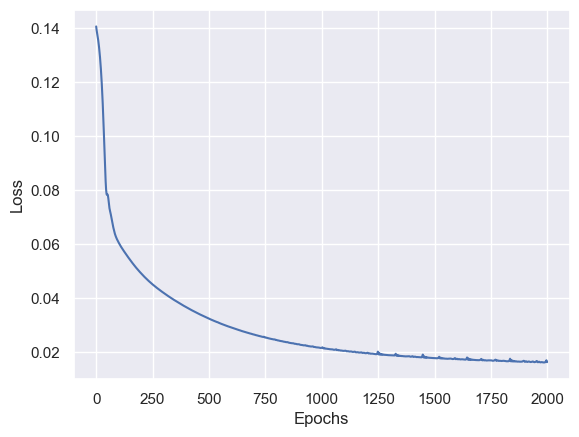

In [23]:
# plota as loss para ver se está treinando
plt.plot(historyAlpha.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

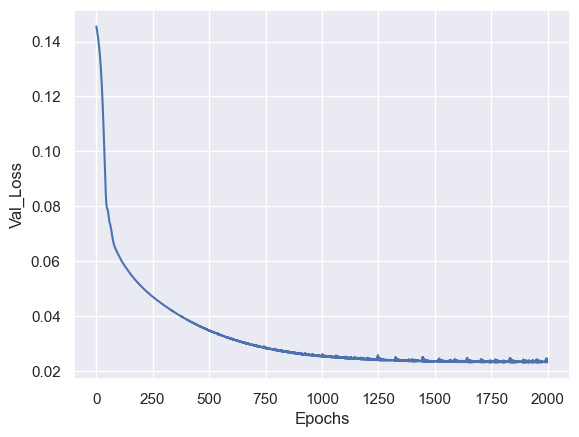

In [24]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyAlpha.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [25]:
#modelAlpha.save('modelosPosRio\\Lamost-LR\\model_alpha.h5')

In [26]:
predalpha = modelAlpha.predict(X_test)

23/23 [==============================] - 0s 4ms/step


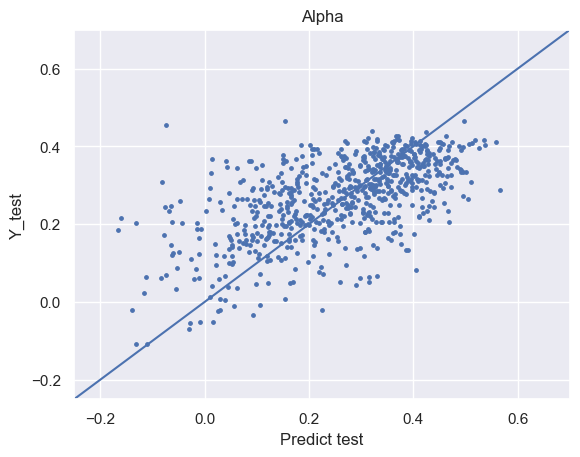

In [30]:
plt.scatter(Y_test[[columnTrain]], predalpha, s=6)
plt.title('Alpha')
plt.xlim(-0.25, 0.7)
plt.ylim(-0.25, 0.7)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [31]:
score = r2_score(Y_test['alpha_m'], predalpha)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 35.0%


In [32]:
Y_test['alpha_predict'] = predalpha

In [33]:
Y_test

,teff,logg,feh,alpha_m,alpha_predict
#ID,,,,,
iDR4_3_STRIPE82-0113_0020262,4871.23,3.010,-0.476,0.387565,0.400436
iDR4_3_STRIPE82-0152_0017203,5086.10,3.656,-0.410,0.370284,0.218760
iDR4_3_STRIPE82-0162_0035788,4976.11,3.494,-0.245,0.113318,0.247573
iDR4_3_SPLUS-n05n53_0023526,5002.03,3.709,-0.338,0.238502,0.343961
iDR4_3_STRIPE82-0126_0006205,4923.87,3.290,-0.218,0.342806,0.390675
...,...,...,...,...,...
iDR4_3_SPLUS-n04s43_0019788,5122.31,3.606,-0.476,0.327412,0.300725
iDR4_3_STRIPE82-0126_0022198,5220.96,3.308,-0.982,0.237321,0.204581
iDR4_3_STRIPE82-0054_0007871,4759.76,3.029,-0.128,0.208312,0.116985


In [34]:
Y_test.to_csv("E:\\IC\\PredictsTreinos\\LamostLow\\Giants-AlphaPredict.csv")